In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os,re
%load_ext rpy2.ipython

In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [3]:
adata1=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [4]:
def Multi_create_sub2(adata,cell_type_list, res=1,name='combined_leiden', col='leiden'):
    subgroup = adata[adata.obs[col].isin(cell_type_list)].copy()
    subgroup.raw = subgroup
    sc.pp.highly_variable_genes(subgroup)
    subgroup = subgroup[:, subgroup.var['highly_variable']]
    sc.pp.scale(subgroup, max_value=10)
    sc.tl.pca(subgroup, svd_solver='arpack')
    sc.pp.neighbors(subgroup)
    sc.tl.leiden(subgroup, resolution=res, key_added=name)
    sc.tl.umap(subgroup)
    sc.pl.umap(subgroup, color=name)
    return subgroup



In [5]:
PBMCadata=adata1[adata1.obs['AdjustedID'].str.contains('B')]
PBMCadata.uns['log1p']['base']=None
adata1.uns['log1p']['base']=None

In [6]:
%%R
colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")

In [7]:

PBMCadata_lymcell=PBMCadata[~PBMCadata.obs['Last_cell_type'].isin(['Early_MK','Early_ERY','Mid_ERY','Late_ERY','Late_ERY','Others','Endothelial cells'])]

PBMCadata_lymcell

View of AnnData object with n_obs × n_vars = 136643 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
PBMCadata_lymcellobs=PBMCadata_lymcell.obs

In [9]:
%%R -i PBMCadata_lymcellobs
calculate_percentage <- function(input_data, cluster_name, cell_type_col) {
  Data1 <- table(input_data$AdjustedID) %>% as.data.frame()
  colnames(Data1) <- c('AdjustedID', 'SumCell')

  Data2 <- table(input_data$AdjustedID, input_data[[cell_type_col]]) %>% as.data.frame() %>% filter(Var2 == cluster_name)
  colnames(Data2) <- c('AdjustedID', 'Cluster', 'Clusternum')

  TData3 <- merge(Data1, Data2, by = 'AdjustedID')
  TData3$percentage <- TData3$Clusternum / TData3$SumCell * 100
  TData3$Group <- as.numeric((factor(TData3$AdjustedID)))
  TData3$Week <- substring(TData3$AdjustedID, 2, 3)
  TData3$Group <- as.numeric((factor(TData3$Week)))

  return(TData3)
}

library(dplyr)

CD4adata2 <- PBMCadata_lymcellobs %>%
  mutate(Last_cell_type3 = ifelse(Last_cell_type %in% c('Cycling Treg','DN(Q) T','Th17like_INNATE_T','Naïve CD4 T','Treg'),
                                   'Functional CD4',
                                   'Others lym'))
# Example usage
resultFunctional_CD4 <- calculate_percentage(CD4adata2, 'Functional CD4', 'Last_cell_type3')
print(resultFunctional_CD4)


R[write to console]: 
载入程辑包：‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




   AdjustedID SumCell        Cluster Clusternum percentage Group Week
1   B11.6_P24    7561 Functional CD4        732   9.681259     1   11
2    B12.0_P2      27 Functional CD4          0   0.000000     2   12
3    B17.4_P3     345 Functional CD4        137  39.710145     3   17
4    B18.0_P4    8869 Functional CD4       3563  40.173639     4   18
5    B18.6_P5    8071 Functional CD4       1679  20.802874     4   18
6    B20.9_P7    4219 Functional CD4       1671  39.606542     5   20
7    B21.7_P8    5486 Functional CD4        254   4.629967     6   21
8   B22.4_P23    7373 Functional CD4       3613  49.003119     7   22
9    B22.4_P9    4951 Functional CD4       2891  58.392244     7   22
10  B23.4_P10    8555 Functional CD4       4053  47.375804     8   23
11  B24.6_P11    3703 Functional CD4        214   5.779098     9   24
12  B26.9_P12    5897 Functional CD4       2948  49.991521    10   26
13  B29.1_P13    3906 Functional CD4        738  18.894009    11   29
14  B30.4_P14    841

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
`geom_smooth()` using formula = 'y ~ x'


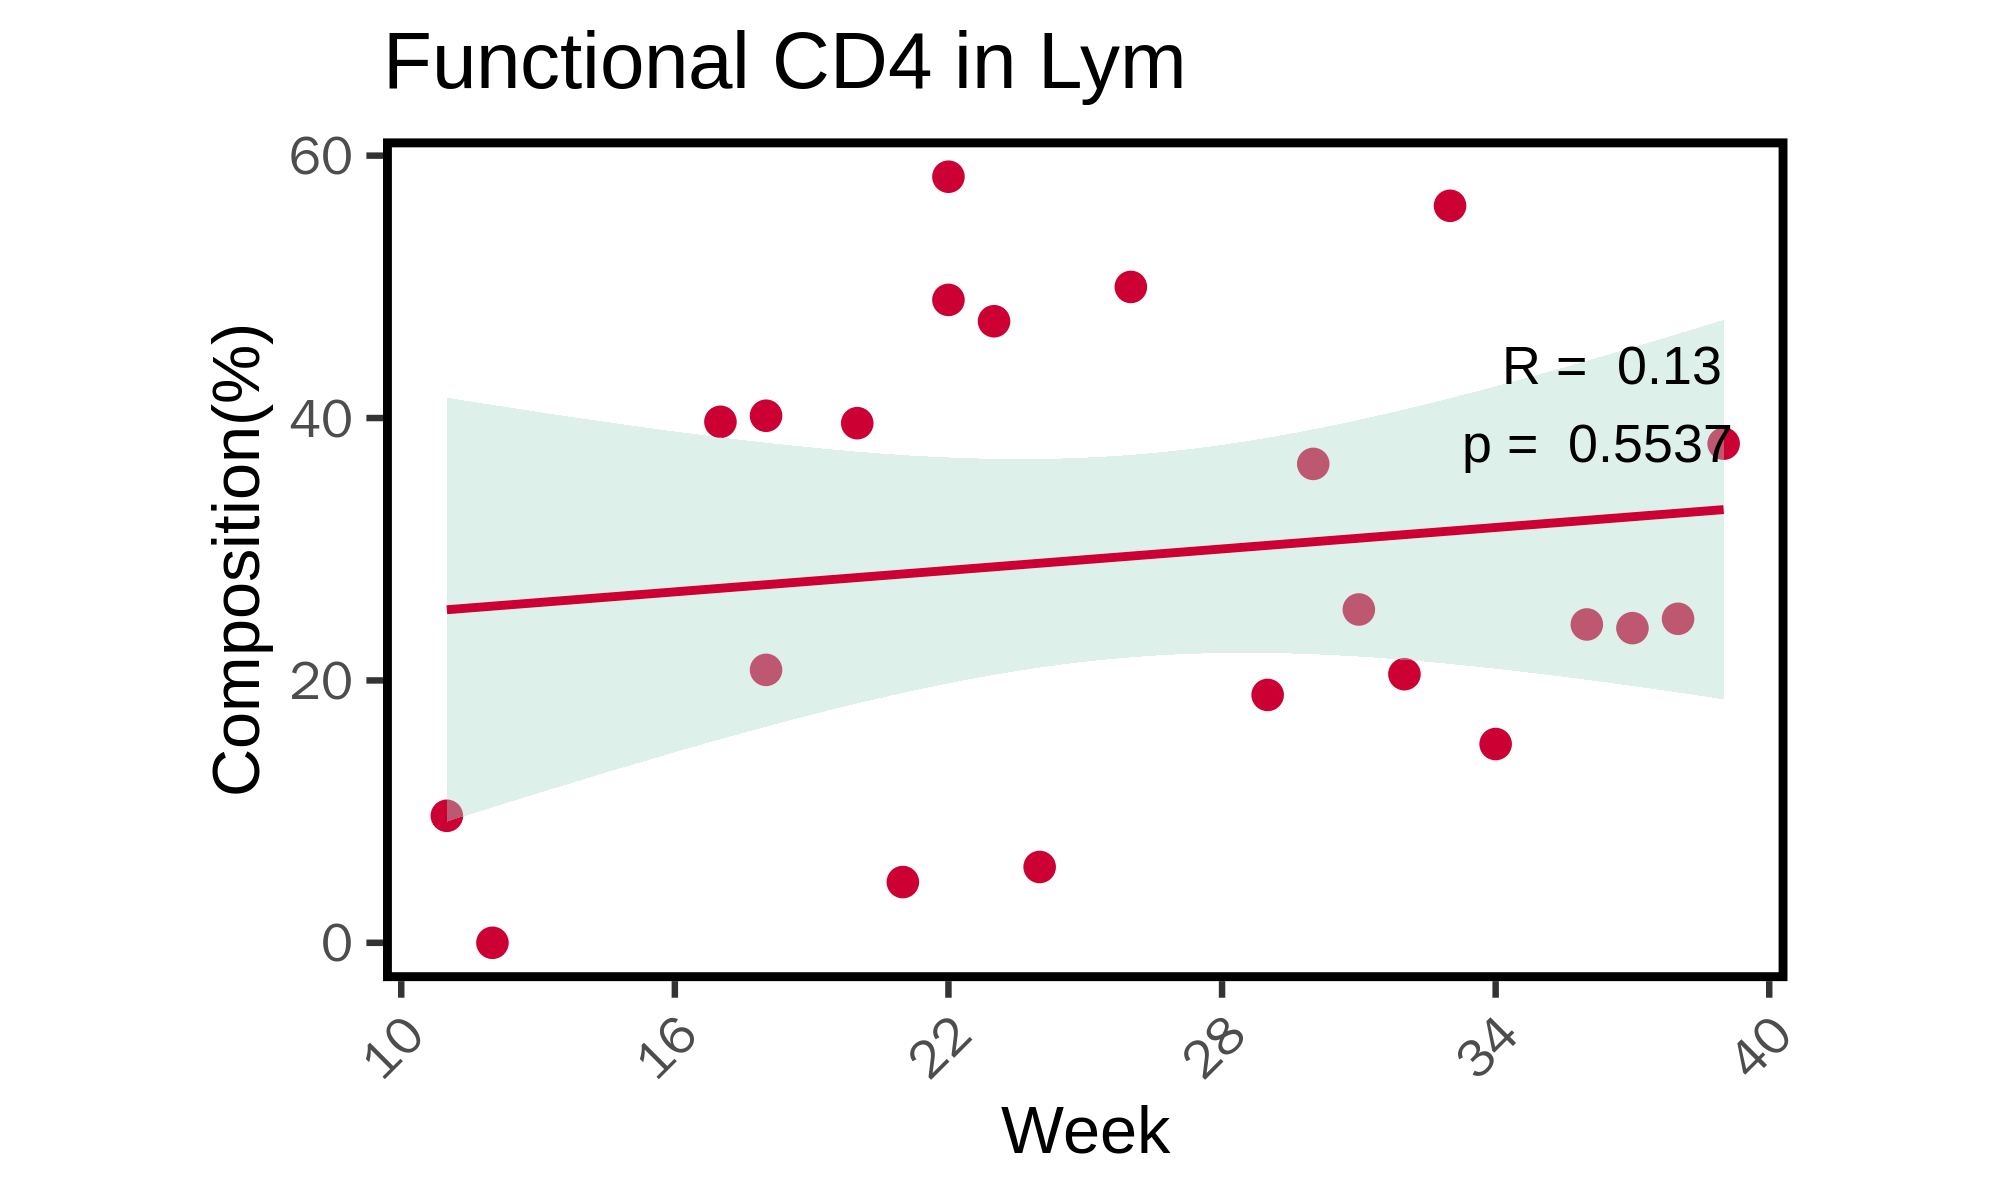

In [10]:
%%R -w 2000 -h 1200 -r 300
library(tidyverse)
plot_percentage <- function(input_data,title='Th17like in CD4') {
  cor_results_T <- input_data %>%
    summarise(cor_test = list(broom::tidy(cor.test(as.numeric(Week), percentage), method = "spearman"))) %>%
    unnest(cor_test)
  week_mapping_T <- input_data %>%
    select(Group, Week) %>%
    unique() %>%
    arrange(Group)
  plot <- ggplot(input_data, aes(x = as.numeric(Week), y = percentage)) +
    geom_point(aes(color=Cluster),size = 3) +
    geom_smooth(aes(x = as.numeric(Week), y = percentage,color=Cluster), method = 'lm', se = TRUE, show.legend = FALSE,
                fill = '#aaddcc',  linetype = "solid") +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
           panel.border = element_rect(linetype = 1, colour = "black", size = 2),
          strip.background = element_blank(), legend.position = "none", aspect.ratio = 0.6) +
    xlab("Week") + ggtitle(title) +
    ylab("Composition(%)") +
    scale_x_continuous(breaks = seq(10,40,6),
                       labels =  seq(10,40,6)) +
    geom_text(data = cor_results_T, aes(label = paste("\n", "\n", "R = ", 
                                                      round(estimate, 2), "\np = ", round(p.value, 4)), 
                                     x = Inf, y = Inf,
                                    size = 6), hjust = 1.2, vjust = 1.2,hjust = "right")+
    scale_color_manual(values=sample(colorname2, 1) ) 
  return(plot)
}

# Example usage
# result_T <- calculate_percentage('Treg')
plot_FunctionalCD4T <- plot_percentage(resultFunctional_CD4 ,'Functional CD4 in Lym')
print(plot_FunctionalCD4T)

In [11]:
%%R
head(resultFunctional_CD4)
table(resultFunctional_CD4$Cluster)


Functional CD4     Others lym 
            22              0 


`geom_smooth()` using formula = 'y ~ x'


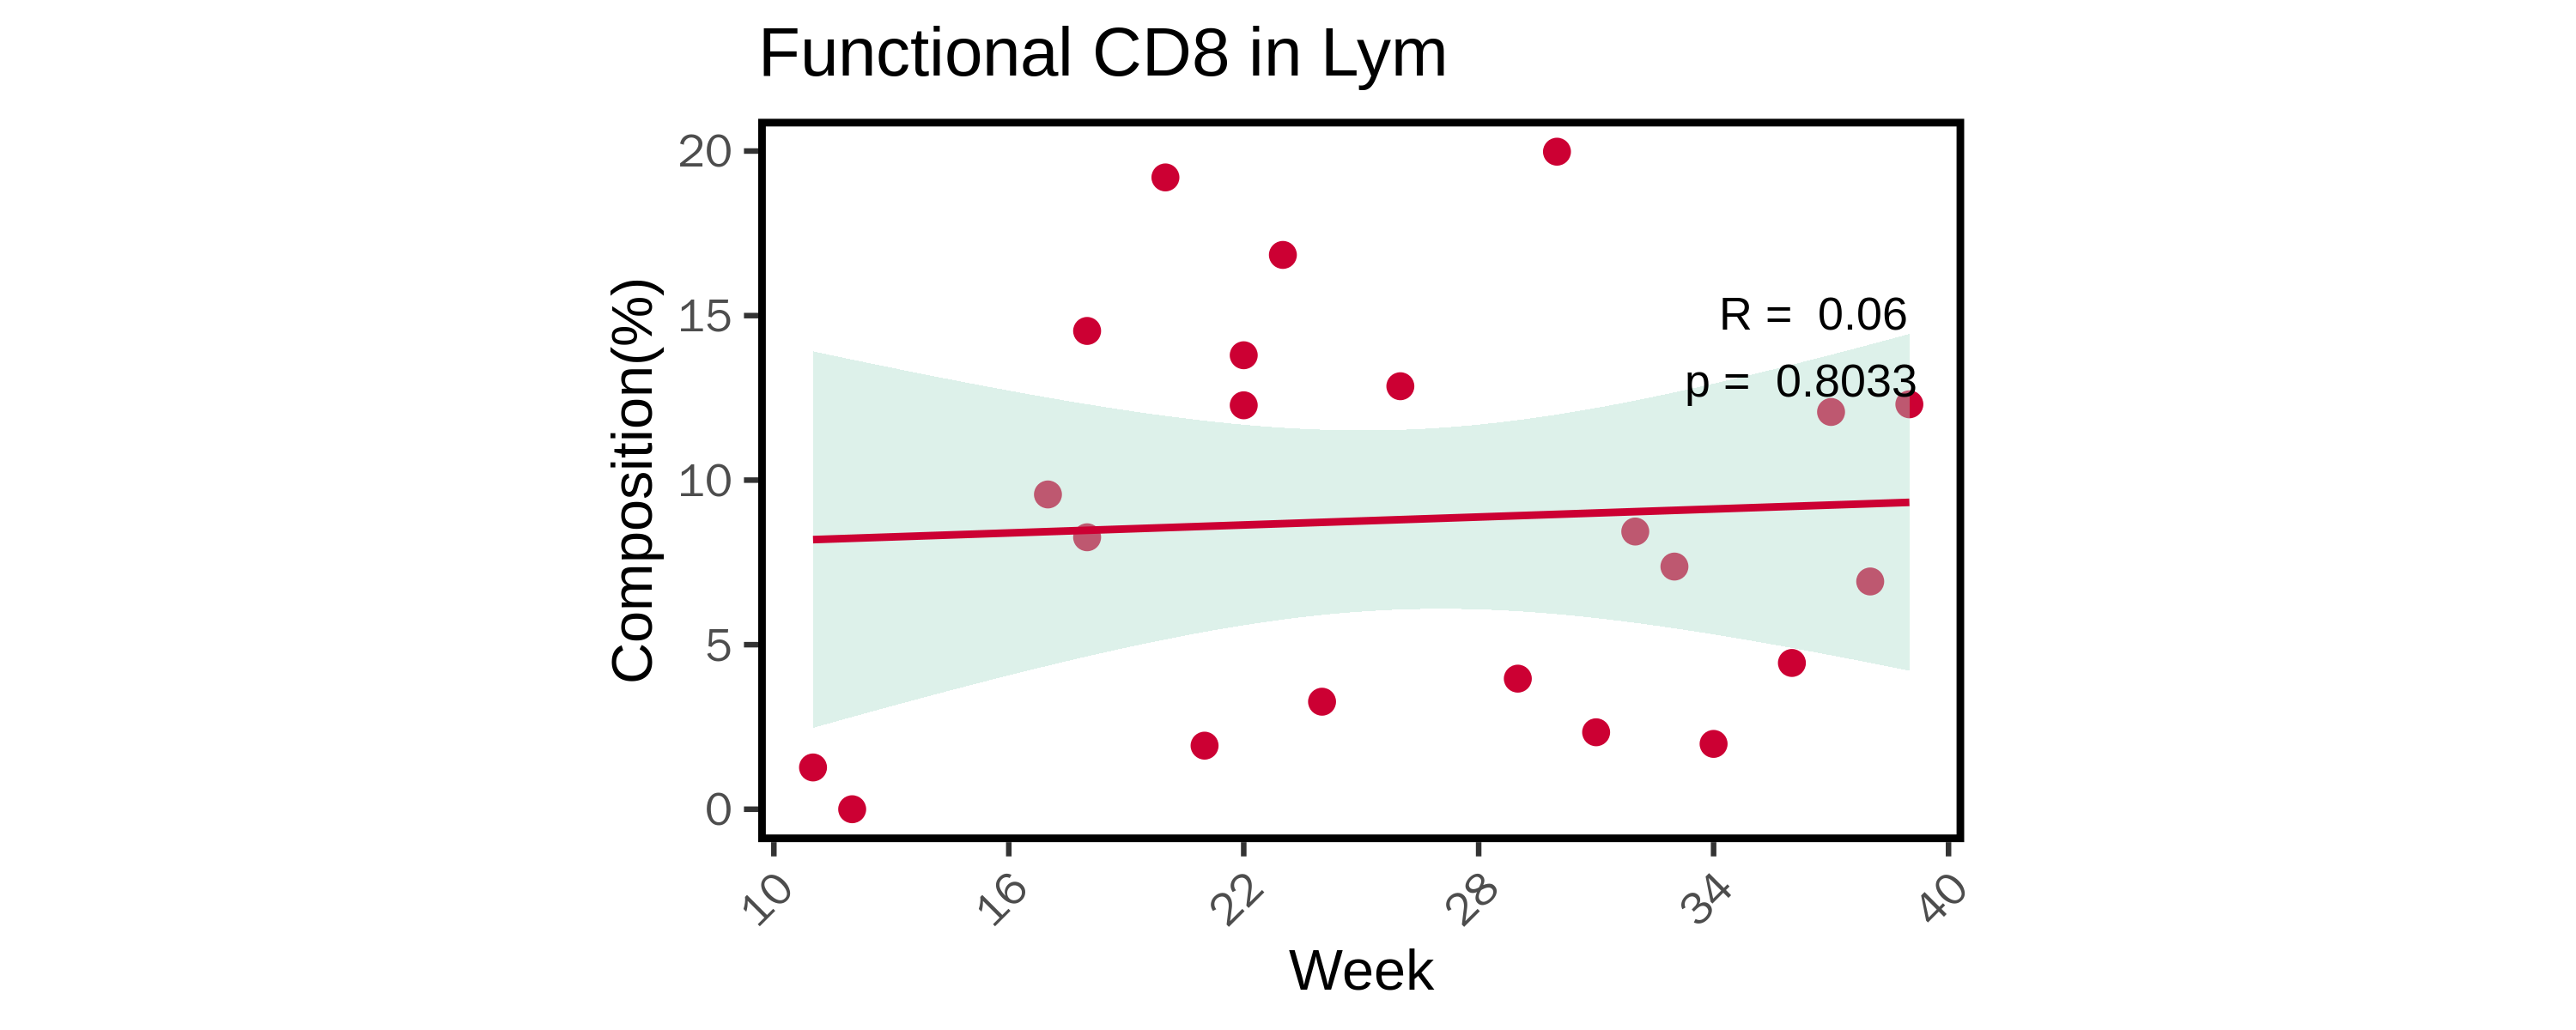

In [12]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcellobs
library(dplyr)

CD8obs2 <- PBMCadata_lymcellobs %>%
  mutate(CD8type = ifelse(Last_cell_type %in% c('Naïve CD8 T','NKT'),
                                   'Functional CD8',
                                   'Others lym'))
resultFunctional_CD8 <- calculate_percentage(CD8obs2 , 'Functional CD8', 'CD8type')
plot_TCD8 <- plot_percentage(resultFunctional_CD8 ,'Functional CD8 in Lym')
print(plot_TCD8 )

In [13]:
%%R -w 3000 -h 1200 -r 300  -i PBMCadata_lymcellobs
Tper <- PBMCadata_lymcellobs %>%
  mutate(Last_cell_type3 = ifelse(grepl('T',Last_cell_type),
                                   'Tcell',
                                   'Others lym'))
# Tper  %>% head()

`geom_smooth()` using formula = 'y ~ x'


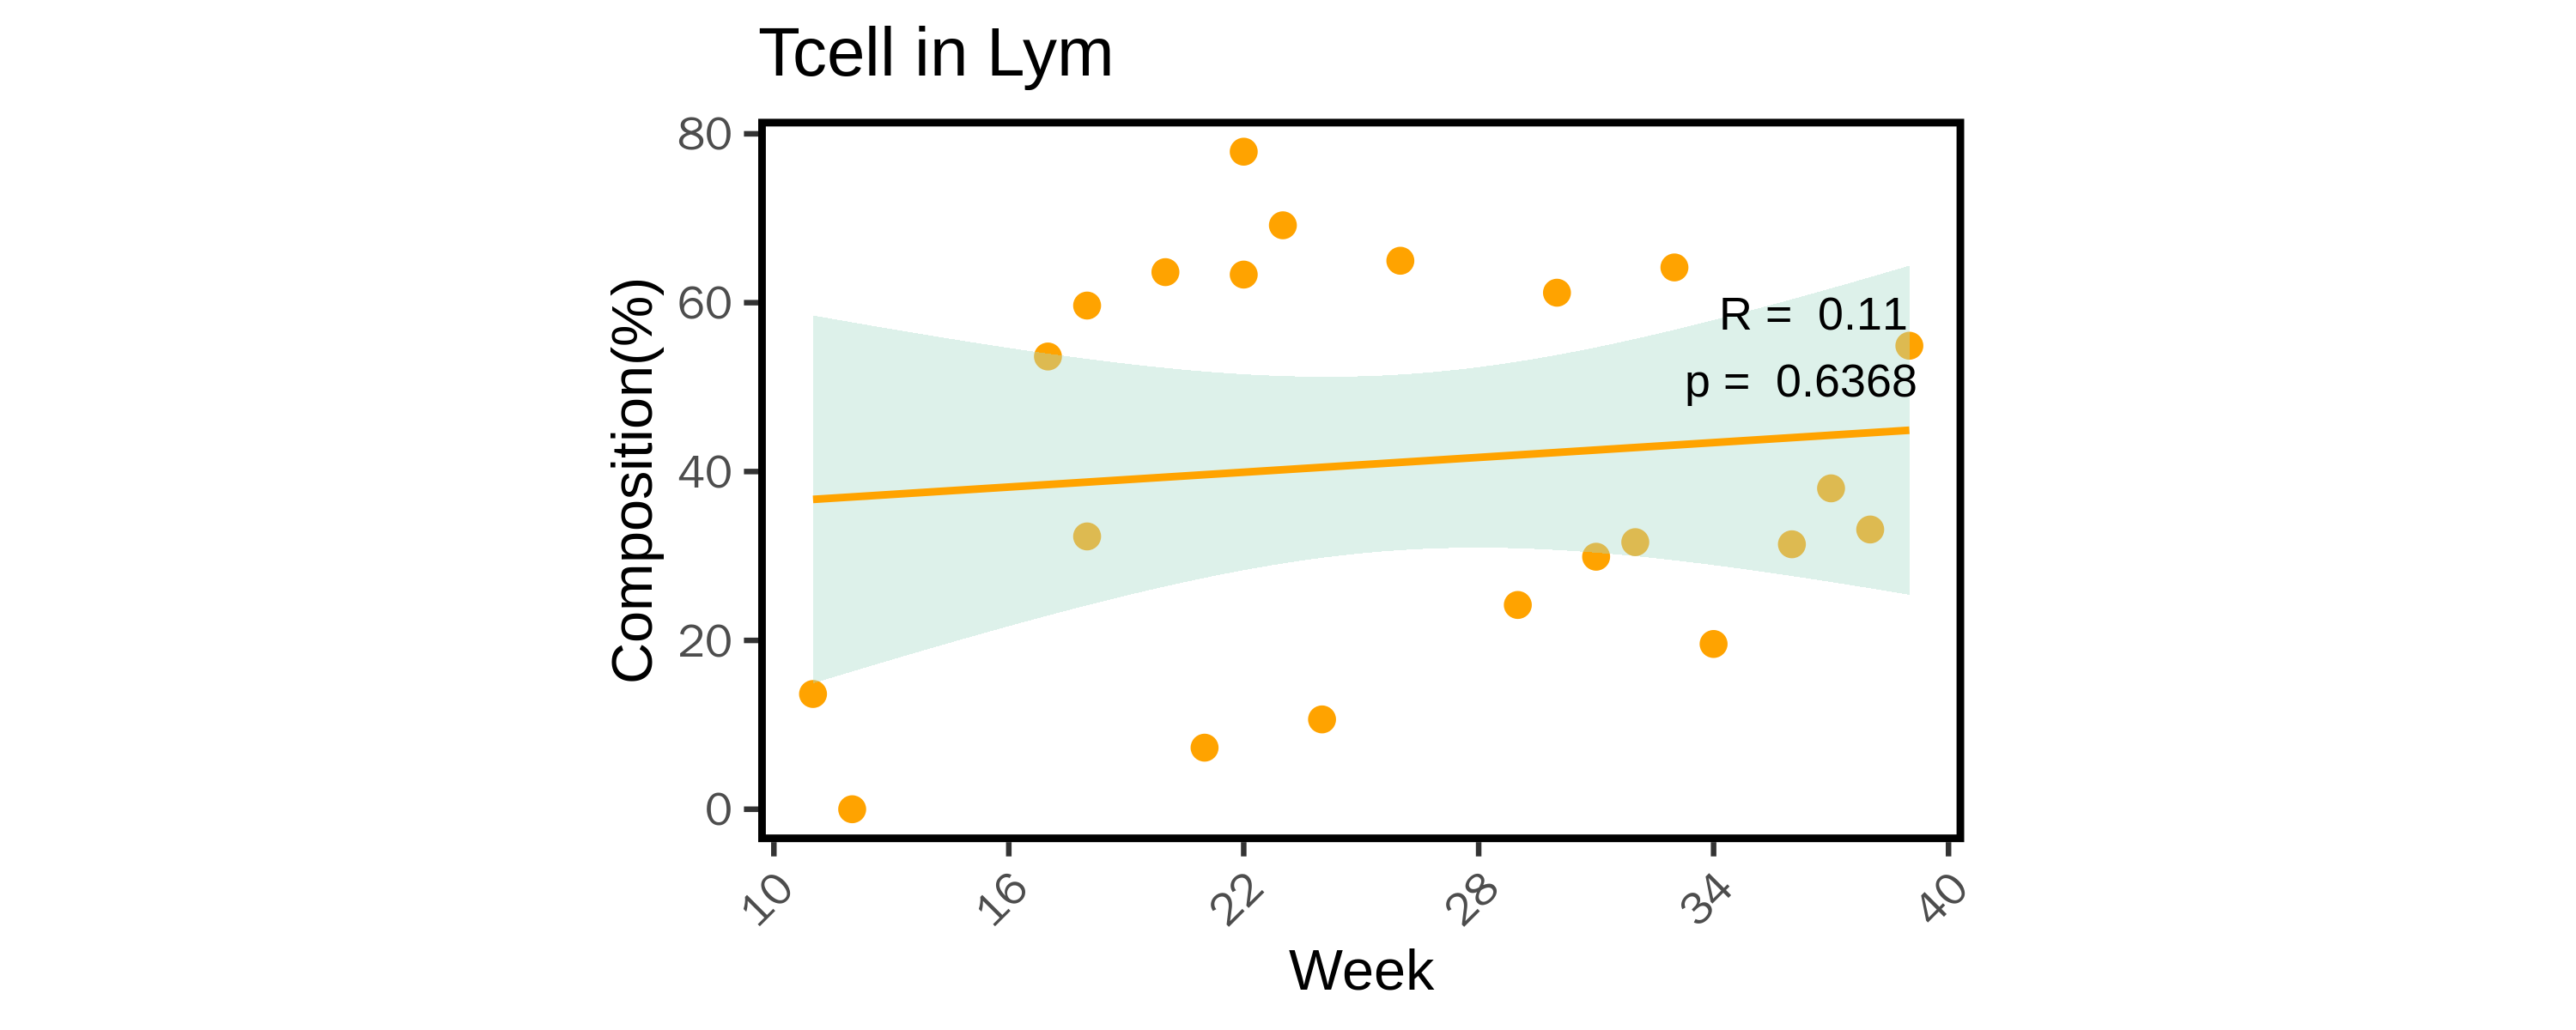

In [14]:
%%R -w 3000 -h 1200 -r 300  -i PBMCadata_lymcellobs
# %%R
library(dplyr)

result_Tcell <- calculate_percentage(Tper, 'Tcell', 'Last_cell_type3')
result_Tcell
plot_Tcell <- plot_percentage(result_Tcell ,'Tcell in Lym')
print(plot_Tcell)

In [15]:
%%R
unique(PBMCadata_lymcellobs$Cell_lineage)

[1] B_CELL    T/ILC     PRECURSOR MK/ERY    NK        DC        MYELOID  
Levels: B_CELL DC MK/ERY MYELOID NK PRECURSOR T/ILC


`geom_smooth()` using formula = 'y ~ x'


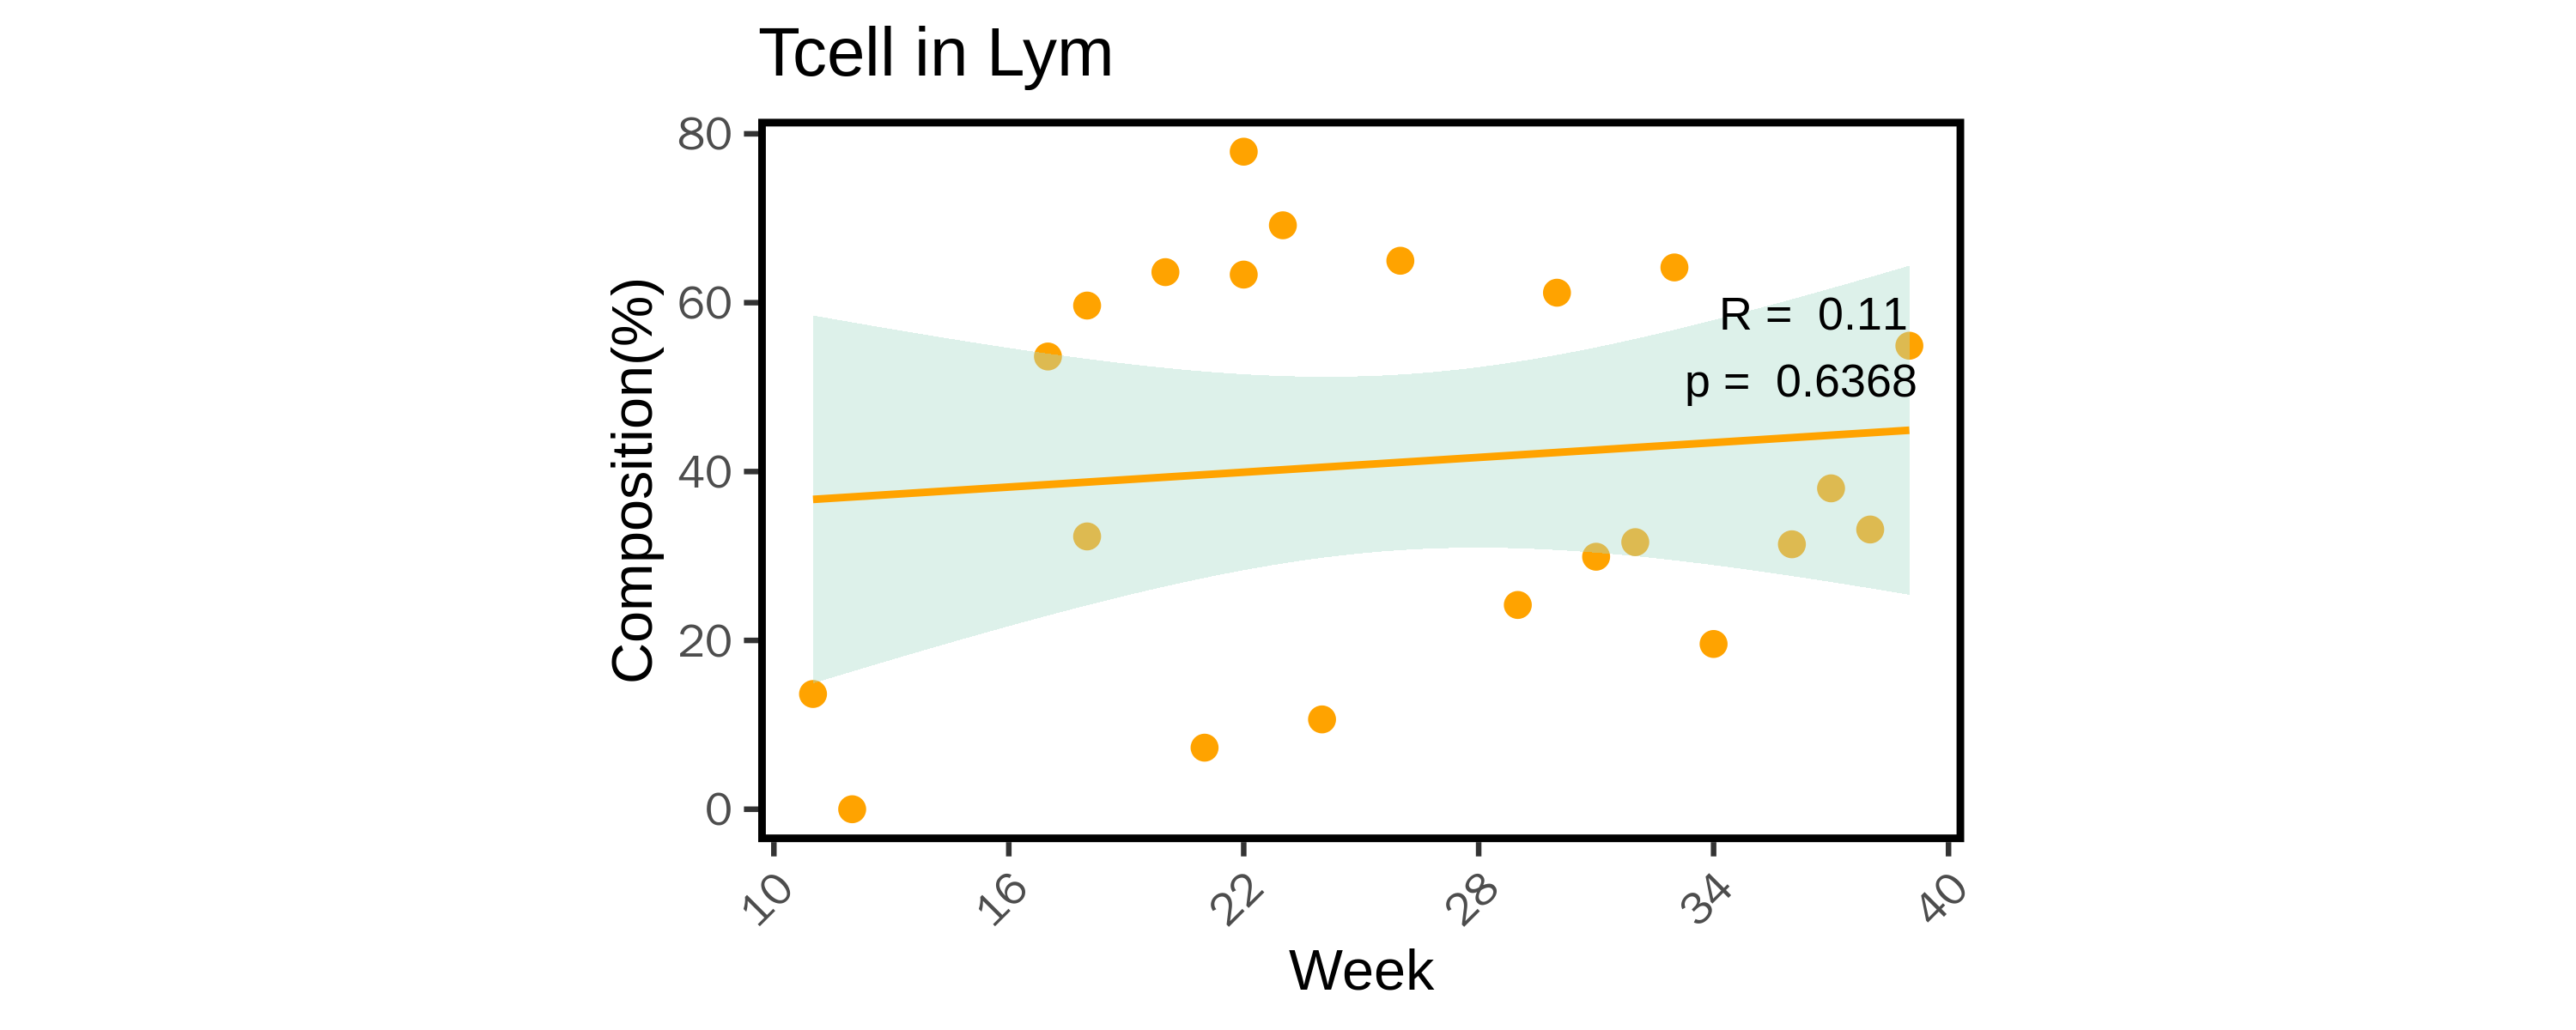

In [16]:
%%R -w 3000 -h 1200 -r 300  -i PBMCadata_lymcellobs
TNKILCper <- PBMCadata_lymcellobs %>%
  mutate(Last_cell_type3 = ifelse(grepl('T/ILC',Cell_lineage),
                                   'Tcell',
                                   'Others lym'))
result_TNKILCcell <- calculate_percentage(TNKILCper , 'Tcell', 'Last_cell_type3')
result_Tcell
plot_TNKILCcell <- plot_percentage(result_TNKILCcell ,'TNKILC in Lym')
print(plot_Tcell)

In [17]:
PBMCadata.obs.Last_cell_type

Cellname
Z48_AAACCTGAGATAGGAG-1        CXCR5- Naïve B
Z48_AAACCTGAGGCACATG-1              Late_ERY
Z48_AAACCTGAGGTGCAAC-1               Mid_ERY
Z48_AAACCTGCAAGAGTCG-1              Late_ERY
Z48_AAACCTGCACACCGAC-1              Late_ERY
                                 ...        
Z123_TTTGTCATCGCAAGCC-1             Late_ERY
Z123_TTTGTCATCTAACTCT-1             Late_ERY
Z123_TTTGTCATCTACTTAC-1    Th17like_INNATE_T
Z123_TTTGTCATCTCCCTGA-1       CXCR5- Naïve B
Z123_TTTGTCATCTGGTGTA-1             Late_ERY
Name: Last_cell_type, Length: 172432, dtype: category
Categories (38, object): ['CD14+PPBP+ Monocytes', 'CD56highCD16low NK', 'CX3CR1+ NK', 'CXCR5+ Naïve B', ..., 'Th17like_INNATE_T', 'Treg', 'abT(entry)', 'pDC']

In [18]:
TcellPBMC=PBMCadata[PBMCadata.obs.Cell_lineage.astype('str').isin(['T/ILC'])]

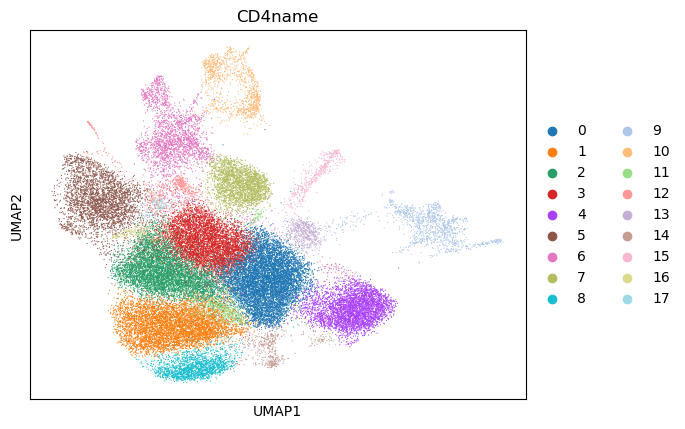

In [19]:
NaCD4T2=Multi_create_sub2(TcellPBMC,['Cycling Treg','Th17like_INNATE_T','Naïve CD4 T','Treg','Gamma Delta V2 T','Gamma Delta V1 T'],name="CD4name",res=1,col='Last_cell_type')

In [20]:
%%R
# library(tidyverse)
# CD4obs=read.csv('PBMCCD4obs.csv')
# CD4obs %>% head()

NULL


In [21]:
%%R -i PBMCadata_lymcellobs
calculate_percentage <- function(input_data, cluster_name, cell_type_col) {
  Data1 <- table(input_data$AdjustedID) %>% as.data.frame()
  colnames(Data1) <- c('AdjustedID', 'SumCell')

  Data2 <- table(input_data$AdjustedID, input_data[[cell_type_col]]) %>% as.data.frame() %>% filter(Var2 == cluster_name)
  colnames(Data2) <- c('AdjustedID', 'Cluster', 'Clusternum')

  TData3 <- merge(Data1, Data2, by = 'AdjustedID')
  TData3$percentage <- TData3$Clusternum / TData3$SumCell * 100
  TData3$Group <- as.numeric((factor(TData3$AdjustedID)))
  TData3$Week <- substring(TData3$AdjustedID, 2, 3)
  TData3$Group <- as.numeric((factor(TData3$Week)))

  return(TData3)
}

library(dplyr)

CD4adata2 <- PBMCadata_lymcellobs %>%
  mutate(Last_cell_type3 = ifelse(Last_cell_type %in% c('Cycling Treg','DN(Q) T','Th17like_INNATE_T','Naïve CD4 T','Treg'),
                                   'Functional CD4',
                                   'Others lym'))
# Example usage
resultFunctional_CD4 <- calculate_percentage(CD4adata2, 'Functional CD4', 'Last_cell_type3')
print(resultFunctional_CD4)


   AdjustedID SumCell        Cluster Clusternum percentage Group Week
1   B11.6_P24    7561 Functional CD4        732   9.681259     1   11
2    B12.0_P2      27 Functional CD4          0   0.000000     2   12
3    B17.4_P3     345 Functional CD4        137  39.710145     3   17
4    B18.0_P4    8869 Functional CD4       3563  40.173639     4   18
5    B18.6_P5    8071 Functional CD4       1679  20.802874     4   18
6    B20.9_P7    4219 Functional CD4       1671  39.606542     5   20
7    B21.7_P8    5486 Functional CD4        254   4.629967     6   21
8   B22.4_P23    7373 Functional CD4       3613  49.003119     7   22
9    B22.4_P9    4951 Functional CD4       2891  58.392244     7   22
10  B23.4_P10    8555 Functional CD4       4053  47.375804     8   23
11  B24.6_P11    3703 Functional CD4        214   5.779098     9   24
12  B26.9_P12    5897 Functional CD4       2948  49.991521    10   26
13  B29.1_P13    3906 Functional CD4        738  18.894009    11   29
14  B30.4_P14    841

In [22]:
CD4obs=NaCD4T2.obs

In [23]:
%%R -i CD4obs
calculate_percentage1 <- function(cluster_name) {
  Data1 <- table(CD4obs$AdjustedID) %>% as.data.frame()
  colnames(Data1) <- c('Var1', 'CD4sum')

  Data2 <- table(CD4obs$AdjustedID, CD4obs$Last_cell_type) %>% as.data.frame() %>% filter(Var2 == cluster_name)
  colnames(Data2) <- c('Var1', 'Cluster', 'CD4term')

  Data3 <- merge(Data1, Data2, by = 'Var1')
  Data3$percentage <- Data3$CD4term / Data3$CD4sum * 100
  Data3$Group <- as.numeric((factor(Data3$Var1)))
  Data3$Week <- substring(Data3$Var1, 2, 3)
  Data3$Group <- as.numeric((factor(Data3$Week)))

  return(Data3)
}

# Example usage
resultTreg <- calculate_percentage1('Treg')
print(resultTreg)

        Var1 CD4sum Cluster CD4term percentage Group Week
1  B11.6_P24    839    Treg     247  29.439809     1   11
2   B17.4_P3    147    Treg      34  23.129252     2   17
3   B18.0_P4   3679    Treg     438  11.905409     3   18
4   B18.6_P5   1808    Treg     202  11.172566     3   18
5   B20.9_P7   1760    Treg     134   7.613636     4   20
6   B21.7_P8    273    Treg      30  10.989011     5   21
7  B22.4_P23   3688    Treg     557  15.103037     6   22
8   B22.4_P9   2980    Treg     320  10.738255     6   22
9  B23.4_P10   4198    Treg     363   8.646975     7   23
10 B24.6_P11    231    Treg      41  17.748918     8   24
11 B26.9_P12   2960    Treg     253   8.547297     9   26
12 B29.1_P13    745    Treg      66   8.859060    10   29
13 B30.4_P14   3184    Treg     129   4.051508    11   30
14 B31.3_P15   1765    Treg     142   8.045326    12   31
15 B32.4_P16   1087    Treg      91   8.371665    13   32
16 B33.3_P17   3629    Treg      73   2.011573    14   33
17 B34.1_P18  

`geom_smooth()` using formula = 'y ~ x'


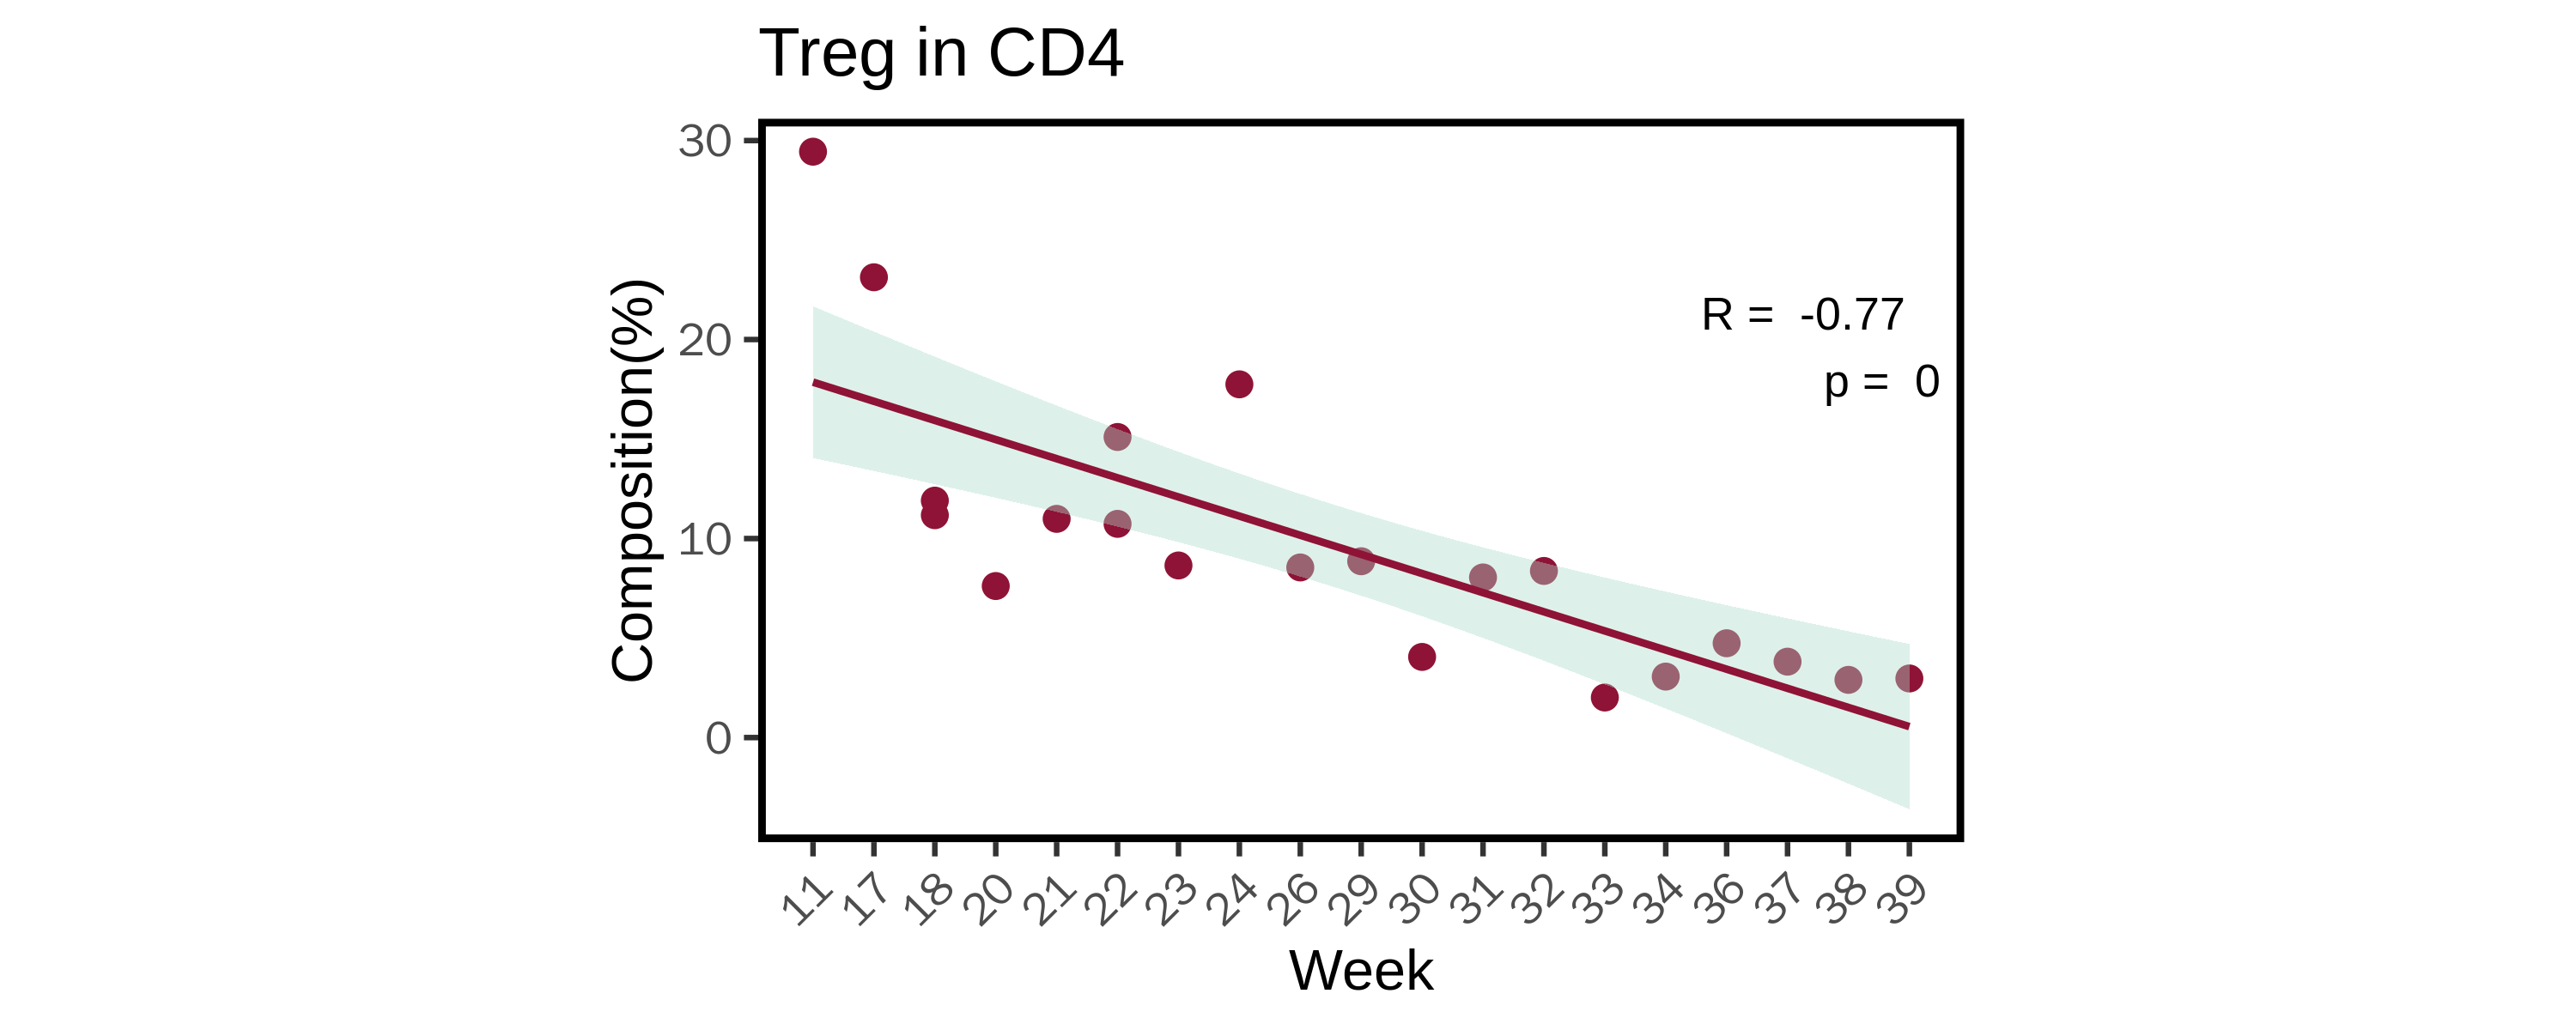

In [24]:
%%R -w 3000 -h 1200 -r 300
plot_percentage1 <- function(input_data,title='Th17like in CD4') {
  cor_results_T <- input_data %>%
    summarise(cor_test = list(broom::tidy(cor.test(Group, percentage)))) %>%
    unnest(cor_test)
  week_mapping_T <- input_data %>%
    select(Group, Week) %>%
    unique() %>%
    arrange(Group)
    plot <- ggplot(input_data, aes(x = Group, y = percentage)) +
    geom_point(aes(color=Cluster),size = 3) +
    geom_smooth(aes(x = Group, y = percentage,color=Cluster), method = 'lm', se = TRUE, show.legend = FALSE,
                fill = '#aaddcc',  linetype = "solid") +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
           panel.border = element_rect(linetype = 1, colour = "black", size = 2),
          strip.background = element_blank(), legend.position = "none", aspect.ratio = 0.6) +
    xlab("Week") + ggtitle(title) +
    ylab("Composition(%)") +
    scale_x_continuous(breaks = week_mapping_T$Group,
                       labels = week_mapping_T$Week) +
    geom_text(data = cor_results_T, aes(label = paste("\n", "\n", "R = ", 
                                                      round(estimate, 2), "\np = ", round(p.value, 4)), 
                                     x = Inf, y = Inf,
                                    size = 6), hjust = 1.2, vjust = 1.2,hjust = "right")+
    scale_color_manual(values=sample(colorname2, 1) ) 
    return(plot)
}

# Example usage
result_T <- calculate_percentage1('Treg')
plot_Treg <- plot_percentage1(result_T,'Treg in CD4')
print(plot_Treg)

### Th

In [25]:
 NaCD4T2= NaCD4T2.raw.to_adata()

In [26]:
# Create a Series based on CXCR5 expression values
cxcr5_expression = NaCD4T2[:, "CXCR5"].X.toarray()
cell_type = pd.Series(["Tfh" if expr > 0 else "Th" for expr in cxcr5_expression.ravel()], index=NaCD4T2.obs.index, name="cell_type")

# Add the cell_type Series to NaCD4T2.obs as a new column
NaCD4T2.obs["CXCR5_cell"] = cell_type

In [27]:
import numpy as np
import pandas as pd

def assign_cell_type_based_on_genes(adata, pos_genes, neg_genes, column_name, cell_type_true, cell_type_false):
    # Create boolean arrays indicating whether all positive genes' expression values are greater than 0 
    # and negative genes' expression values are less than 0 in each cell
    pos_genes_expressed_mask = np.logical_and.reduce([adata[:, gene].X.toarray().ravel() > 0 for gene in pos_genes])
    neg_genes_expressed_mask = np.logical_and.reduce([adata[:, gene].X.toarray().ravel() <= 0.0 for gene in neg_genes])

    # Combine the positive and negative genes' expression masks
    combined_mask = np.logical_and(pos_genes_expressed_mask, neg_genes_expressed_mask)

    # Assign cell type based on the combined boolean array and create a new column
    cell_type = pd.Series(np.where(combined_mask, cell_type_true, cell_type_false),
                          index=adata.obs.index, name=column_name)

    # Add the new column to adata.obs
    adata.obs[column_name] = cell_type

    return adata

In [28]:
import numpy as np
import pandas as pd

def assign_cell_type_based_on_genes_v2(adata, pos_genes, neg_genes, column_name, cell_type_true, cell_type_false):
    # Create boolean arrays indicating whether any positive genes' expression values are greater than 0 
    # and negative genes' expression values are less than or equal to 0 in each cell
    pos_genes_expressed_mask = np.logical_or.reduce([adata[:, gene].X.toarray().ravel() > 0 for gene in pos_genes])
    neg_genes_expressed_mask = np.logical_and.reduce([adata[:, gene].X.toarray().ravel() <= 0.0 for gene in neg_genes])

    # Combine the positive and negative genes' expression masks
    combined_mask = np.logical_and(pos_genes_expressed_mask, neg_genes_expressed_mask)

    # Assign cell type based on the combined boolean array and create a new column
    cell_type = pd.Series(np.where(combined_mask, cell_type_true, cell_type_false),
                          index=adata.obs.index, name=column_name)

    # Add the new column to adata.obs
    adata.obs[column_name] = cell_type

    return adata

In [29]:
NaCD4T2

AnnData object with n_obs × n_vars = 43594 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'CD4name', 'CXCR5_cell'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap', 'CD4name_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [30]:
# pos_genes = [ 'CD3D',  'CD4']
# neg_genes = ['CD8A']
# column_name = "NewCD4"
# cell_type_true = "NeCD4"
# cell_type_false = "NoCD4"

# NaCD4T3 = assign_cell_type_based_on_genes(NaCD4T2, pos_genes, neg_genes, column_name, cell_type_true, cell_type_false)

In [31]:
# NaCD4T3.obs.Last_cell_type.unique()

In [32]:
# NaCD4T3.obs['NewCD4'].value_counts()


In [33]:
PBMCadata_lymcell.obs.Last_cell_type.unique()

['CXCR5- Naïve B', 'Treg', 'CXCR5+ Naïve B', 'Th17like_INNATE_T', 'Naïve CD4 T', ..., 'Macrophages', 'Small pre-B', 'Cycling Treg', 'DP(P) T', 'DN(Q) T']
Length: 33
Categories (33, object): ['CD14+PPBP+ Monocytes', 'CD56highCD16low NK', 'CX3CR1+ NK', 'CXCR5+ Naïve B', ..., 'Th17like_INNATE_T', 'Treg', 'abT(entry)', 'pDC']

In [34]:
CD8adata_lymcell=PBMCadata_lymcell[PBMCadata_lymcell.obs.Last_cell_type=='Naïve CD8 T']

In [35]:
pos_genes = [ 'CD3D',  'CD8A', 'GZMK', 'CXCR3', 'CD44', 'CXCR4']
neg_genes = ['CCR7','CD4']
column_name = "Memcell_type"
cell_type_true = "CD8Tem"
cell_type_false = "CD8Tnaive"

CD8adata_lymcell_Mem = assign_cell_type_based_on_genes(CD8adata_lymcell, pos_genes, neg_genes, column_name, cell_type_true, cell_type_false)

In [36]:
CD8adata_lymcell_Memobs=CD8adata_lymcell_Mem.obs

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
`geom_smooth()` using formula = 'y ~ x'


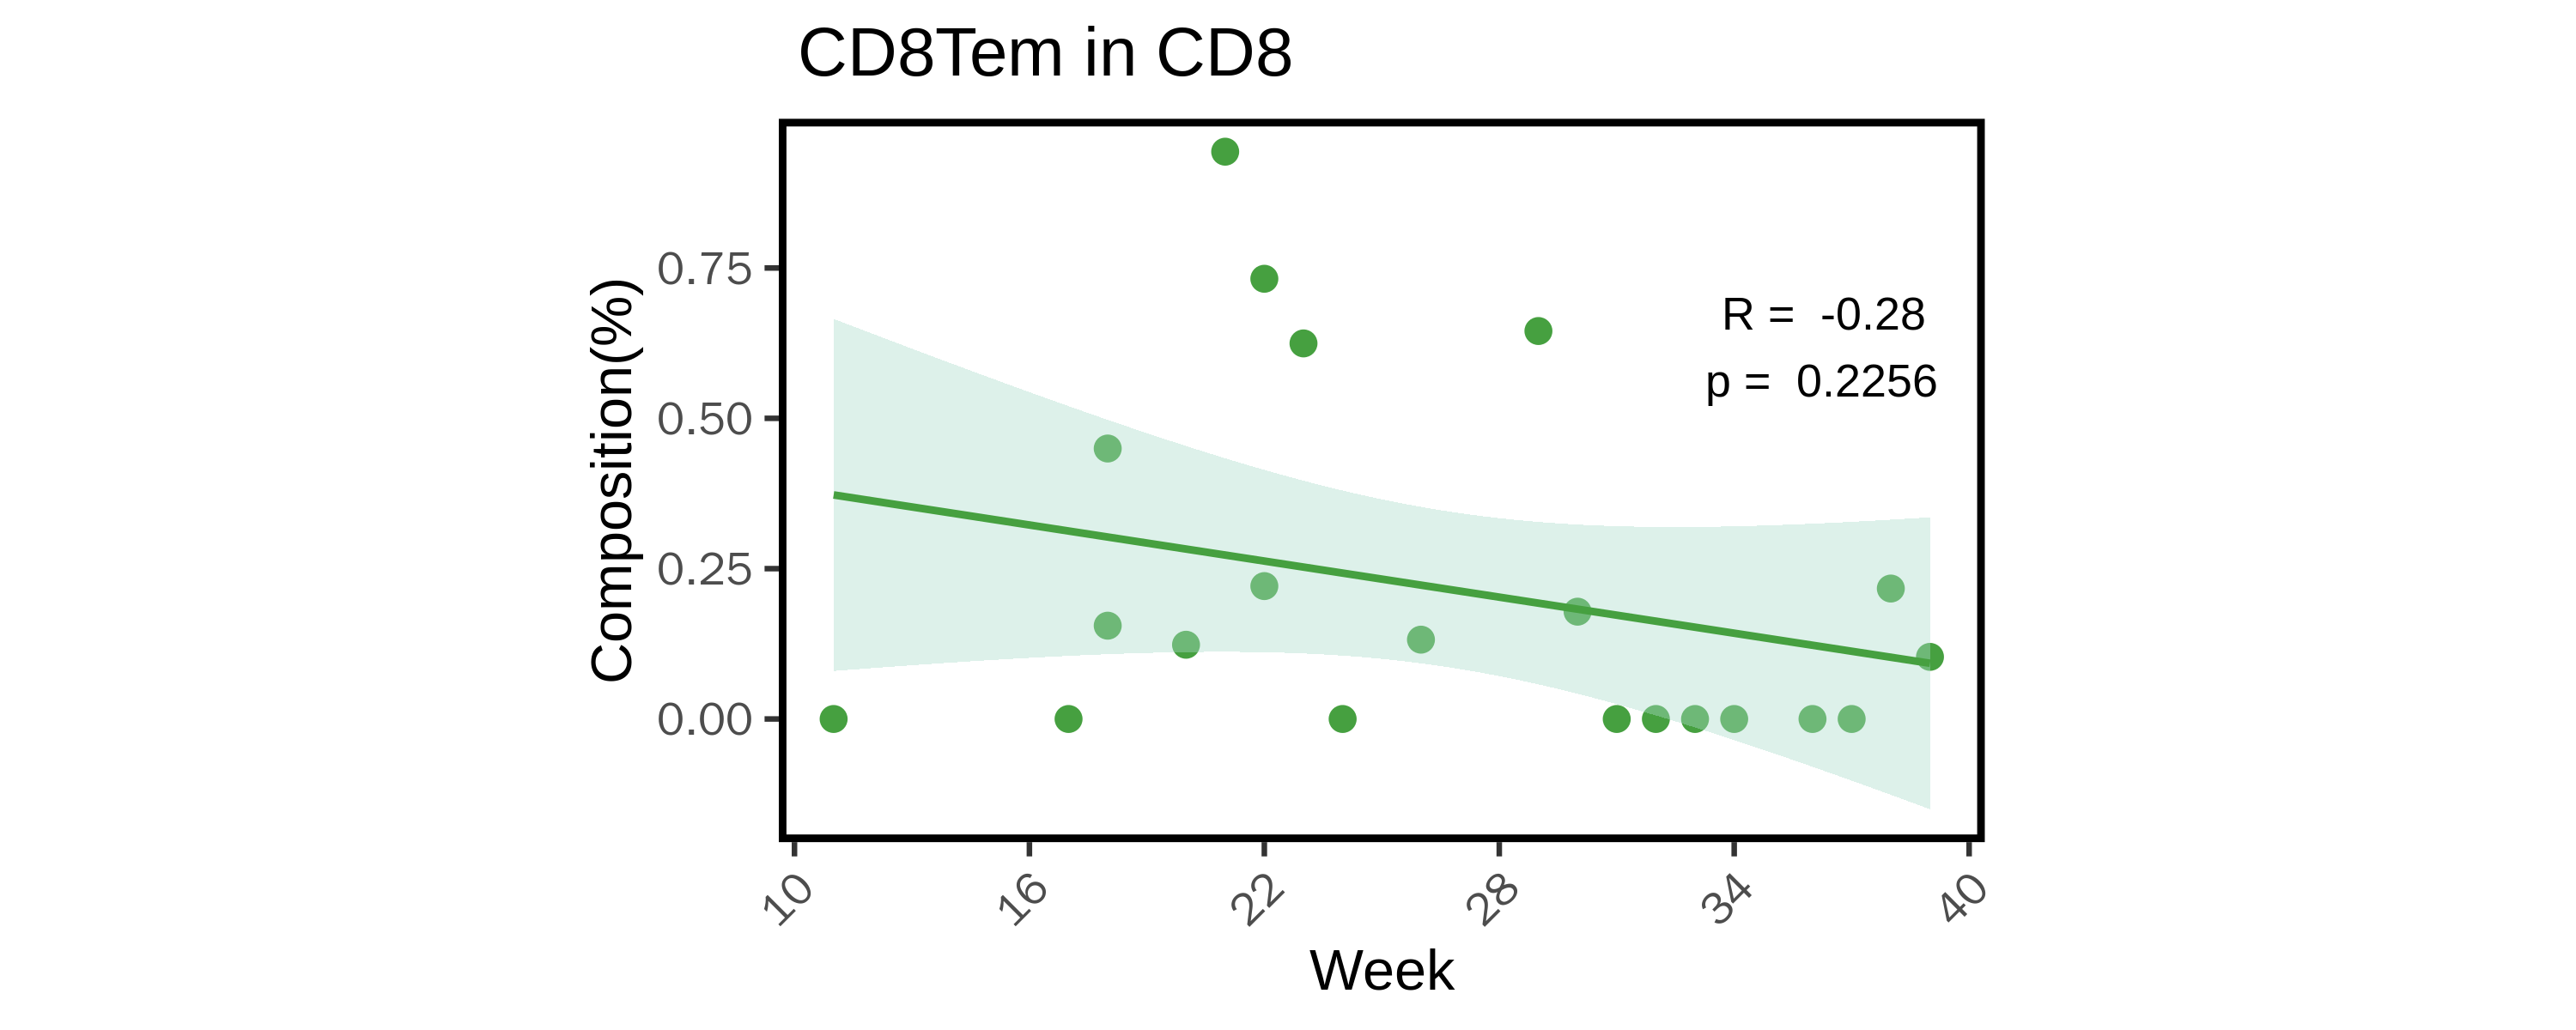

In [37]:
%%R -w 3000 -h 1200 -r 300 -i CD8adata_lymcell_Memobs
library(dplyr)
result_Memcell <- calculate_percentage(CD8adata_lymcell_Memobs  , 'CD8Tem', 'Memcell_type')
plot_Memcell <- plot_percentage(result_Memcell ,' CD8Tem in CD8')+scale_color_manual(values= colorname2)
print(plot_Memcell )

In [38]:
CD8T=PBMCadata_lymcell[PBMCadata_lymcell.obs.Last_cell_type.isin(['Naïve CD8 T'])]

In [39]:
# PBMCadata_lymcell.unique()

In [40]:
pos_genes2 = ['CD3D', 'CD8A', 'KLRG1', 'CX3CR1', 'FCGR3A', 'FGFBP2', 'PRF1', 'GZMH', 'TBX21', 'EOMES', 'S1PR1', 'S1PR5']
neg_genes2 = ['CCR7','CD4']
column_name2 = "CD8_TEMRA_TEFF"
cell_type_true = "CD8_TEMRA"
cell_type_false = "Others"

PBMCadata_lymcell_TEMRA= assign_cell_type_based_on_genes(CD8T, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)

In [41]:
PBMCadata_lymcell_TEMRA.obs.CD8_TEMRA_TEFF.value_counts()

Others    13181
Name: CD8_TEMRA_TEFF, dtype: int64

In [42]:
PBMCadata_lymcell_TEMRAobs=PBMCadata_lymcell_TEMRA.obs

In [43]:
%%R
C2=function (input_data, cluster_name, cell_type_col) 
{
    Data1 <- table(input_data$AdjustedID) %>% as.data.frame()
    colnames(Data1) <- c("AdjustedID", "SumCell")
    
    Data2 <- table(input_data$AdjustedID, input_data[[cell_type_col]]) %>% 
        as.data.frame() %>% filter(Var2 == cluster_name)
    colnames(Data2) <- c("AdjustedID", "Cluster", "Clusternum")
    
    # 如果Data2不包含所需的cluster_name，则为Data2添加一行，其中Clusternum为0
    if (nrow(Data2) == 0 || all(Data2$Cluster == "others")) {
        Data2 <- rbind(Data2, data.frame(AdjustedID = unique(input_data$AdjustedID), 
                                         Cluster = cluster_name, 
                                         Clusternum = 0))
    }
    
    TData3 <- merge(Data1, Data2, by = "AdjustedID", all.x = TRUE)
    
    # 使用ifelse确保当Data2没有cluster_name时，Clusternum为0
    TData3$Clusternum <- ifelse(is.na(TData3$Clusternum), 0, TData3$Clusternum)
    
    TData3$percentage <- TData3$Clusternum/TData3$SumCell * 100
    TData3$Group <- as.numeric(factor(TData3$AdjustedID))
    TData3$Week <- substring(TData3$AdjustedID, 2, 3)
    TData3$Group <- as.numeric(factor(TData3$Week))
    
    return(TData3)
}

`geom_smooth()` using formula = 'y ~ x'


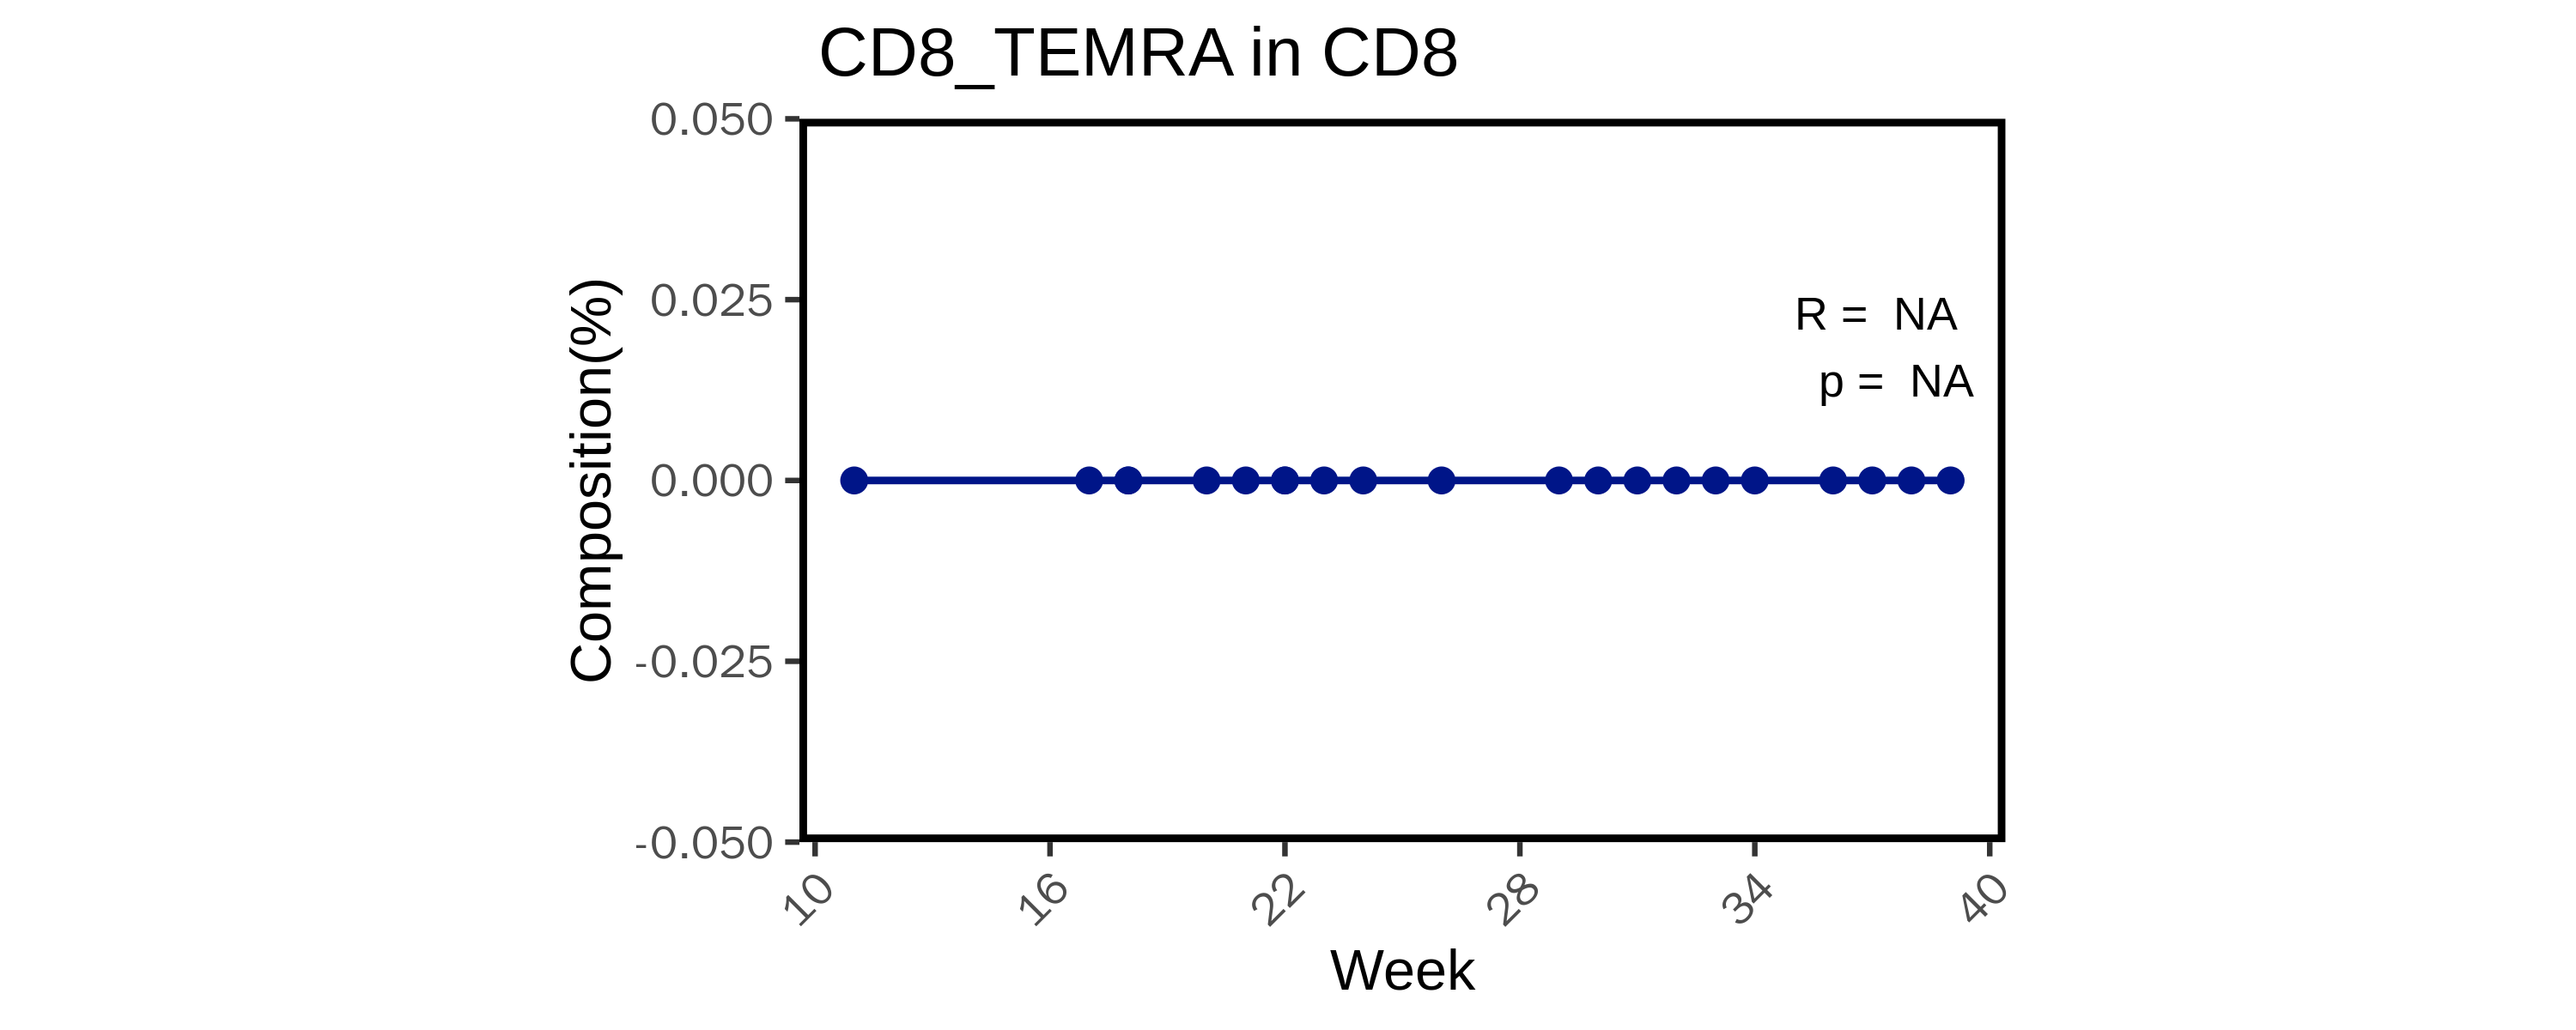

In [44]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_TEMRAobs
library(dplyr)
result_TEMRAcell <- C2(PBMCadata_lymcell_TEMRAobs  , 'CD8_TEMRA', 'CD8_TEMRA_TEFF')
plot_CD8_TEMRA <- plot_percentage(result_TEMRAcell ,' CD8_TEMRA in CD8')
print(plot_CD8_TEMRA )

In [45]:
# %%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_TEMRAobs
# library(dplyr)
# result_TEMRAcell <- calculate_percentage(PBMCadata_lymcell_TEMRAobs  , 'CD8_TEMRA', 'CD8_TEMRA_TEFF')
# plot_CD8_TEMRA <- plot_percentage(result_TEMRAcell ,' CD8_TEMRA in Lym')
# print(plot_CD8_TEMRA )

In [46]:
pos_genes2 = ['CD3D', 'TRDV1']
neg_genes2=['TRDV2']
column_name2 = "TRDVone2"
cell_type_true = "TRDVonegene"
cell_type_false = "Others"

PBMCadata_lymcell_TRDV1= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)

In [47]:
PBMCadata_lymcell_TRDV1obs=PBMCadata_lymcell_TRDV1.obs

`geom_smooth()` using formula = 'y ~ x'


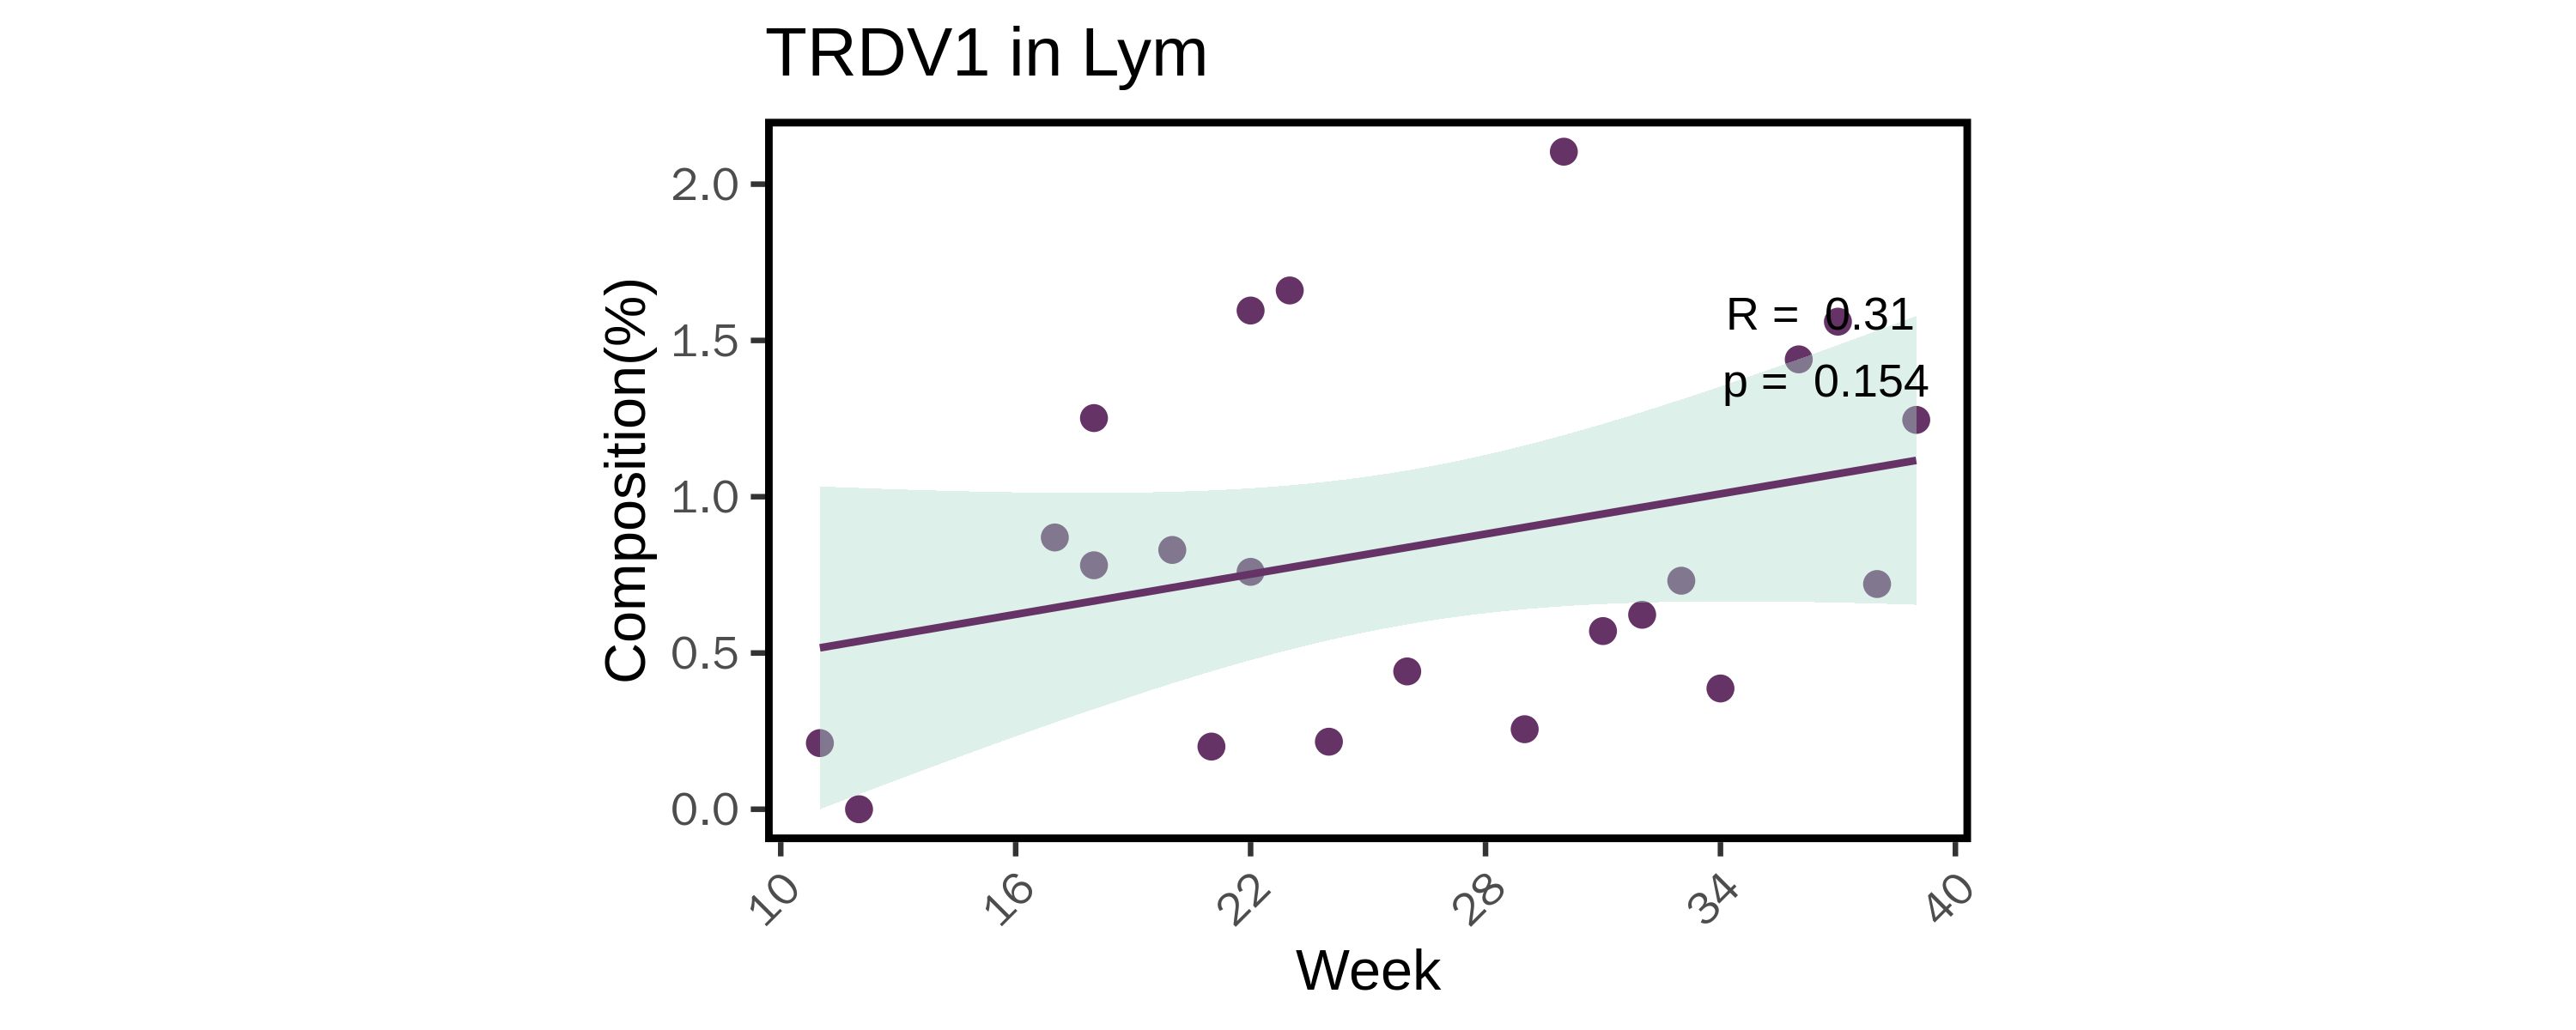

In [48]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_TRDV1obs
library(dplyr)
result_TRDV1cell <- calculate_percentage(PBMCadata_lymcell_TRDV1obs  , 'TRDVonegene', 'TRDVone2')
plot_CD8_TRDV1 <- plot_percentage(result_TRDV1cell ,'TRDV1 in Lym')
print(plot_CD8_TRDV1 )

In [49]:
%%R
head(result_TRDV1cell)

  AdjustedID SumCell     Cluster Clusternum percentage Group Week
1  B11.6_P24    7561 TRDVonegene         16  0.2116122     1   11
2   B12.0_P2      27 TRDVonegene          0  0.0000000     2   12
3   B17.4_P3     345 TRDVonegene          3  0.8695652     3   17
4   B18.0_P4    8869 TRDVonegene        111  1.2515503     4   18
5   B18.6_P5    8071 TRDVonegene         63  0.7805724     4   18
6   B20.9_P7    4219 TRDVonegene         35  0.8295805     5   20


`geom_smooth()` using formula = 'y ~ x'


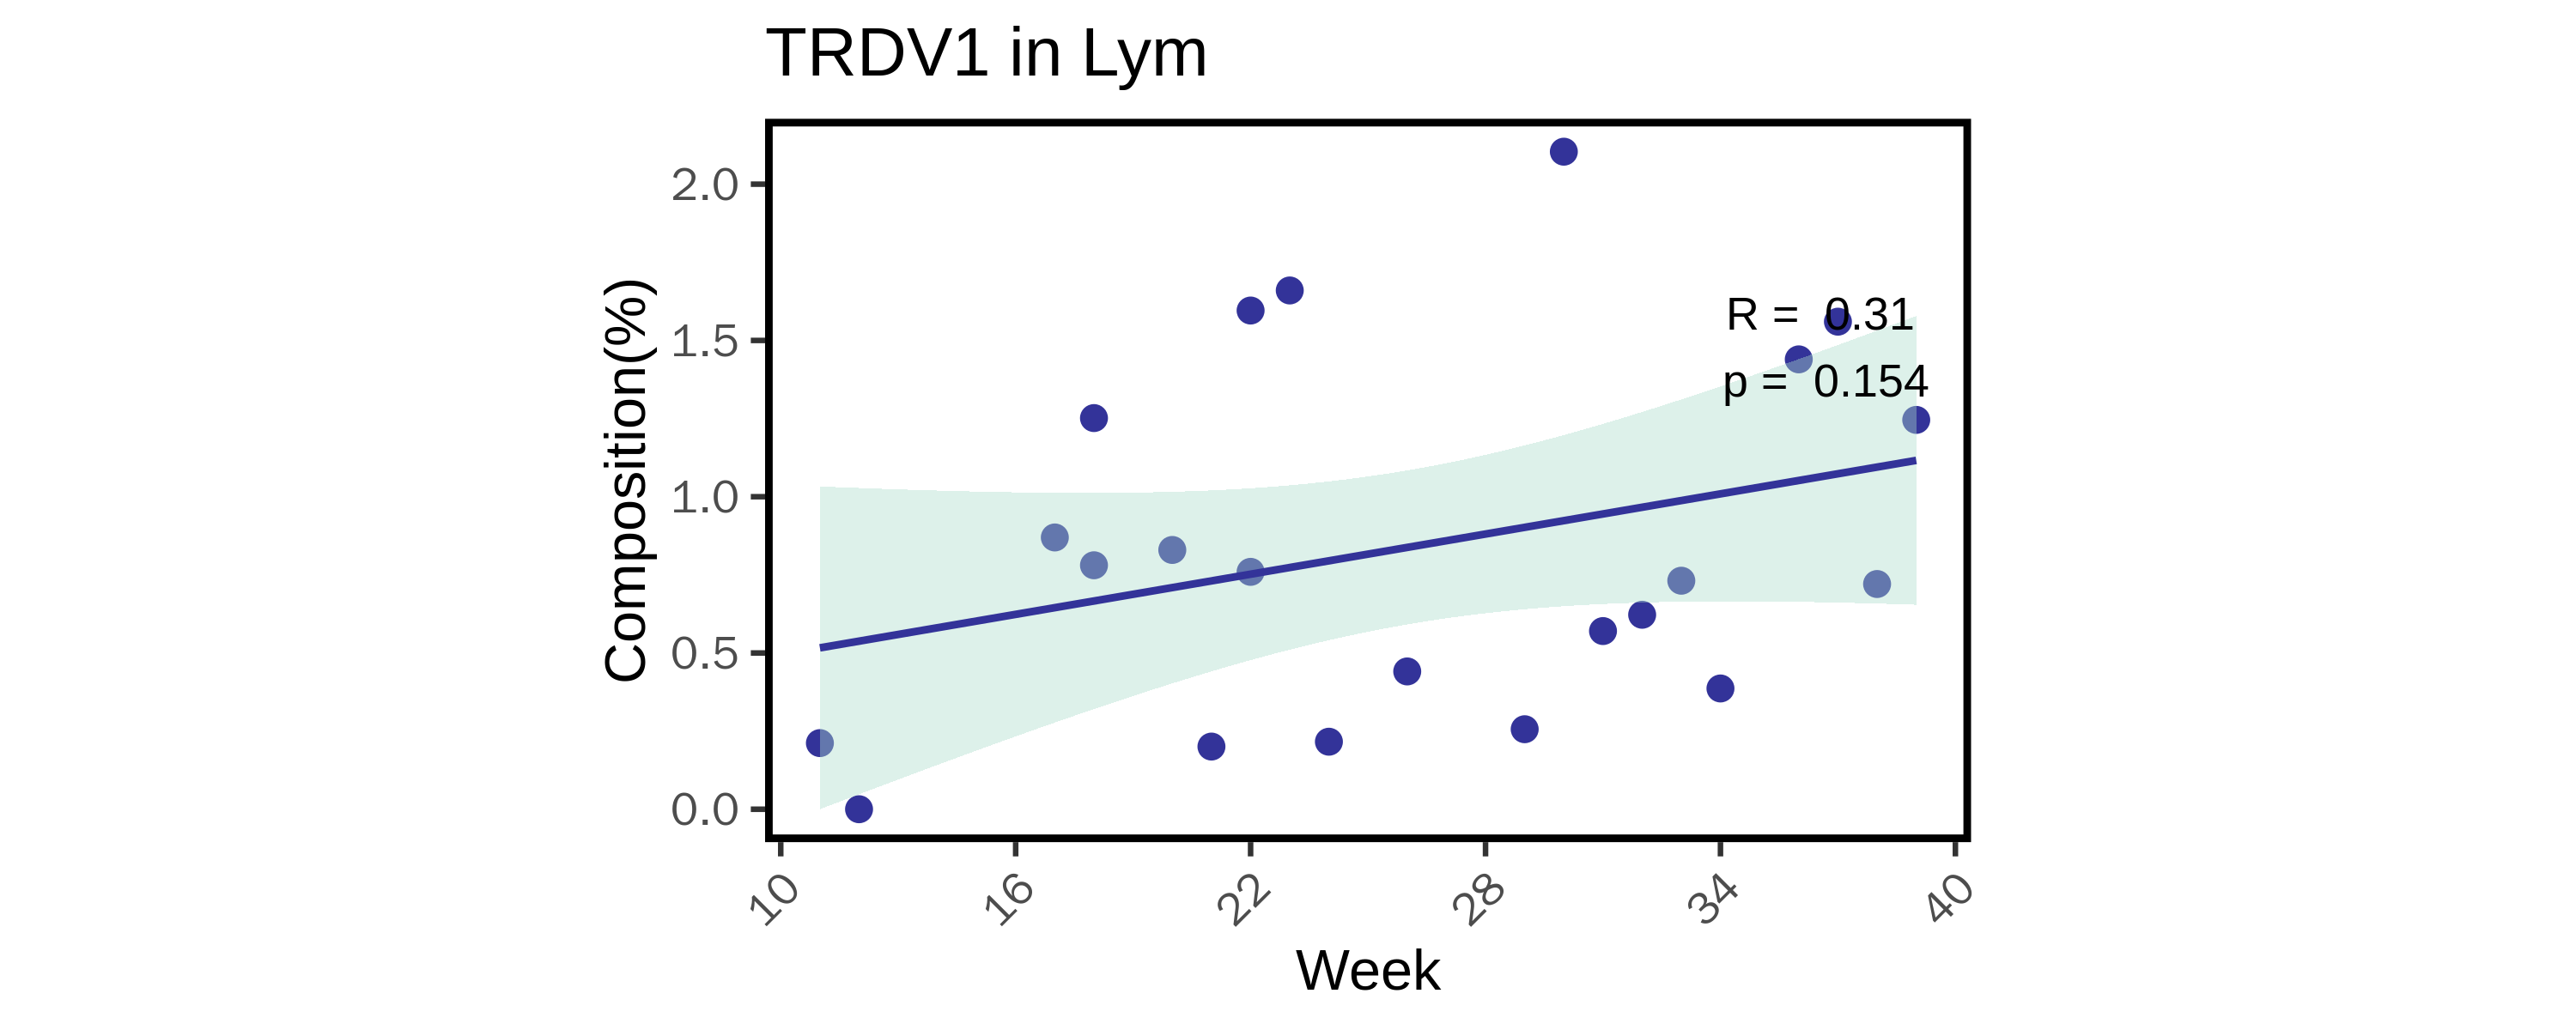

In [50]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_TRDV1obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "TRDVonegene"
gene2 <- "TRDVone2"

# Call the function with the input data
TRDV1_Lym_plot <- plot_gene_percentage_in_R(PBMCadata_lymcell_TRDV1obs, gene1, gene2,name1="TRDV1")
print(TRDV1_Lym_plot)

In [51]:
pos_genes2 = ['CD3D', 'TRDV2']
neg_genes2=['TRDV1']
column_name2 = "TRDVone2"
cell_type_true = "TRDV2"
cell_type_false = "Others"

PBMCadata_lymcell_TRDV2= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_TRDV2obs=PBMCadata_lymcell_TRDV2.obs

`geom_smooth()` using formula = 'y ~ x'


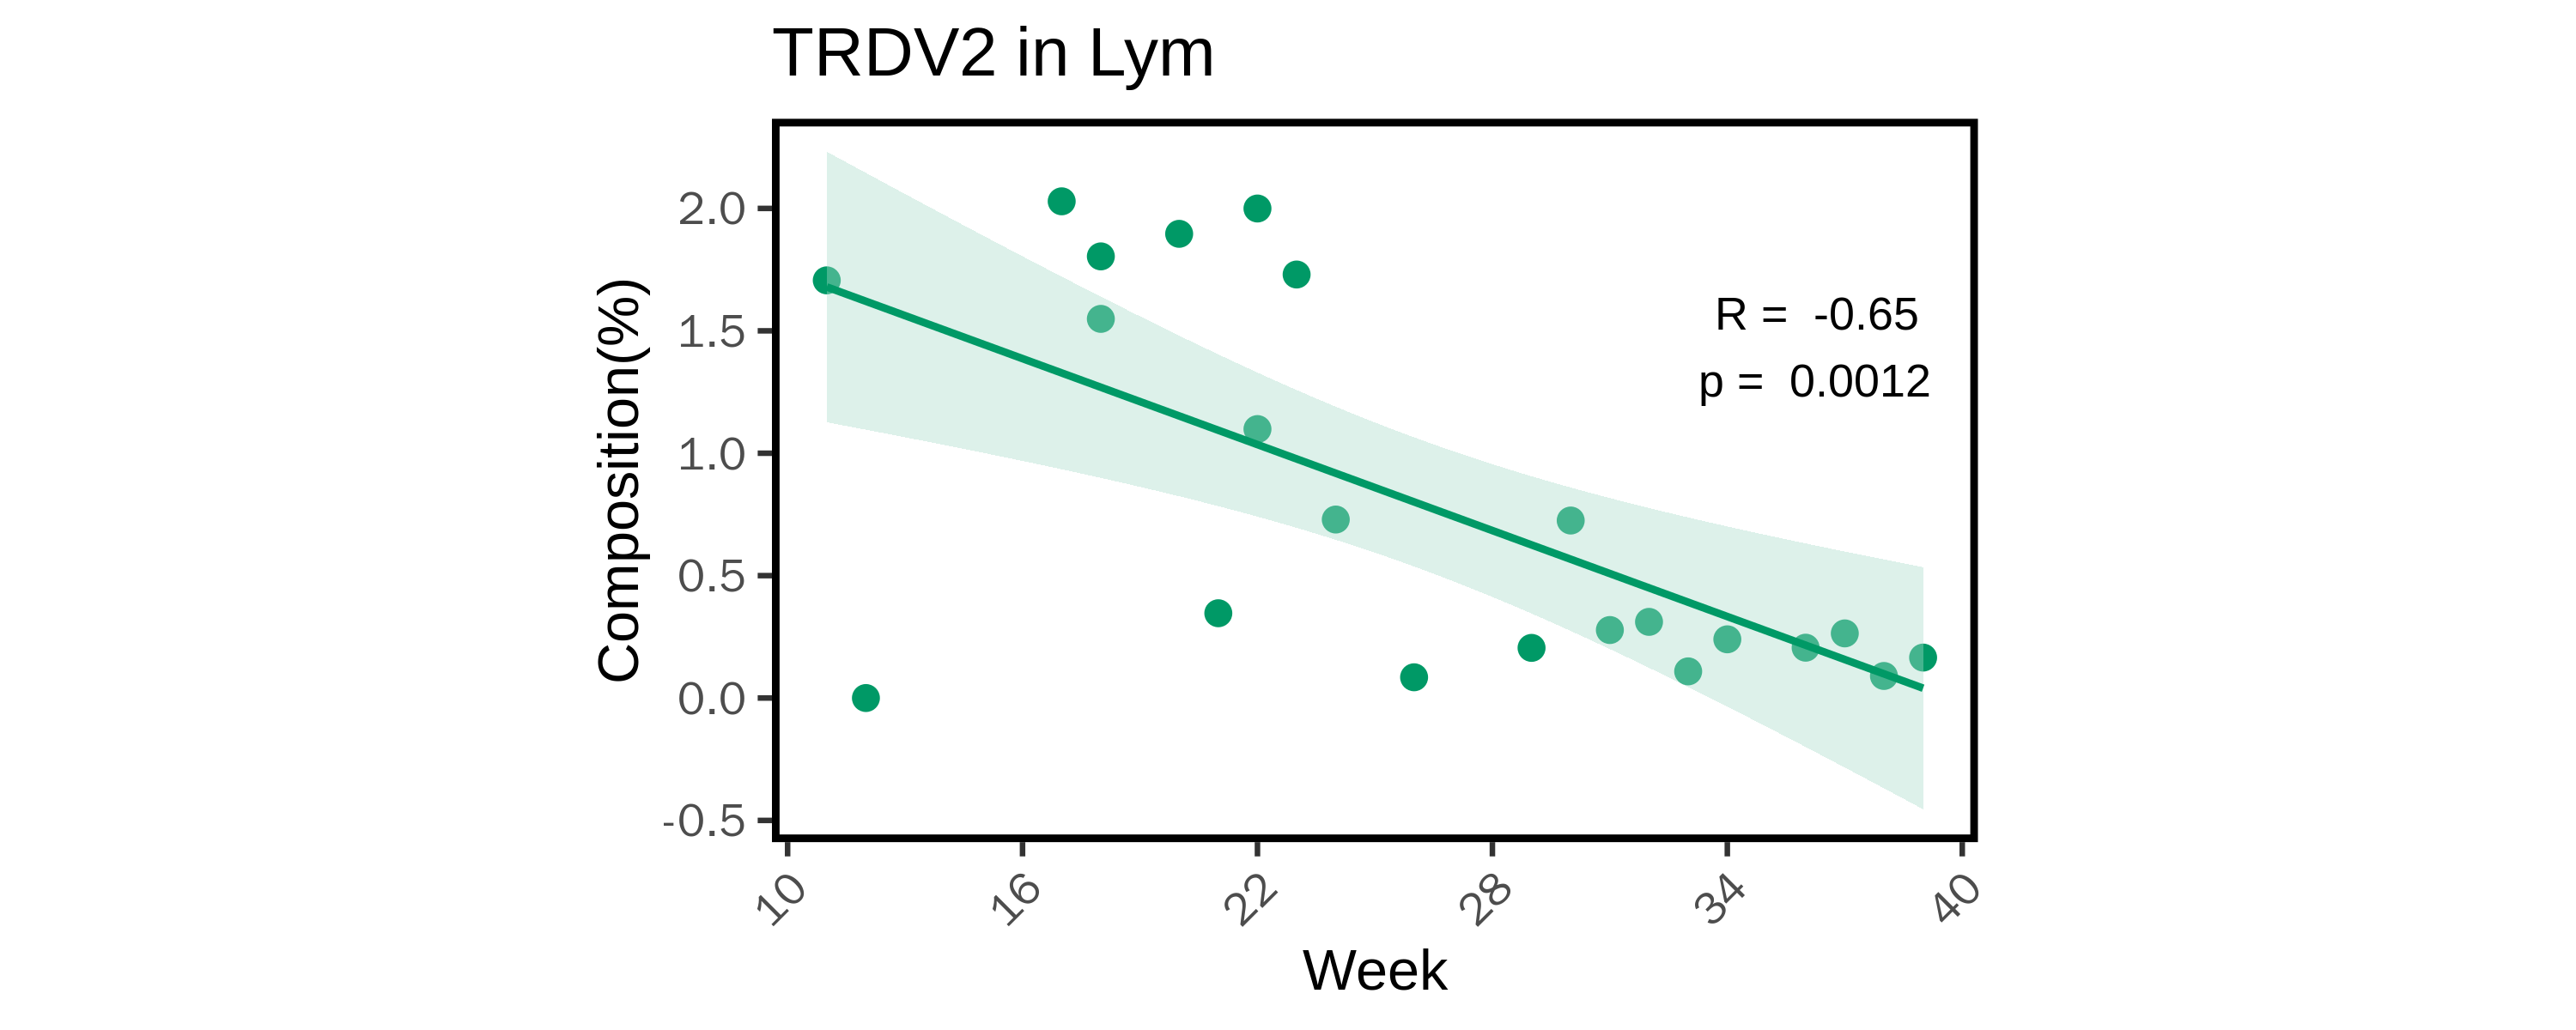

In [52]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_TRDV2obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "TRDV2"
gene2 <- "TRDVone2"

# Call the function with the input data
TRDV2_Lym_plot <- plot_gene_percentage_in_R(PBMCadata_lymcell_TRDV2obs, gene1, gene2,name1="TRDV2")
print(TRDV2_Lym_plot)

In [53]:
pos_genes2 = ['CD3D', 'TRDV1']
neg_genes2=['TRDV2']
column_name2 = "TRDVone1"
cell_type_true = "TRDV1"
cell_type_false = "Others"

CD4_lymcell_TRDV1= assign_cell_type_based_on_genes(NaCD4T2, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
CD4_lymcell_TRDV1obs=CD4_lymcell_TRDV1.obs

`geom_smooth()` using formula = 'y ~ x'


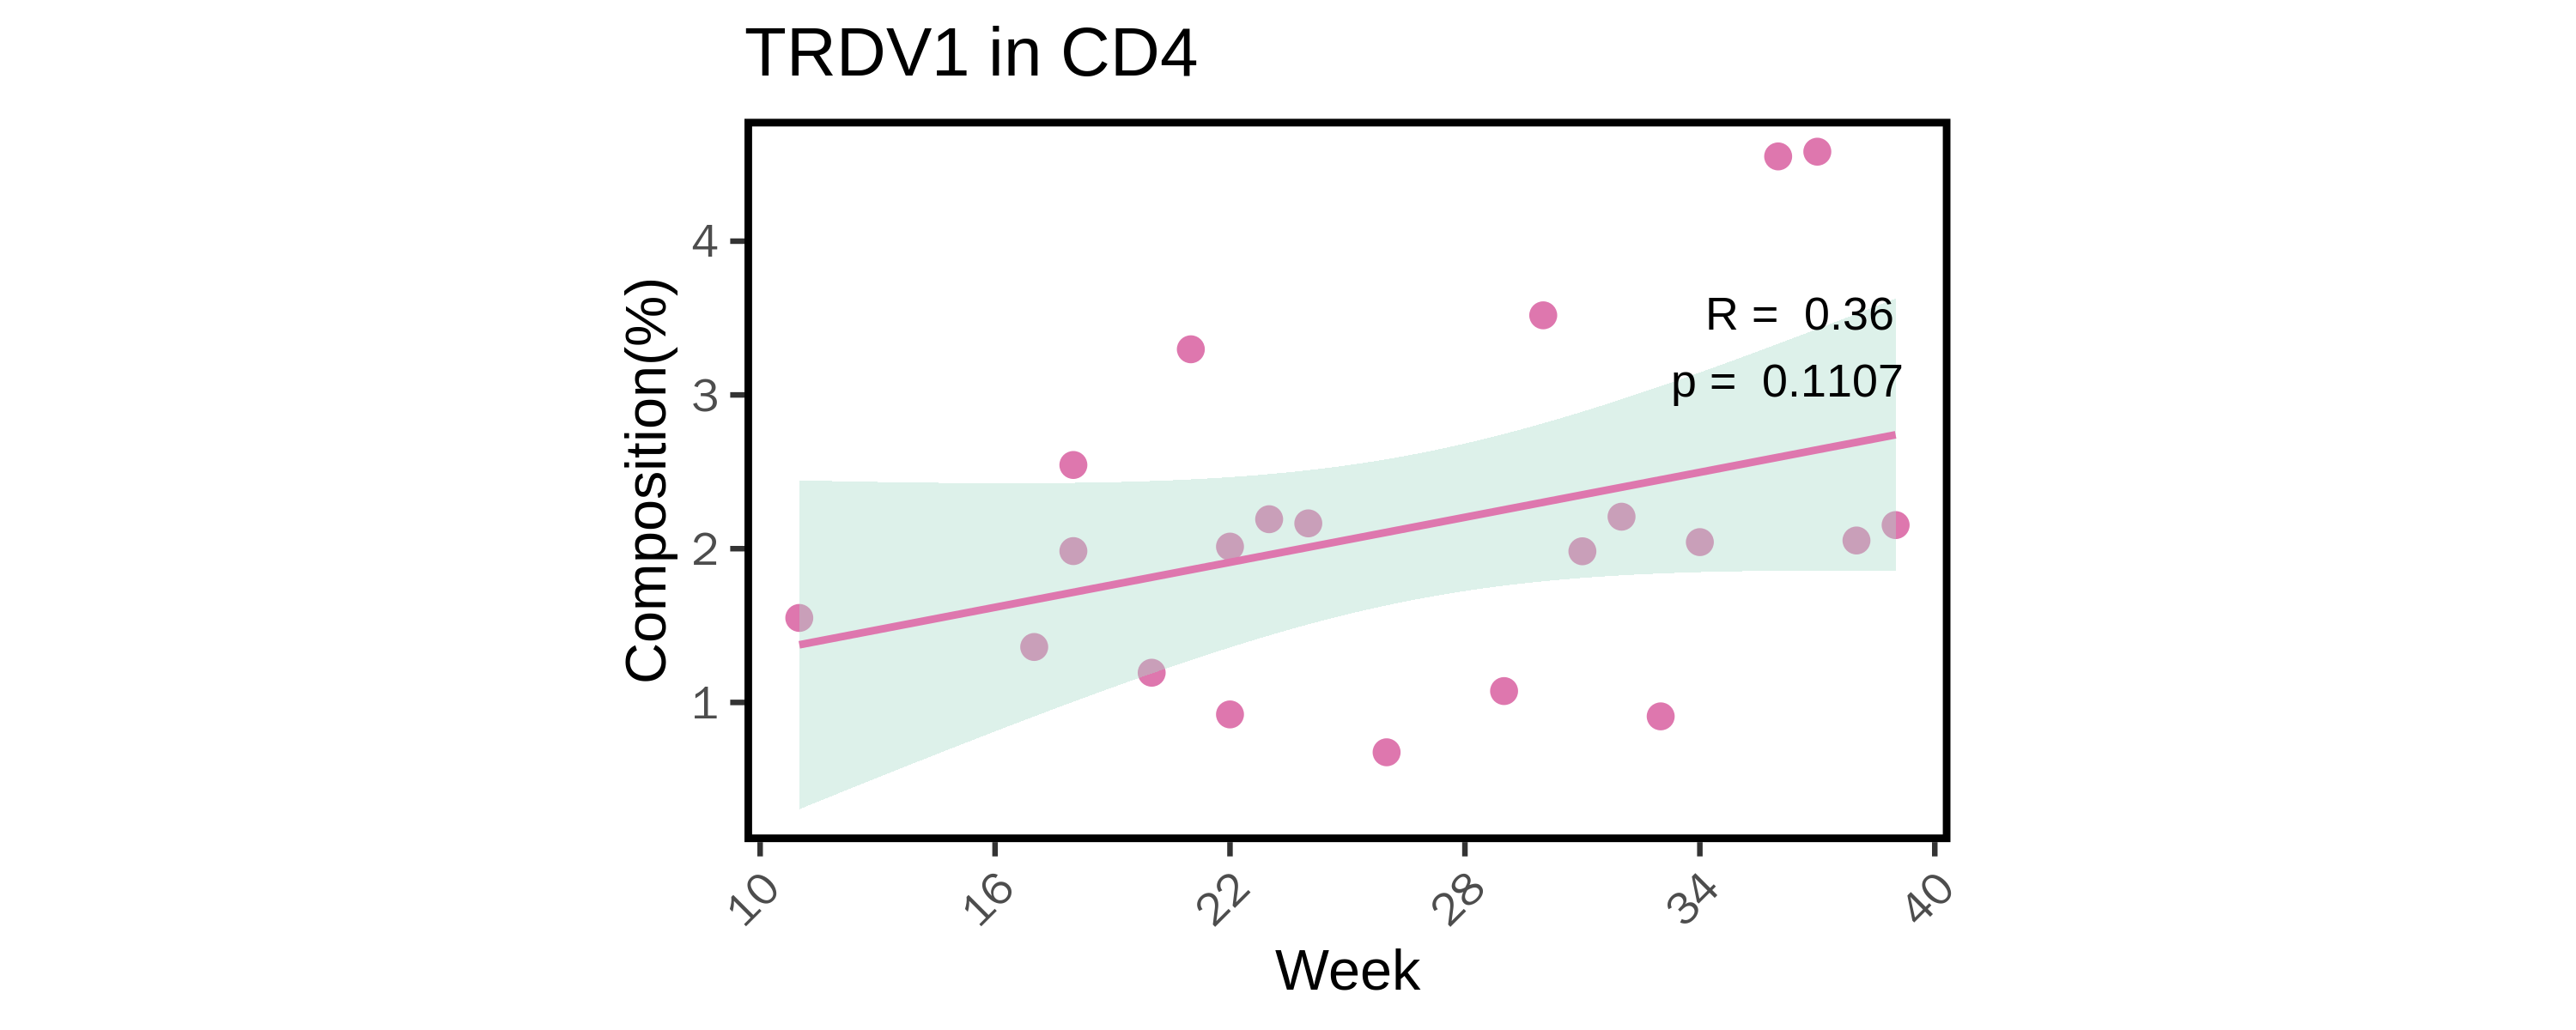

In [54]:
%%R -w 3000 -h 1200 -r 300 -i CD4_lymcell_TRDV1obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in CD4"))
  return(plot)
}

gene1 <- "TRDV1"
gene2 <- "TRDVone1"

# Call the function with the input data
TRDV1_CD4_plot <- plot_gene_percentage_in_R(CD4_lymcell_TRDV1obs, gene1, gene2,name1="TRDV1")
print(TRDV1_CD4_plot)

In [55]:
pos_genes2 = ['CD3D', 'TRDV2']
neg_genes2=['TRDV1']
column_name2 = "TRDVone2"
cell_type_true = "TRDV2"
cell_type_false = "Others"

CD4_lymcell_TRDV2= assign_cell_type_based_on_genes(NaCD4T2, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
CD4_lymcell_TRDV2obs=CD4_lymcell_TRDV2.obs

In [56]:
# CD4_lymcell_TRDV2obs

`geom_smooth()` using formula = 'y ~ x'


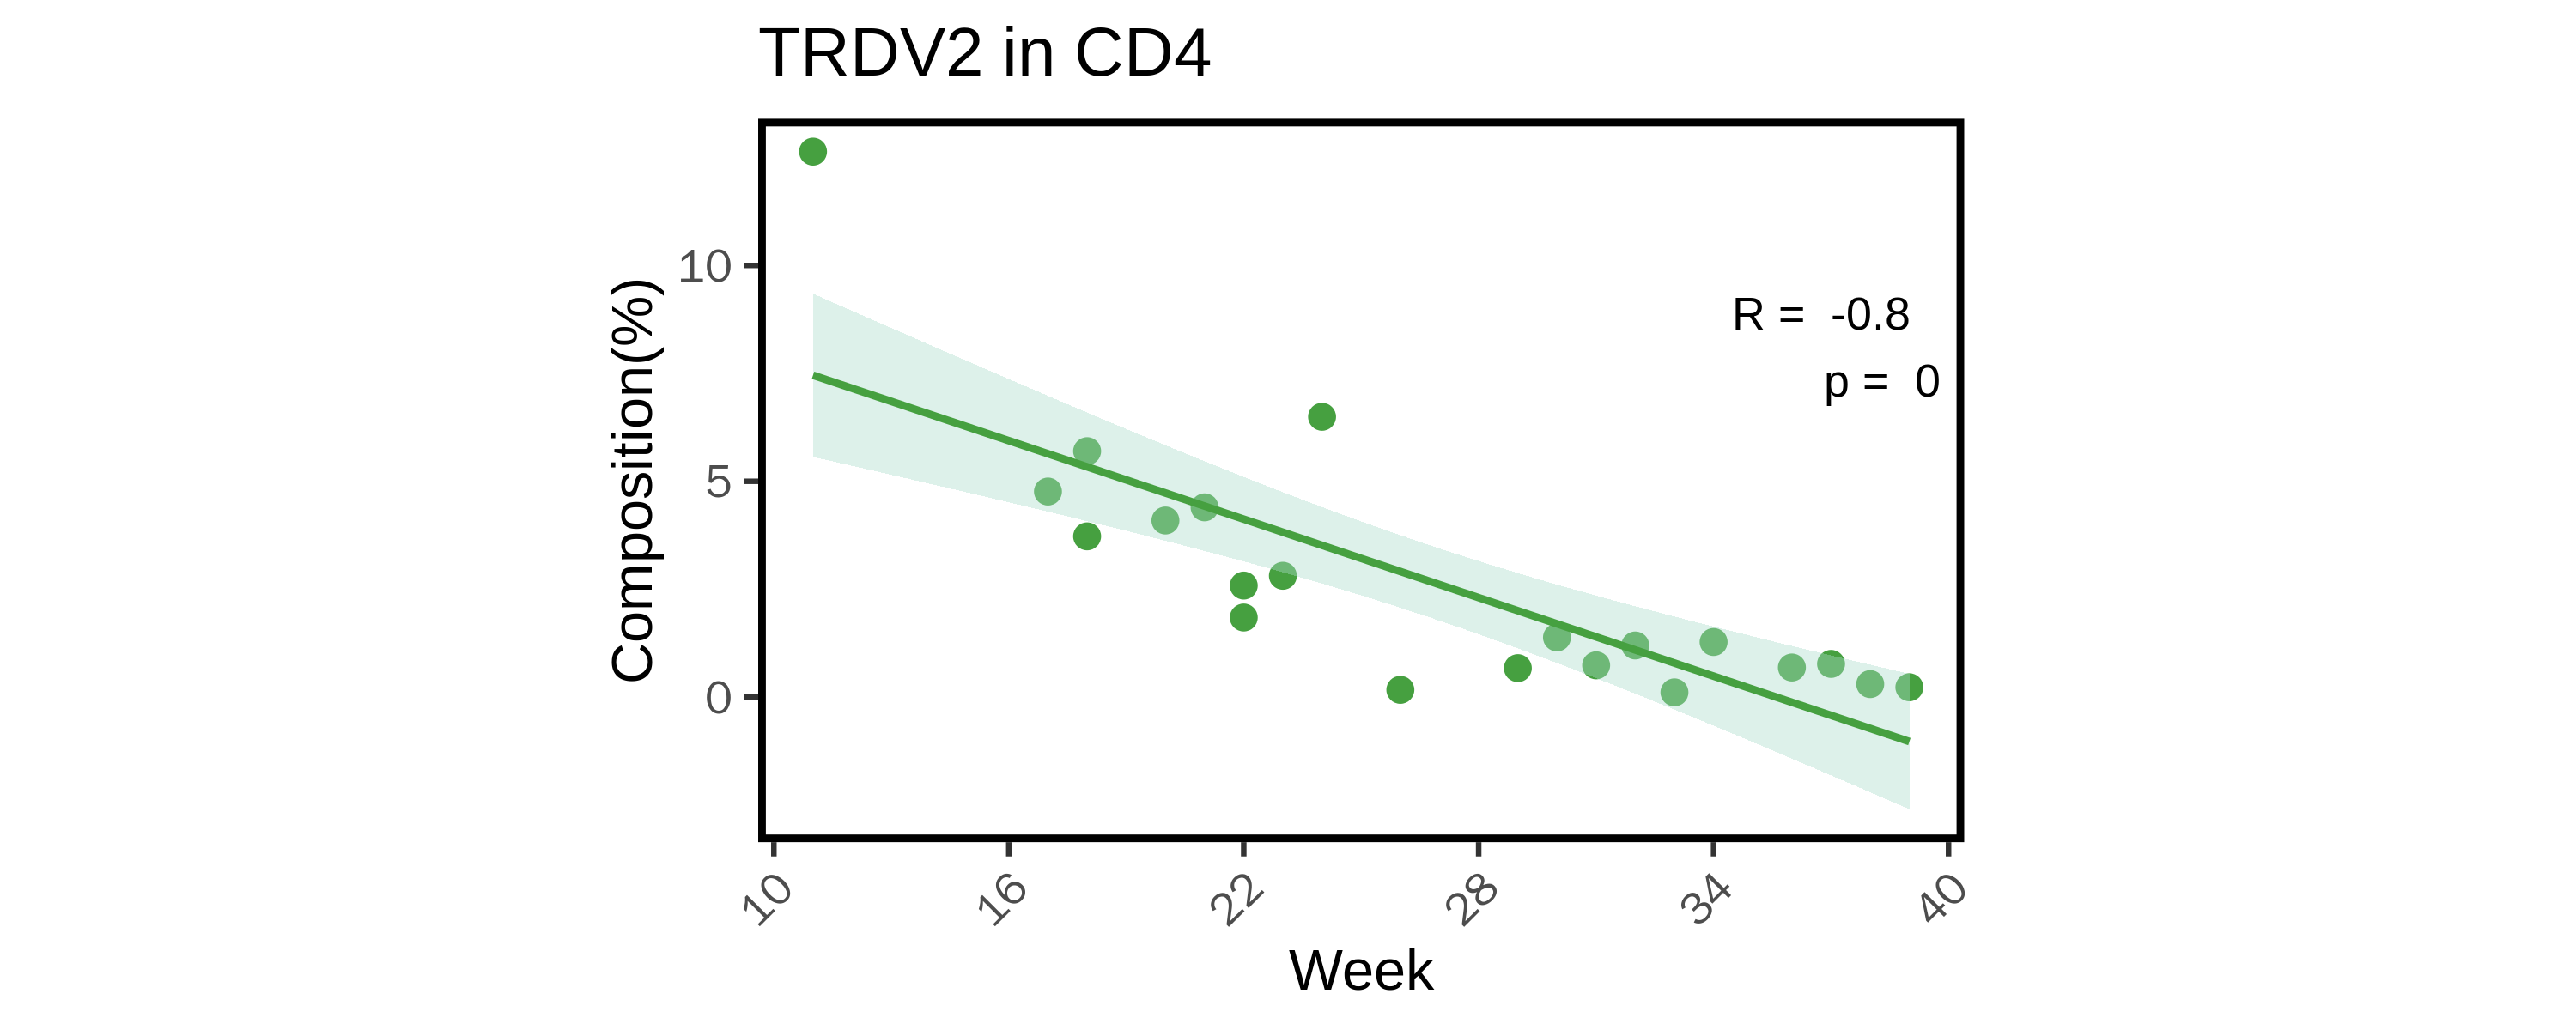

In [57]:
%%R -w 3000 -h 1200 -r 300 -i CD4_lymcell_TRDV2obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in CD4"))
  return(plot)
}

gene1 <- "TRDV2"
gene2 <- "TRDVone2"

# Call the function with the input data
TRDV2_CD4_plot <- plot_gene_percentage_in_R(CD4_lymcell_TRDV2obs, gene1, gene2,name1="TRDV2")
print(TRDV2_CD4_plot)

In [58]:
pos_genes2 = ['CD3D', 'TRDV1','PDCD1']
neg_genes2=['TRDV2']
column_name2 = "TRDVPDCD1"
cell_type_true = "TRDV1_PDCD1"
cell_type_false = "Others"

PBMCadata_lymcell_TRDV1_PDCD1= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_TRDV1_PDCD1obs=PBMCadata_lymcell_TRDV1_PDCD1.obs

`geom_smooth()` using formula = 'y ~ x'


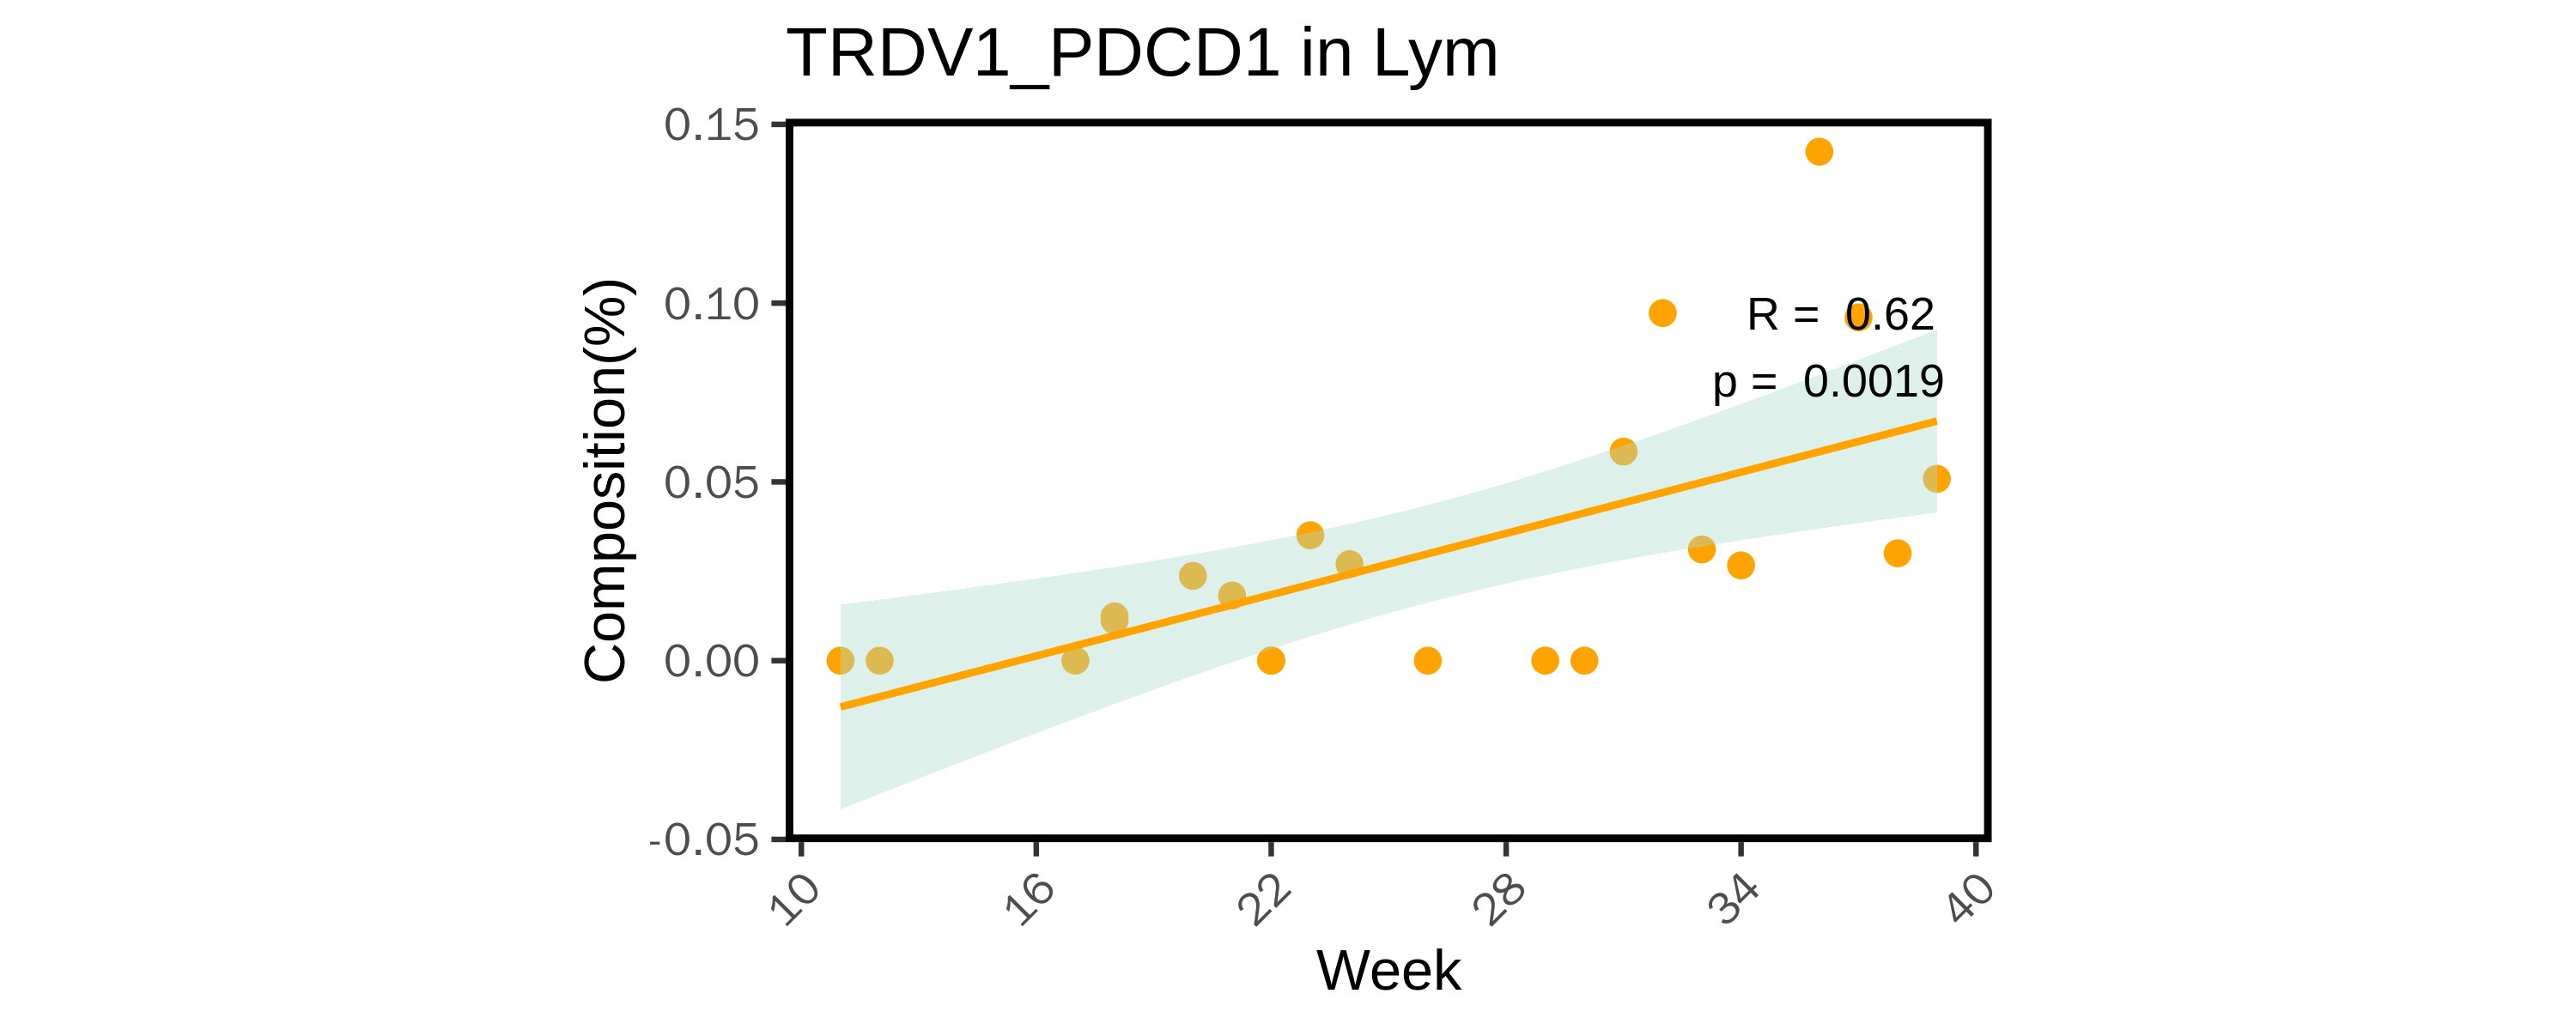

In [59]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_TRDV1_PDCD1obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "TRDV1_PDCD1"
gene2 <- "TRDVPDCD1"

# Call the function with the input data
plotTRDV1_PDCD1_lym <- plot_gene_percentage_in_R(PBMCadata_lymcell_TRDV1_PDCD1obs, gene1, gene2,name1="TRDV1_PDCD1")
print(plotTRDV1_PDCD1_lym)

In [60]:
pos_genes2 = ['CD3D', 'TRDV2','PDCD1']
neg_genes2=['TRDV1']
column_name2 = "TRDV2PDCD1"
cell_type_true = "TRDV2_PDCD1"
cell_type_false = "Others"

PBMCadata_lymcell_TRDV2_PDCD1= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_TRDV2_PDCD1obs=PBMCadata_lymcell_TRDV2_PDCD1.obs

`geom_smooth()` using formula = 'y ~ x'


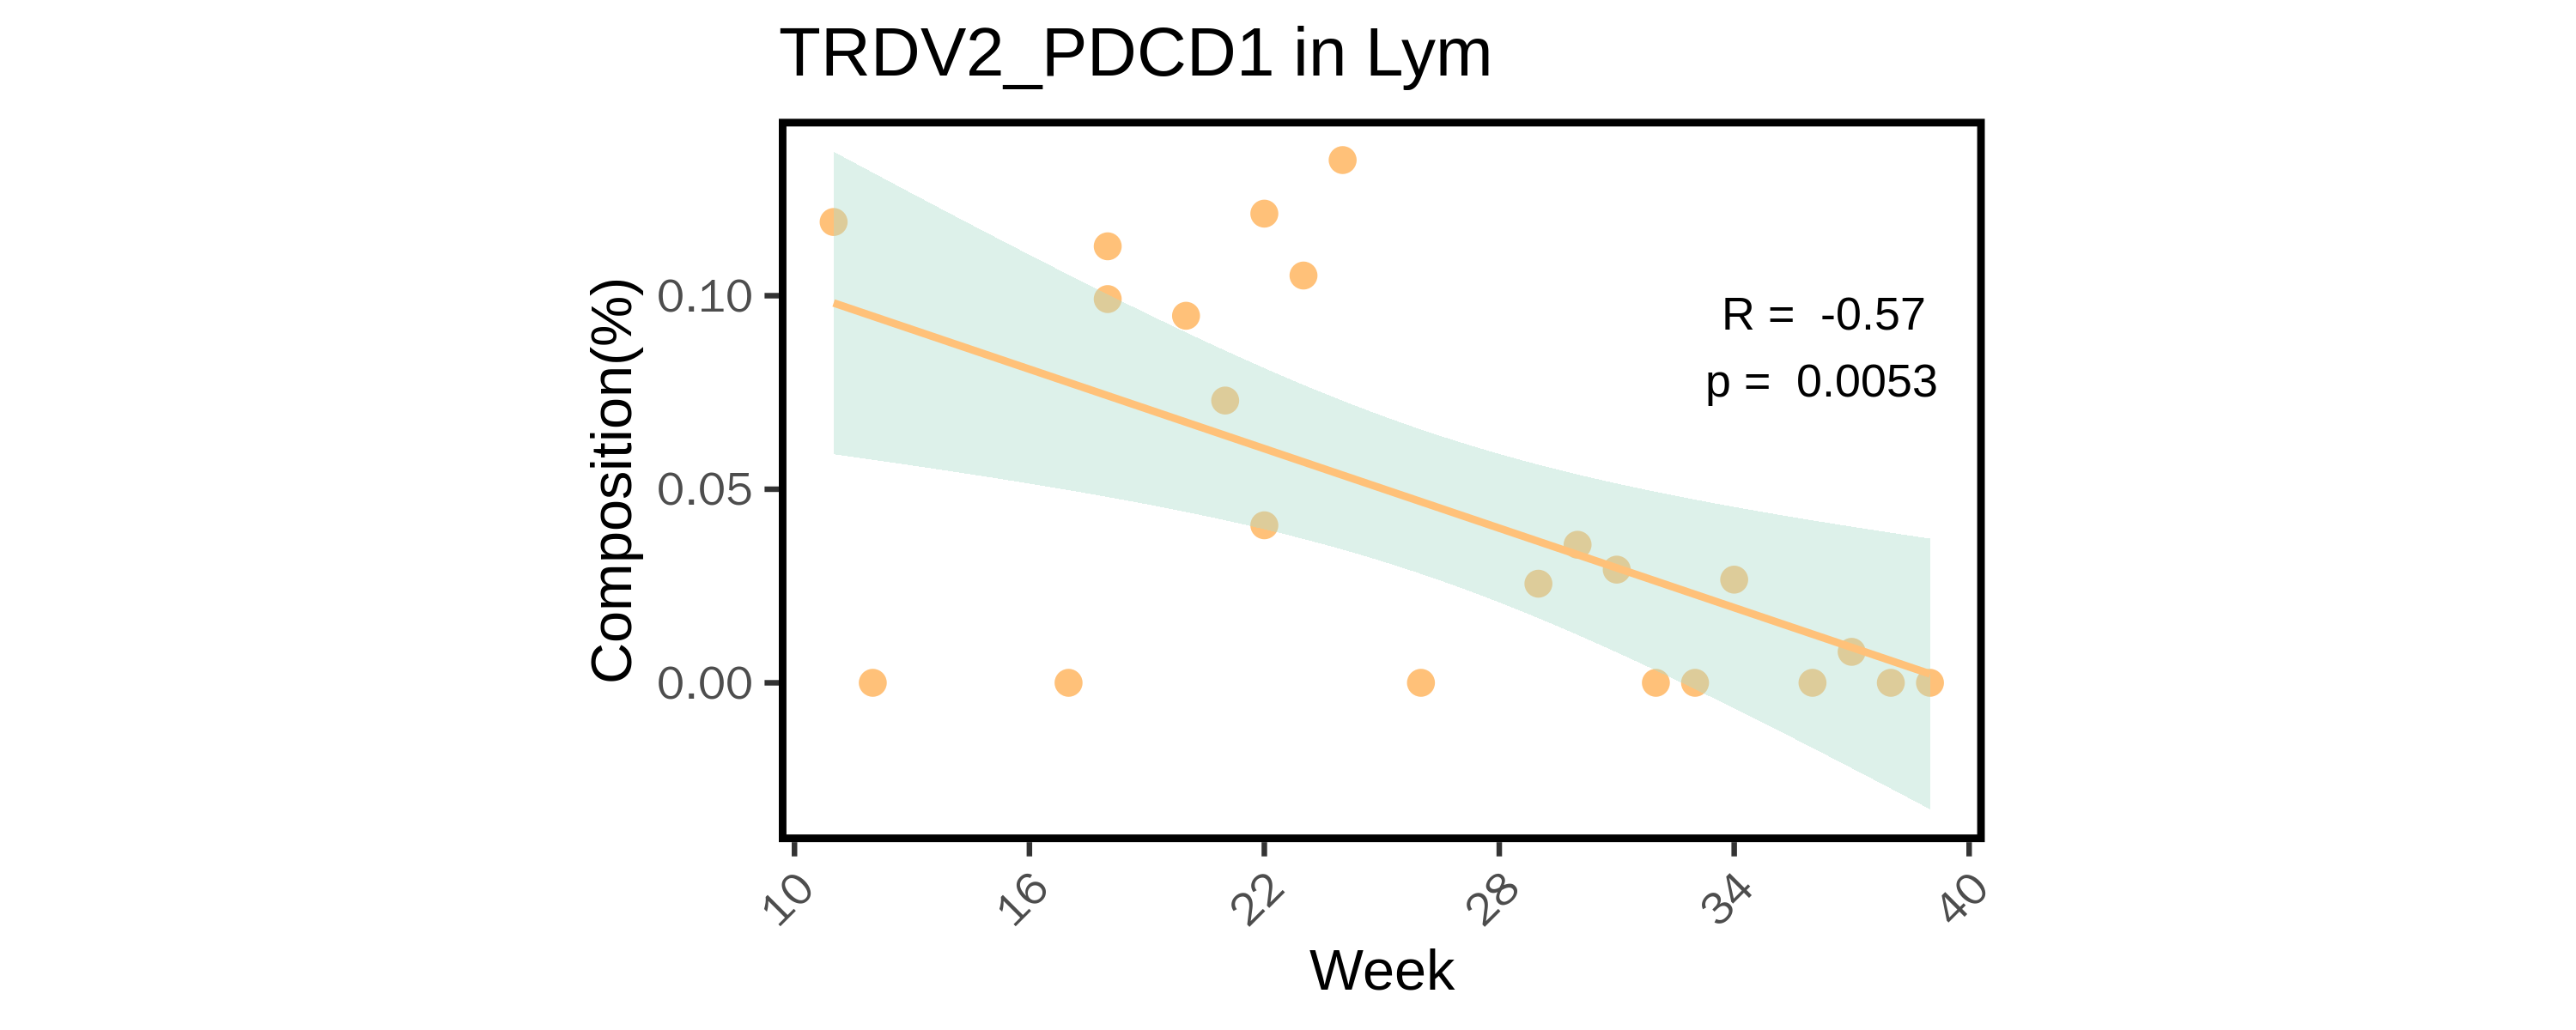

In [61]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_TRDV2_PDCD1obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "TRDV2_PDCD1"
gene2 <- "TRDV2PDCD1"

# Call the function with the input data
plotTRDV2_PDCD1 <- plot_gene_percentage_in_R(PBMCadata_lymcell_TRDV2_PDCD1obs, gene1, gene2,name1="TRDV2_PDCD1")
print(plotTRDV2_PDCD1)

In [62]:
pos_genes2 = ['CD3D', 'TRDV1','KLRK1']
neg_genes2=['TRDV2']
column_name2 = "TRDV1KLRK1"
cell_type_true = "TRDV1_KLRK1"
cell_type_false = "Others"

PBMCadata_lymcell_TRDV1KLRK1= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_TRDV1KLRK1obs=PBMCadata_lymcell_TRDV1KLRK1.obs

`geom_smooth()` using formula = 'y ~ x'


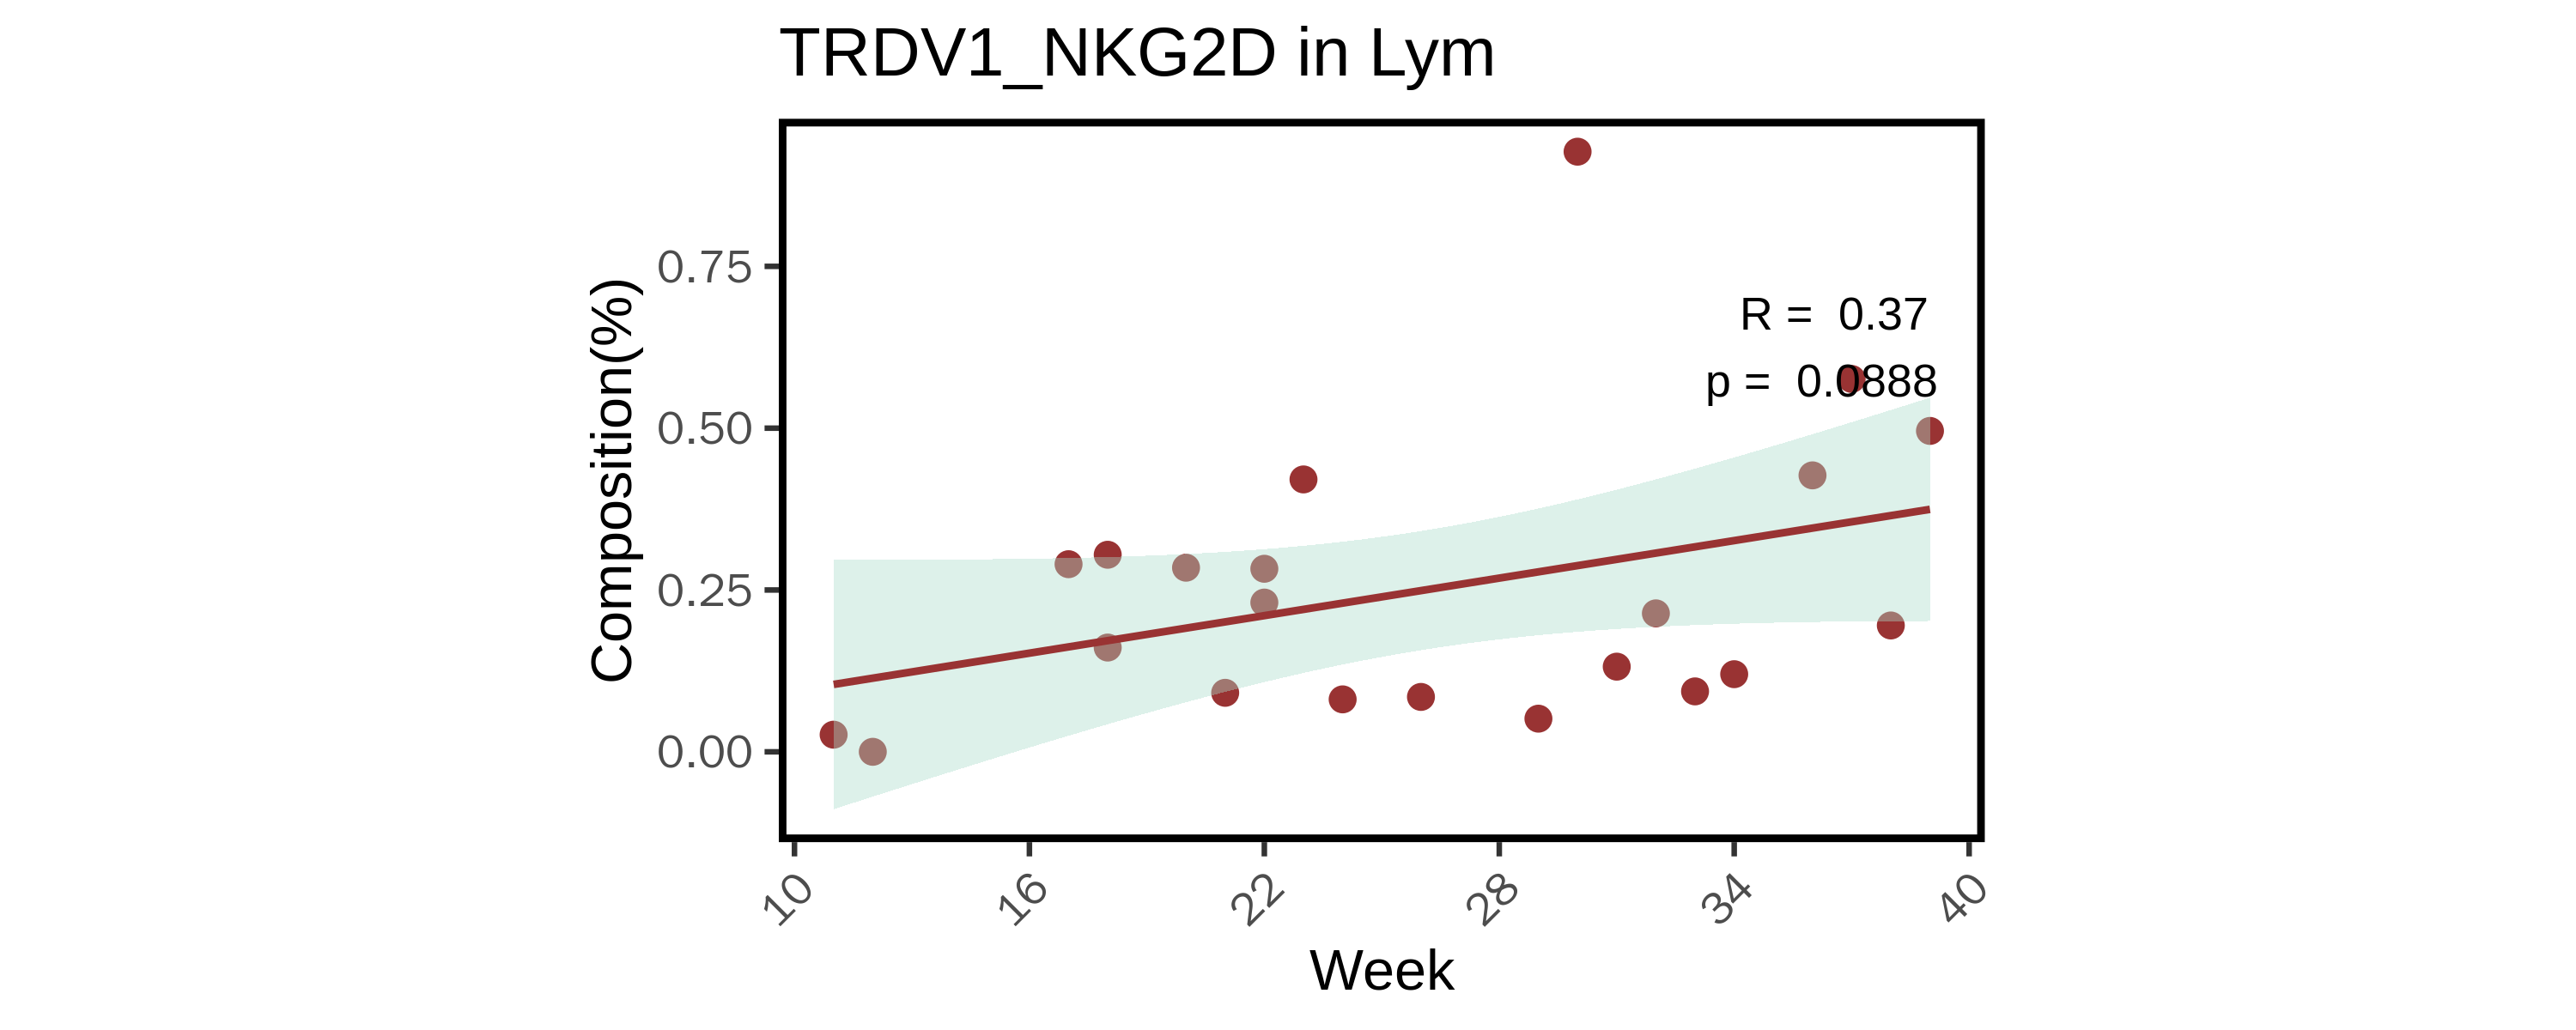

In [63]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_TRDV1KLRK1obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "TRDV1_KLRK1"
gene2 <- "TRDV1KLRK1"

# Call the function with the input data
plotTRDV1_KLRK1 <- plot_gene_percentage_in_R(PBMCadata_lymcell_TRDV1KLRK1obs, gene1, gene2,name1="TRDV1_NKG2D")
print(plotTRDV1_KLRK1)

In [64]:
pos_genes2 = ['CD3E']
# neg_genes2=['TRDV2']
column_name2 = "CD3E"
cell_type_true = "CD3E"
cell_type_false = "Others"

PBMCadata_lymcell_CD3E= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_CD3Eobs=PBMCadata_lymcell_CD3E.obs

`geom_smooth()` using formula = 'y ~ x'


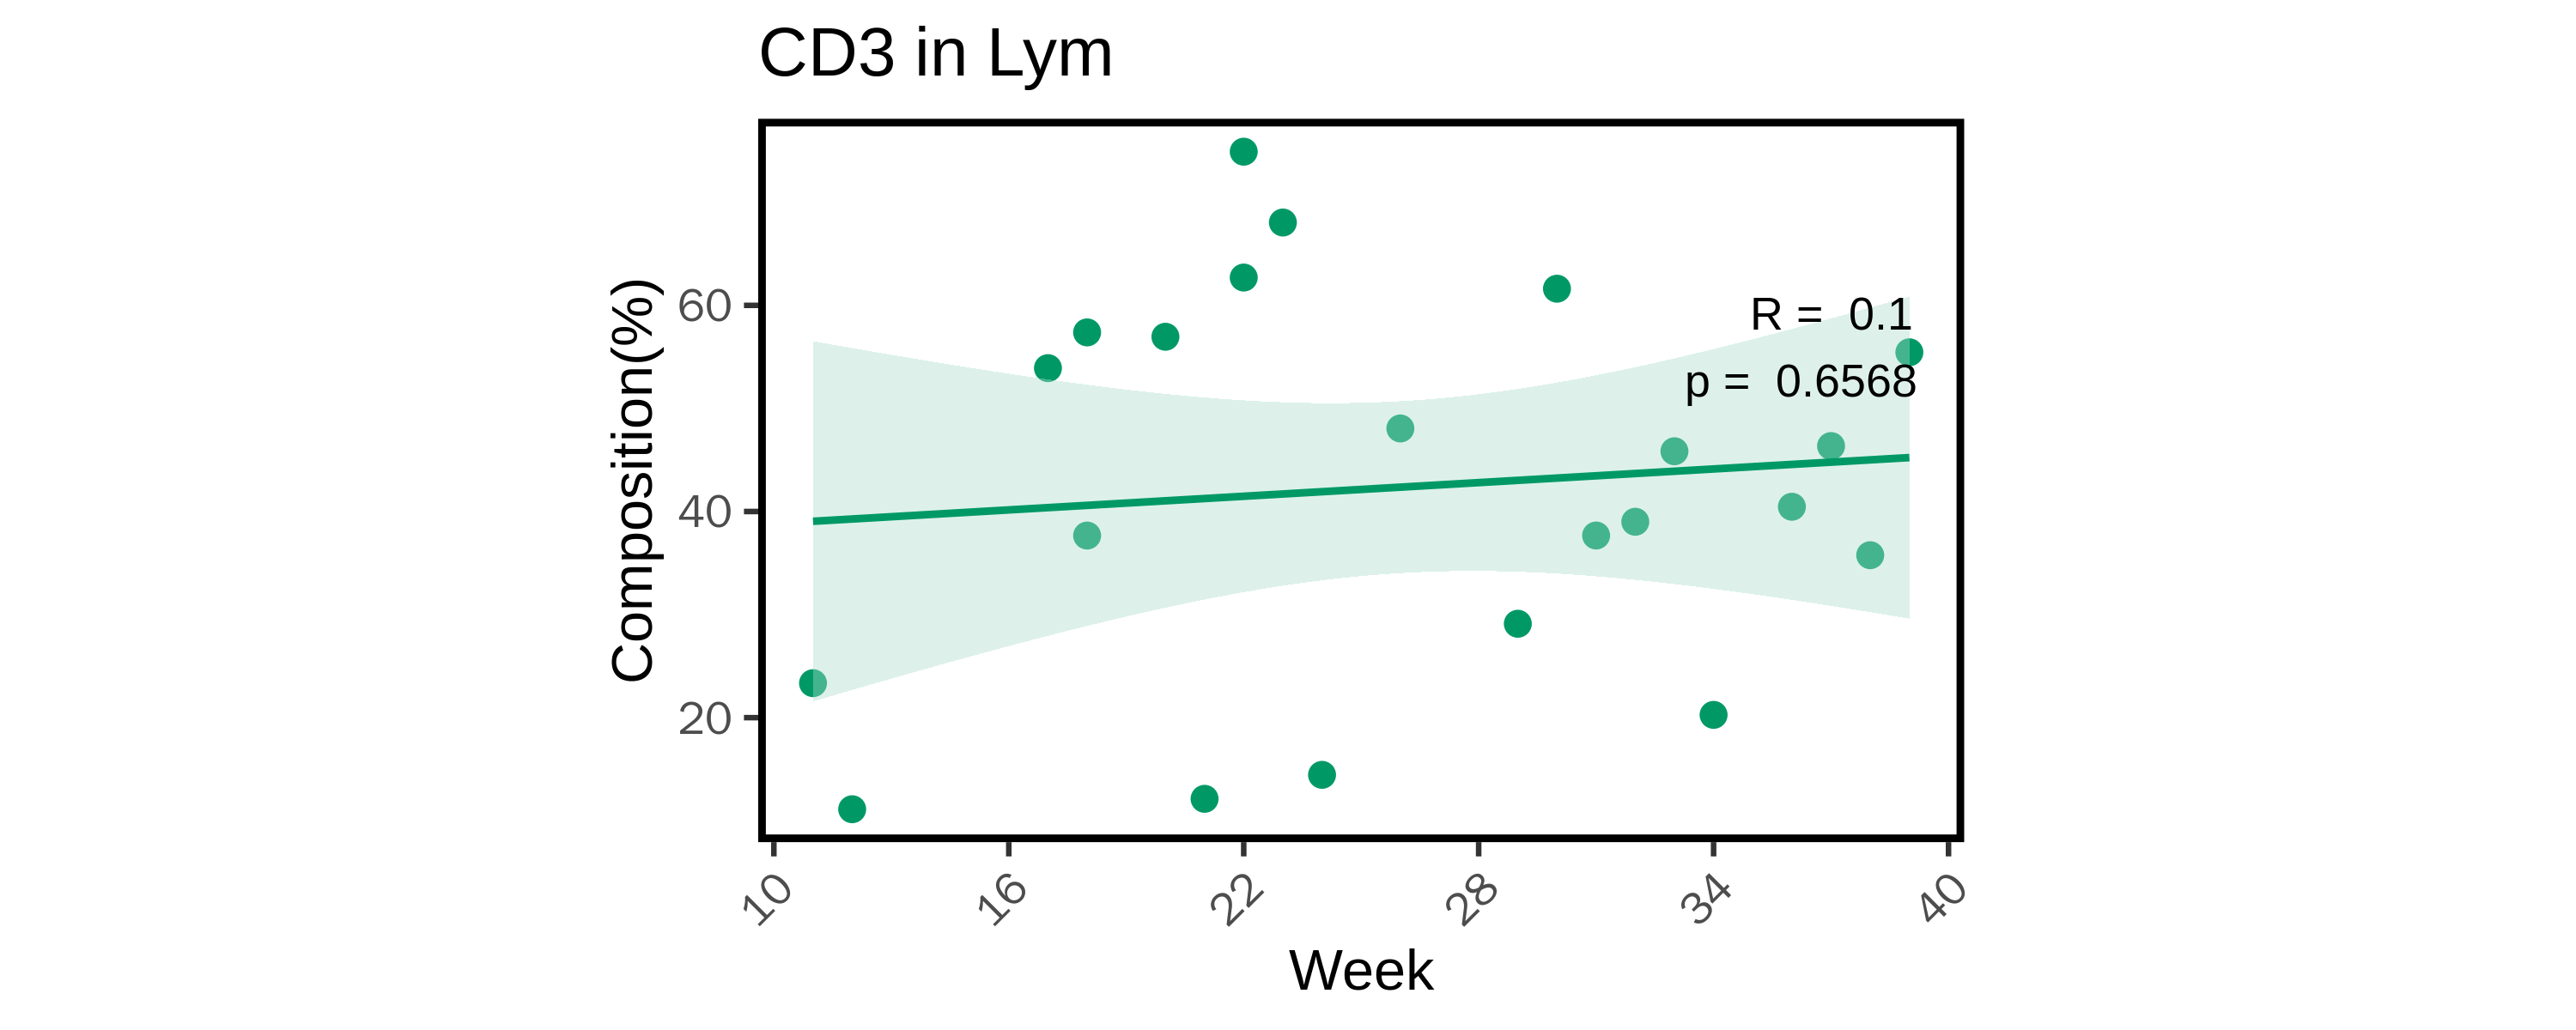

In [65]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_CD3Eobs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "CD3E"
gene2 <- "CD3E"

# Call the function with the input data
plotCD3T <- plot_gene_percentage_in_R(PBMCadata_lymcell_CD3Eobs, gene1, gene2,name1="CD3")
print(plotCD3T)

In [66]:
pos_genes2 = ['CD3D','CD4']
neg_genes2=['CD8A','CD8B','CXCR5']

cell_type_true = "Th"
column_name2 = "Thdata"
cell_type_false = "Others"

PBMCadata_lymcell_data= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_obs2=PBMCadata_lymcell_data.obs

In [67]:
pos_genes2 = ['CD3D','CD4']
neg_genes2=['CD8A','CD8B','CXCR5']

cell_type_true = "Th"
column_name2 = "Thdata"
cell_type_false = "Others"

PBMCadata_lymcell_data= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_obs2=PBMCadata_lymcell_data.obs

`geom_smooth()` using formula = 'y ~ x'


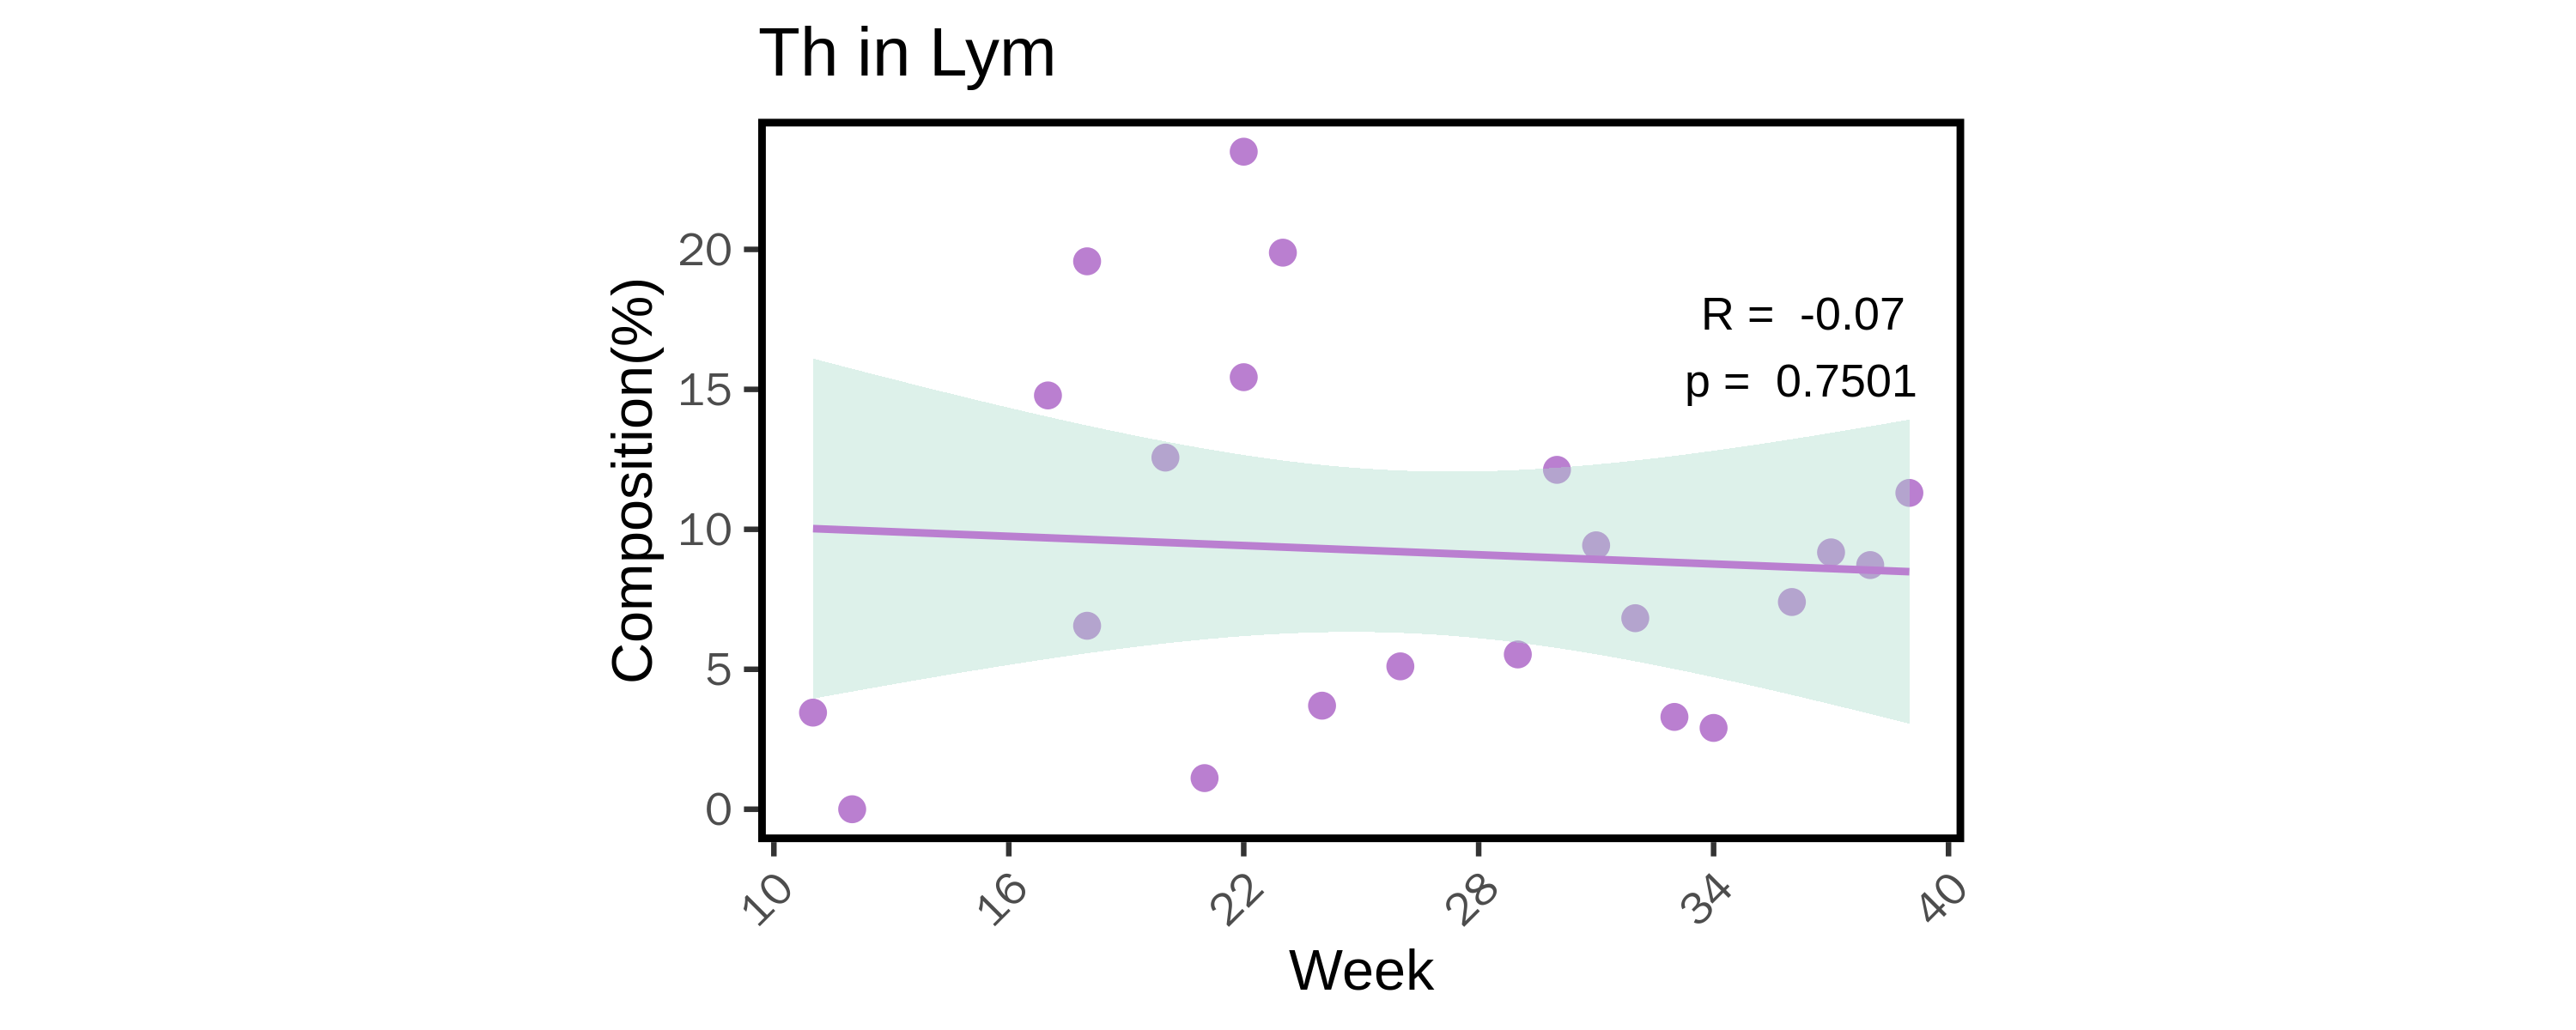

In [68]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_obs2
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "Th"
gene2 <- "Thdata"

# Call the function with the input data
plotTh <- plot_gene_percentage_in_R(PBMCadata_lymcell_obs2, gene1, gene2,name1="Th")
print(plotTh)

In [69]:
pos_genes2 = ['CD3D','CD3E','CD4']
neg_genes2=['CD8A','CD8B']

cell_type_true = "CD4"
column_name2 = "CellCD4"
cell_type_false = "Others"

PBMCadata_lymcell_data= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_obs2=PBMCadata_lymcell_data.obs

In [70]:
PBMCadata_lymcellcellCD4=PBMCadata_lymcell.obs

`geom_smooth()` using formula = 'y ~ x'


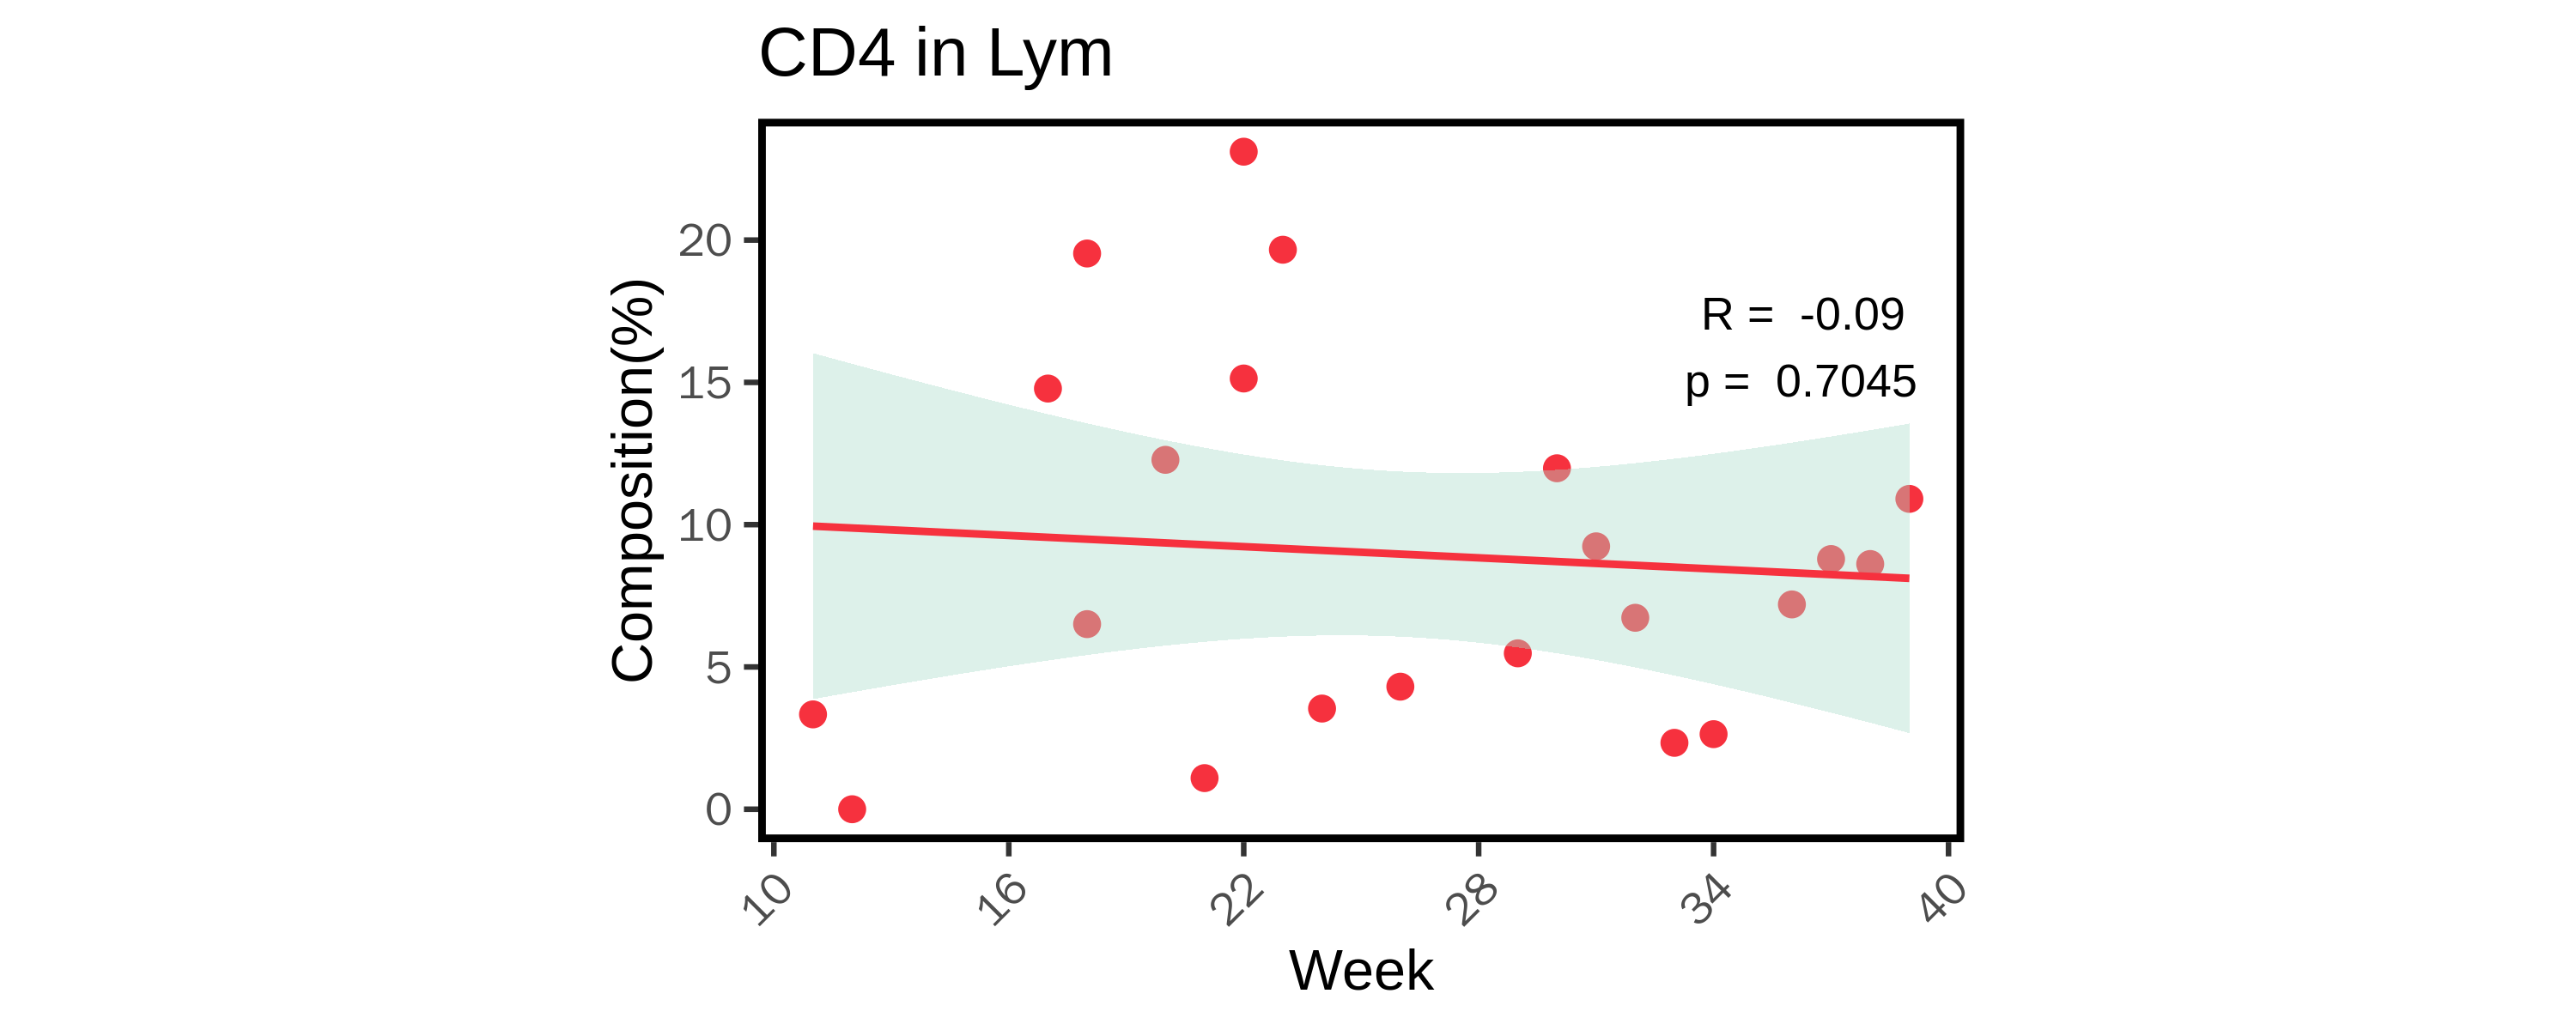

In [71]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcellcellCD4
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "CD4"
gene2 <- "CellCD4"

# Call the function with the input data
plotCD4T <- plot_gene_percentage_in_R( PBMCadata_lymcellcellCD4, gene1, gene2,name1="CD4")
print(plotCD4T)

In [72]:
pos_genes2 = ['CD3D','CD3E','CD8A','CD8B']
neg_genes2=['CD4']

cell_type_true = "CD8"
column_name2 = "CellCD8"
cell_type_false = "Others"

PBMCadata_lymcell_CD8= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_CD82=PBMCadata_lymcell_CD8.obs

`geom_smooth()` using formula = 'y ~ x'


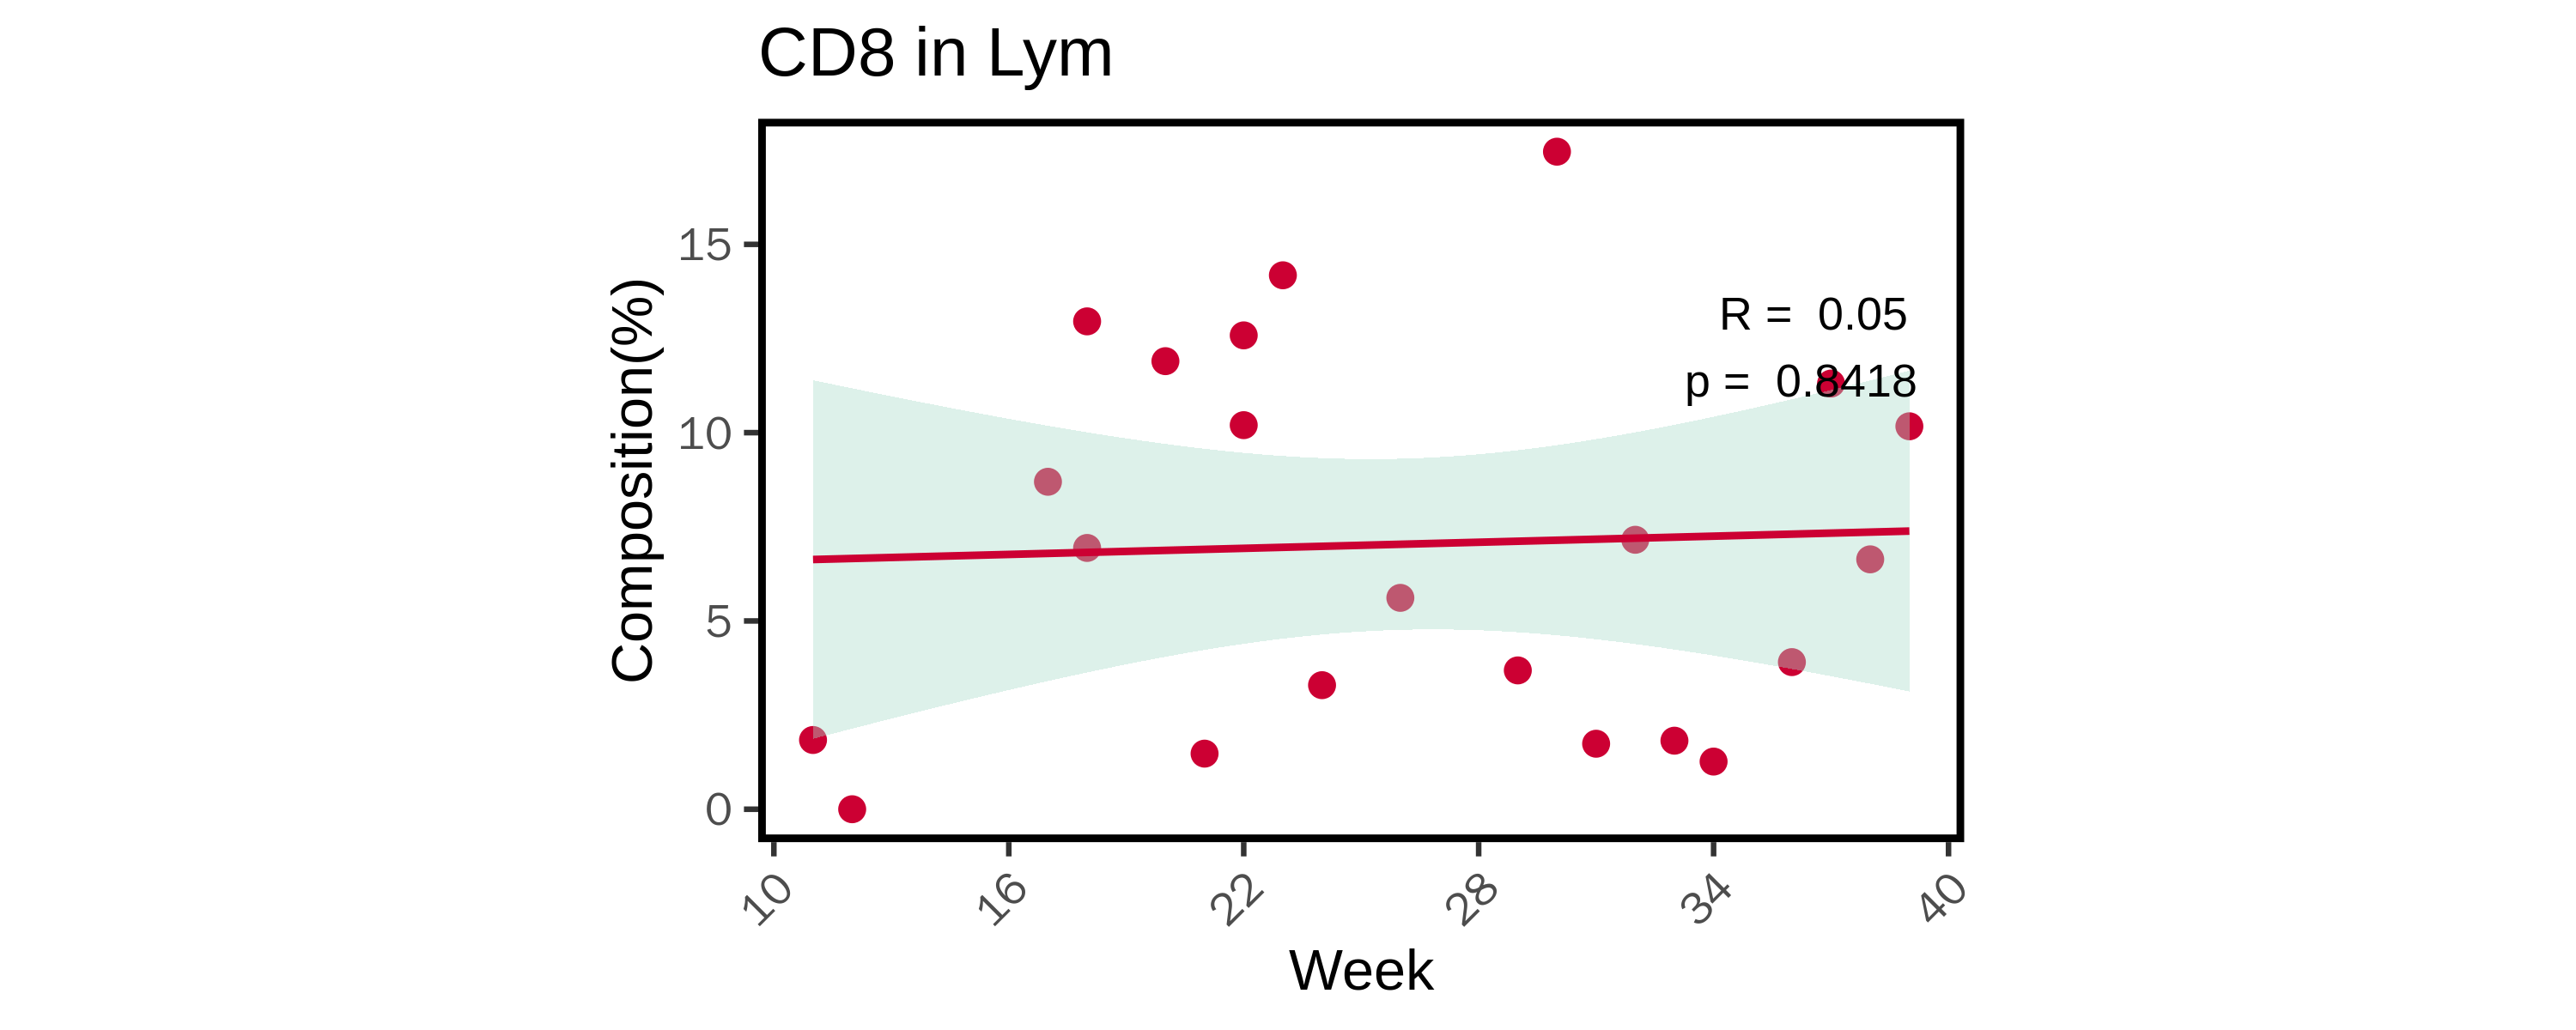

In [73]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_CD82
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "CD8"
gene2 <- "CellCD8"

# Call the function with the input data
plotCD8Tlym <- plot_gene_percentage_in_R( PBMCadata_lymcell_CD82, gene1, gene2,name1="CD8")
print(plotCD8Tlym)

In [74]:
mkdir /home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Smallpercentage

mkdir: 无法创建目录"/home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Smallpercentage": 文件已存在


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


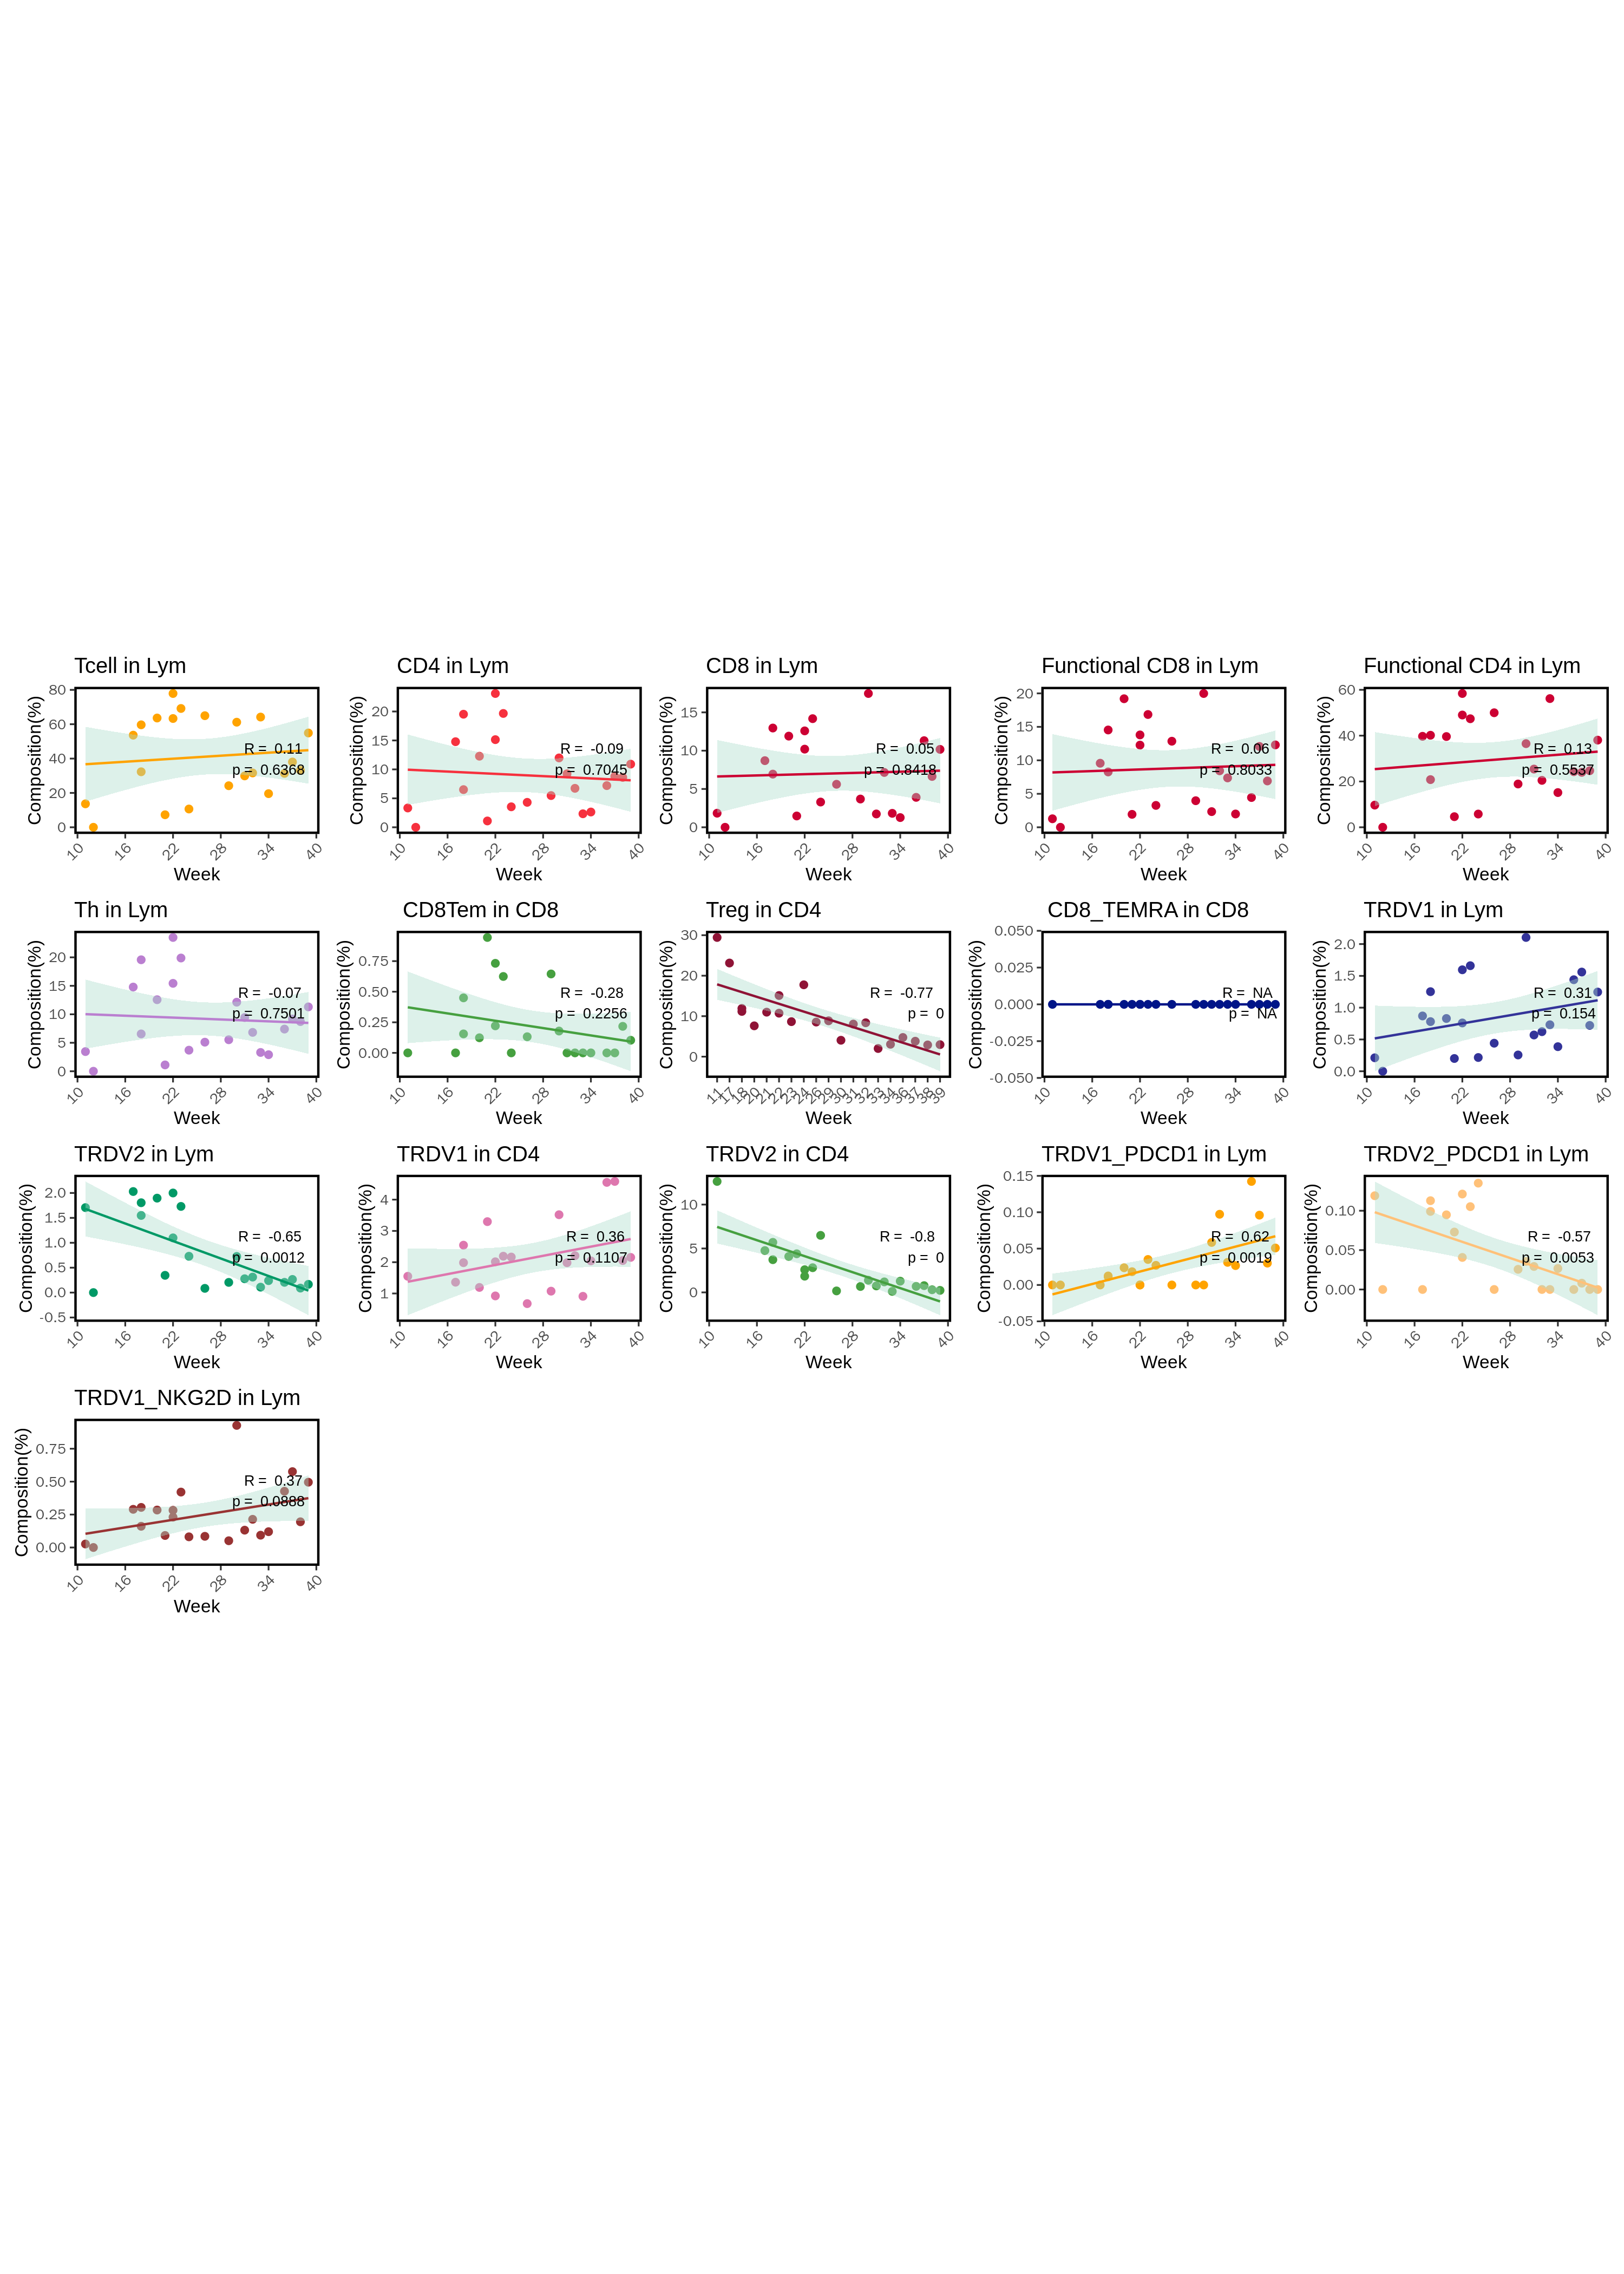

In [75]:
%%R -w 3000 -h 4200 -r 150
library(patchwork)
plot_list<-list(plot_Tcell,plotCD4T ,plotCD8Tlym,plot_TCD8,plot_FunctionalCD4T ,plotTh,
                plot_Memcell,plot_Treg,plot_CD8_TEMRA,TRDV1_Lym_plot,
                TRDV2_Lym_plot,TRDV1_CD4_plot,TRDV2_CD4_plot,
               plotTRDV1_PDCD1_lym,plotTRDV2_PDCD1,plotTRDV1_KLRK1 )
Combined_plot <- wrap_plots(plotlist = plot_list, ncol = 5)

ggsave(filename ="/home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Smallpercentage/SmallpercentageCombined3.pdf",
         plot = Combined_plot , width = 14, height = 20)
Combined_plot 

In [76]:
Bcell_type_genes = {
    "gene": ["CD19", "MS4A1", "CD24", "CD40", "FCER2","CXCR5"],
    
}

In [77]:
PBMCadata_lymcell.obs.Last_cell_type.unique()

['CXCR5- Naïve B', 'Treg', 'CXCR5+ Naïve B', 'Th17like_INNATE_T', 'Naïve CD4 T', ..., 'Macrophages', 'Small pre-B', 'Cycling Treg', 'DP(P) T', 'DN(Q) T']
Length: 33
Categories (33, object): ['CD14+PPBP+ Monocytes', 'CD56highCD16low NK', 'CX3CR1+ NK', 'CXCR5+ Naïve B', ..., 'Th17like_INNATE_T', 'Treg', 'abT(entry)', 'pDC']

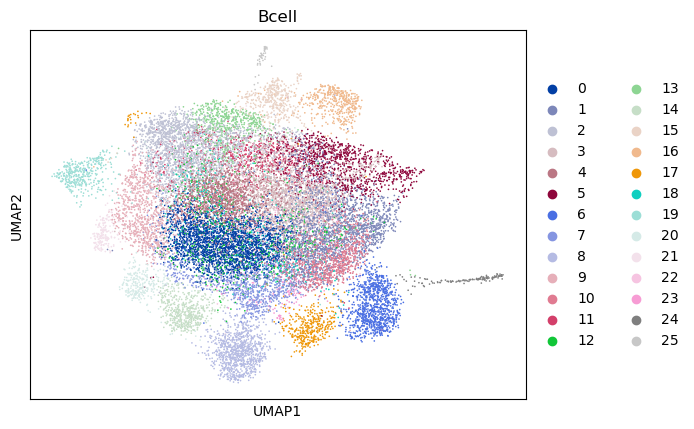

In [78]:
# Badata_lymcell=PBMCadata_lymcell[PBMCadata_lymcell.obs.Last_cell_type.isin('')]
Badata2=Multi_create_sub2(PBMCadata_lymcell,['CXCR5+ Naïve B','CXCR5- Naïve B'],name="Bcell",res=1,col='Last_cell_type')

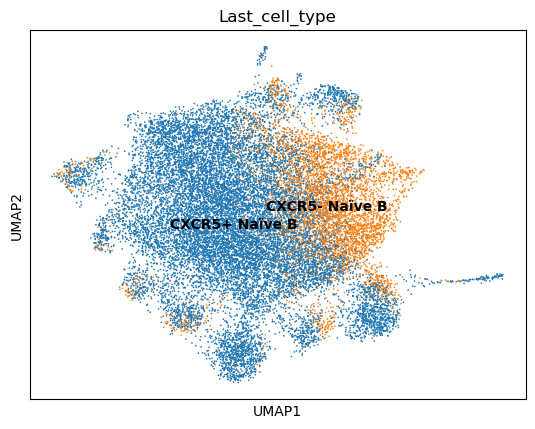

In [79]:
sc.pl.umap(Badata2,color='Last_cell_type',legend_loc='on data')

In [80]:
Badata2=Badata2.raw.to_adata()

In [81]:

# custom_fontsize = 16


# custom_rc = {
#     'font.size': custom_fontsize,
#     'axes.titlesize': custom_fontsize,
#     'axes.labelsize': custom_fontsize,
#     'xtick.labelsize': custom_fontsize,
#     'ytick.labelsize': custom_fontsize,
# }


# with plt.rc_context(rc=custom_rc):

#     sc.pl.dotplot(Badata2  ,Bcell_type_genes,'Bcell',dot_max=0.5,standard_scale='var')

In [82]:
pos_genes2 = ["CD19", "MS4A1"]
neg_genes2=['CXCR5']

cell_type_true = "CXCR5gene"
column_name2 = "CXCR5cluster"
cell_type_false = "Others"

PBMCadata_Bcell= assign_cell_type_based_on_genes(Badata2, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)

PBMCadata_Bcell2=PBMCadata_Bcell.obs
PBMCadata_Bcell2

Name  doublet_scores  predicted_doublets  \
Cellname                                                            
Z48_AAACCTGAGATAGGAG-1    Z48        0.065421               False   
Z48_AAATGCCCATATACGC-1    Z48        0.602210               False   
Z48_AACTGGTGTCCATGAT-1    Z48        0.046778               False   
Z48_ACAGCTACACATGGGA-1    Z48        0.028446               False   
Z48_ACATACGCACTCTGTC-1    Z48        0.080139               False   
...                       ...             ...                 ...   
Z123_TTTGCGCTCTTAGAGC-1  Z123        0.046243               False   
Z123_TTTGTCAAGTACACCT-1  Z123        0.012808               False   
Z123_TTTGTCAGTTTGTTGG-1  Z123        0.018881               False   
Z123_TTTGTCATCCTAGAAC-1  Z123        0.010114               False   
Z123_TTTGTCATCTCCCTGA-1  Z123        0.018881               False   

                        predicted_labels over_clustering majority_voting  \
Cellname                                                                   
Z48_AAACCTGAGATAGGAG-1     Naive B cells             107   Naive B cells   
Z48_AAATGCCCATATACGC-1     Naive B cells             170   Naive B cells   
Z48_AACTGGTGTCCATGAT-1           B cells             262   Naive B cells   
Z48_ACAGCTACACATGGGA-1     Naive B cells              26   Naive B cells   
Z48_ACATACGCACTCTGTC-1     Naive B cells              96   Naive B cells   
...                                  ...             ...             ...   
Z123_TTTGCGCTCTTAGAGC-1    Naive B cells              36   Naive B cells   
Z123_TTTGTCAAGTACACCT-1    Naive B cells              26   Naive B cells   
Z123_TTTGTCAGTTTGTTGG-1    Naive B cells             403   Naive B cells   
Z123_TTTGTCATCCTAGAAC-1          B cells              94   Naive B cells   
Z123_TTTGTCATCTCCCTGA-1    Naive B cells             144   Naive B cells   

                         conf_score                 Cellname AdjustedID  \
Cellname                                                                  
Z48_AAACCTGAGATAGGAG-1     0.868831   Z48_AAACCTGAGATAGGAG-1   B17.4_P3   
Z48_AAATGCCCATATACGC-1     0.096960   Z48_AAATGCCCATATACGC-1   B17.4_P3   
Z48_AACTGGTGTCCATGAT-1     0.870337   Z48_AACTGGTGTCCATGAT-1   B17.4_P3   
Z48_ACAGCTACACATGGGA-1     0.802366   Z48_ACAGCTACACATGGGA-1   B17.4_P3   
Z48_ACATACGCACTCTGTC-1     0.963282   Z48_ACATACGCACTCTGTC-1   B17.4_P3   
...                             ...                      ...        ...   
Z123_TTTGCGCTCTTAGAGC-1    0.670436  Z123_TTTGCGCTCTTAGAGC-1  B22.4_P23   
Z123_TTTGTCAAGTACACCT-1    0.039240  Z123_TTTGTCAAGTACACCT-1  B22.4_P23   
Z123_TTTGTCAGTTTGTTGG-1    0.950150  Z123_TTTGTCAGTTTGTTGG-1  B22.4_P23   
Z123_TTTGTCATCCTAGAAC-1    0.625031  Z123_TTTGTCATCCTAGAAC-1  B22.4_P23   
Z123_TTTGTCATCTCCCTGA-1    0.654993  Z123_TTTGTCATCTCCCTGA-1  B22.4_P23   

                        New_Body  ...  TRDVone2 TRDVPDCD1  TRDV2PDCD1  \
Cellname                          ...                                   
Z48_AAACCTGAGATAGGAG-1      PBMC  ...    Others    Others      Others   
Z48_AAATGCCCATATACGC-1      PBMC  ...    Others    Others      Others   
Z48_AACTGGTGTCCATGAT-1      PBMC  ...    Others    Others      Others   
Z48_ACAGCTACACATGGGA-1      PBMC  ...    Others    Others      Others   
Z48_ACATACGCACTCTGTC-1      PBMC  ...    Others    Others      Others   
...                          ...  ...       ...       ...         ...   
Z123_TTTGCGCTCTTAGAGC-1     PBMC  ...    Others    Others      Others   
Z123_TTTGTCAAGTACACCT-1     PBMC  ...    Others    Others      Others   
Z123_TTTGTCAGTTTGTTGG-1     PBMC  ...    Others    Others      Others   
Z123_TTTGTCATCCTAGAAC-1     PBMC  ...    Others    Others      Others   
Z123_TTTGTCATCTCCCTGA-1     PBMC  ...    Others    Others      Others   

                         TRDV1KLRK1    CD3E  Thdata  CellCD4 CellCD8 Bcell  \
Cellname                                                                     
Z48_AAACCTGAGATAGGAG-1       Others  Others  Others   Ot

`geom_smooth()` using formula = 'y ~ x'


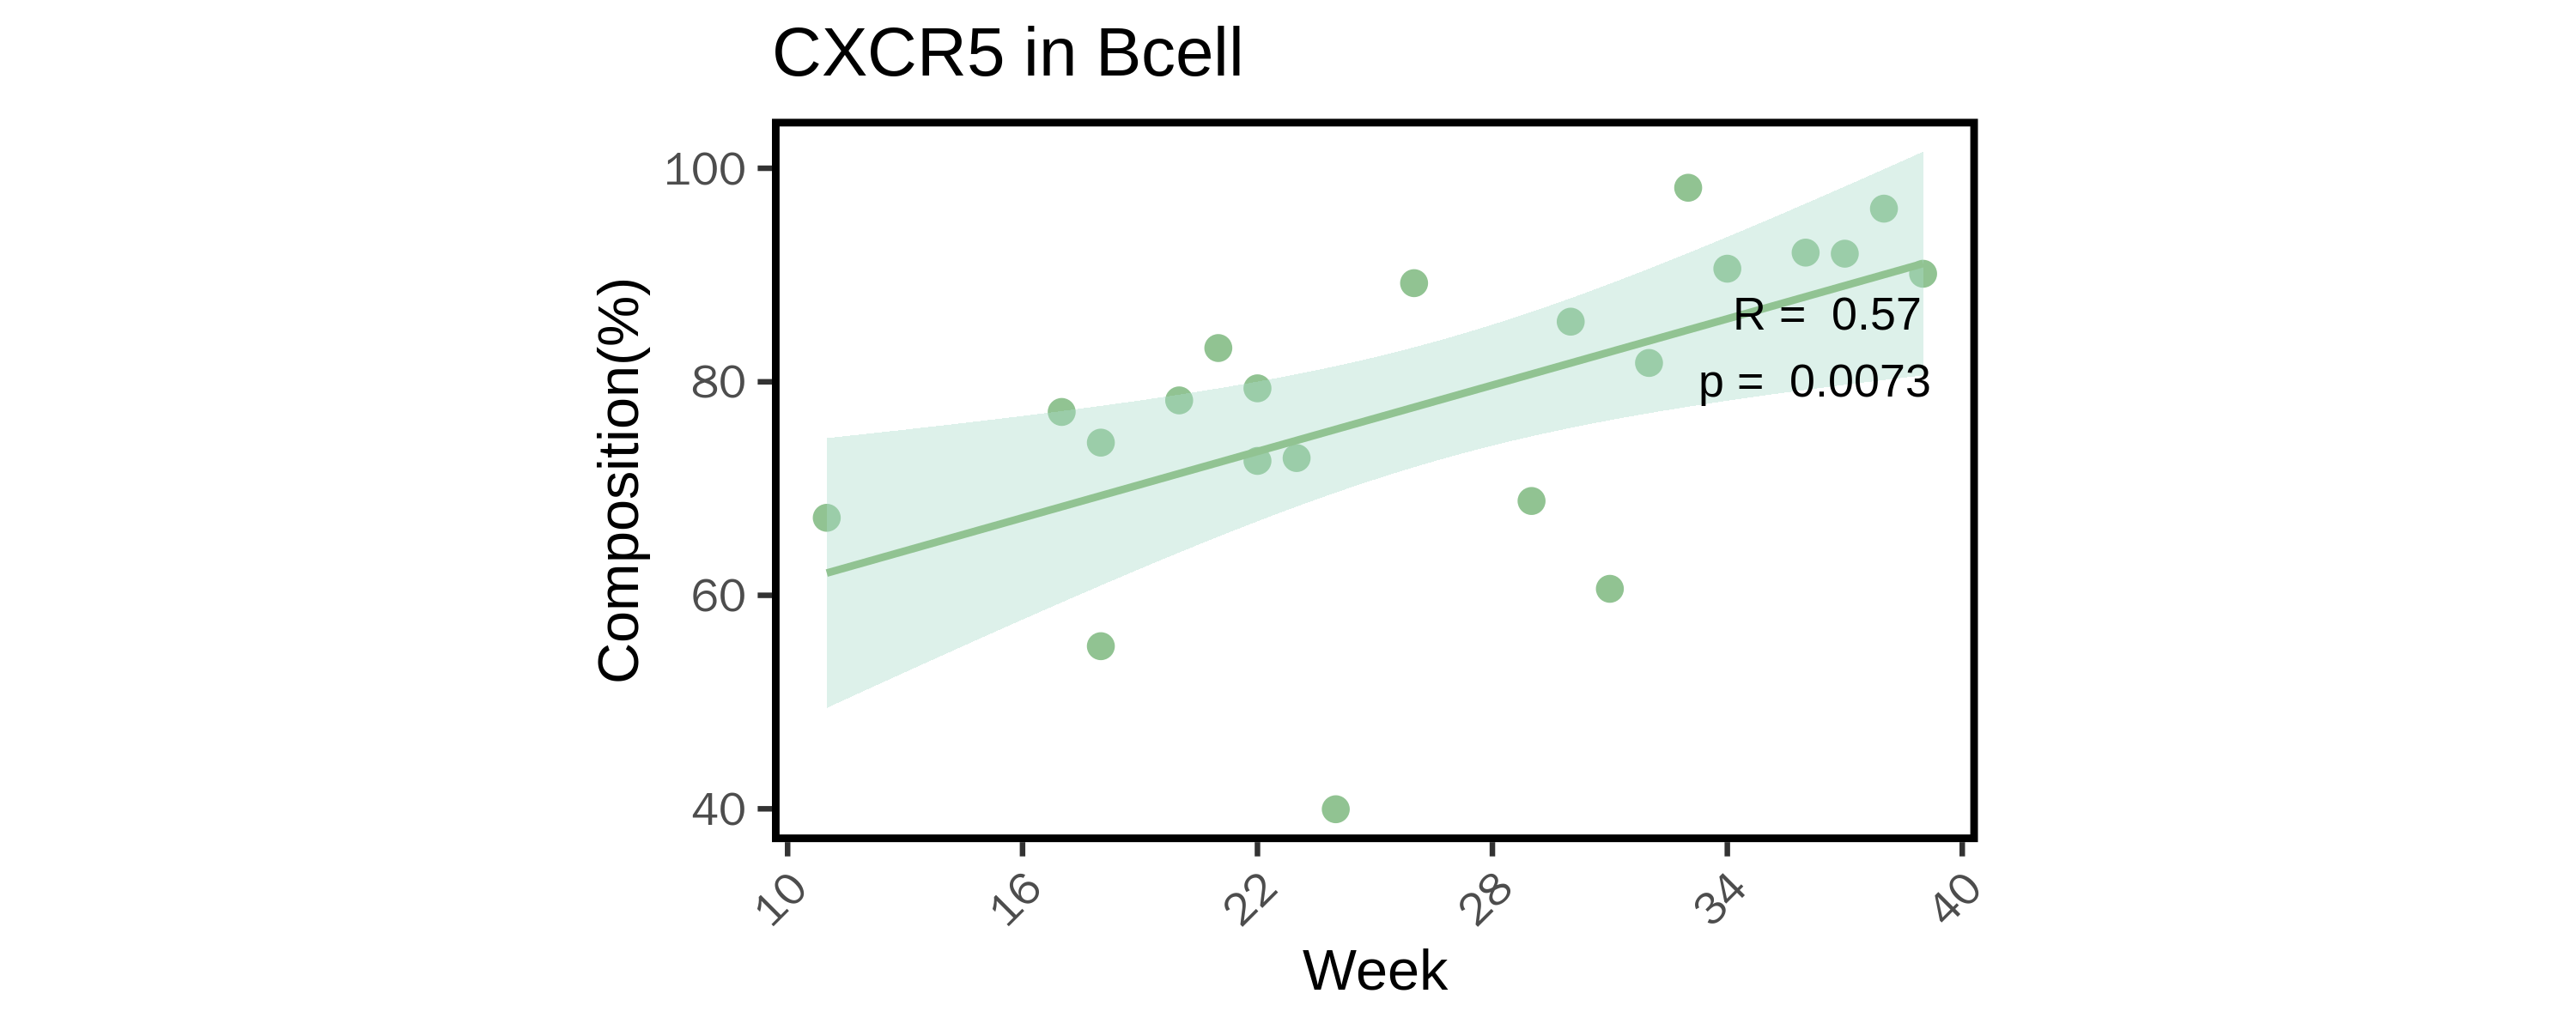

In [83]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_Bcell2
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Bcell"))
  return(plot)
}

gene1 <- "CXCR5+ Naïve B"
gene2 <- "Last_cell_type"

# Call the function with the input data
CXCR5_B_plotneg <- plot_gene_percentage_in_R(PBMCadata_Bcell2, gene1, gene2,name1="CXCR5")
print(CXCR5_B_plotneg)

In [84]:
pos_genes2 = ["CD19", "MS4A1",'CXCR5']
neg_genes2=['CD4','CD8A']

cell_type_true = "CXCR5gene"
column_name2 = "CXCR5clusterup"
cell_type_false = "Others"

PBMCadata_Bcellup= assign_cell_type_based_on_genes(Badata2, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_Bcellup2=PBMCadata_Bcell.obs

`geom_smooth()` using formula = 'y ~ x'


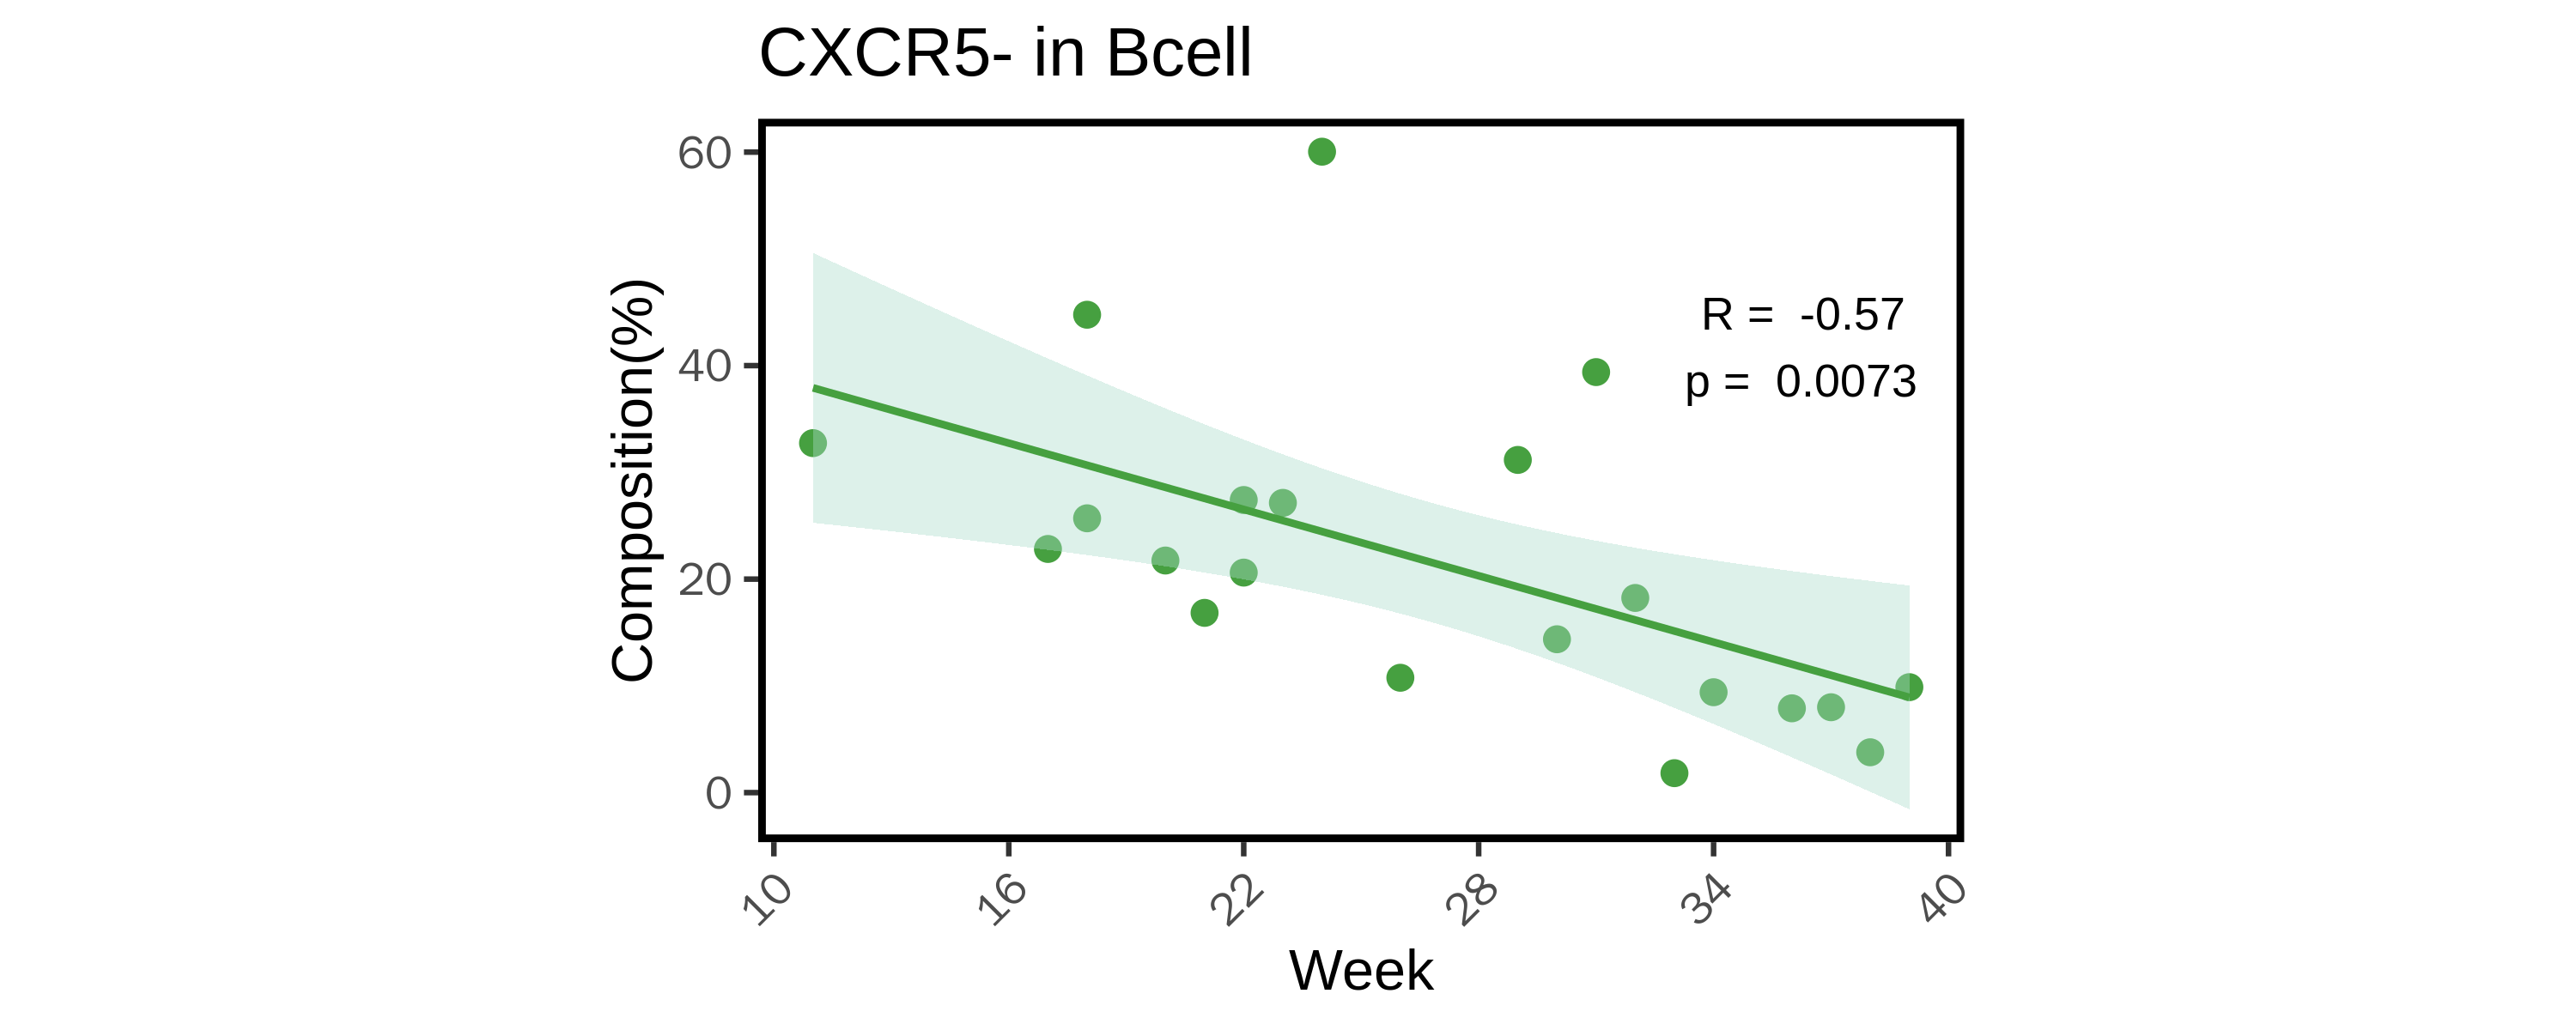

In [85]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_Bcellup2
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Bcell"))
  return(plot)
}

gene1 <- "CXCR5- Naïve B"
gene2 <- "Last_cell_type"

# Call the function with the input data
CXCR5up_B_plot <- plot_gene_percentage_in_R(PBMCadata_Bcellup2, gene1, gene2,name1="CXCR5-")
print(CXCR5up_B_plot)

In [86]:
pos_genes2 = ['PTPRC']
neg_genes2=['CD3D','CD3E','NCAM1']

cell_type_true = "CD56CD3neg"
column_name2 = "CD56CD3negcluster"
cell_type_false = "Others"

PBMCadata_lymcell_CD56CD3neg= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_CD56CD3neg2=PBMCadata_lymcell_CD56CD3neg.obs

`geom_smooth()` using formula = 'y ~ x'


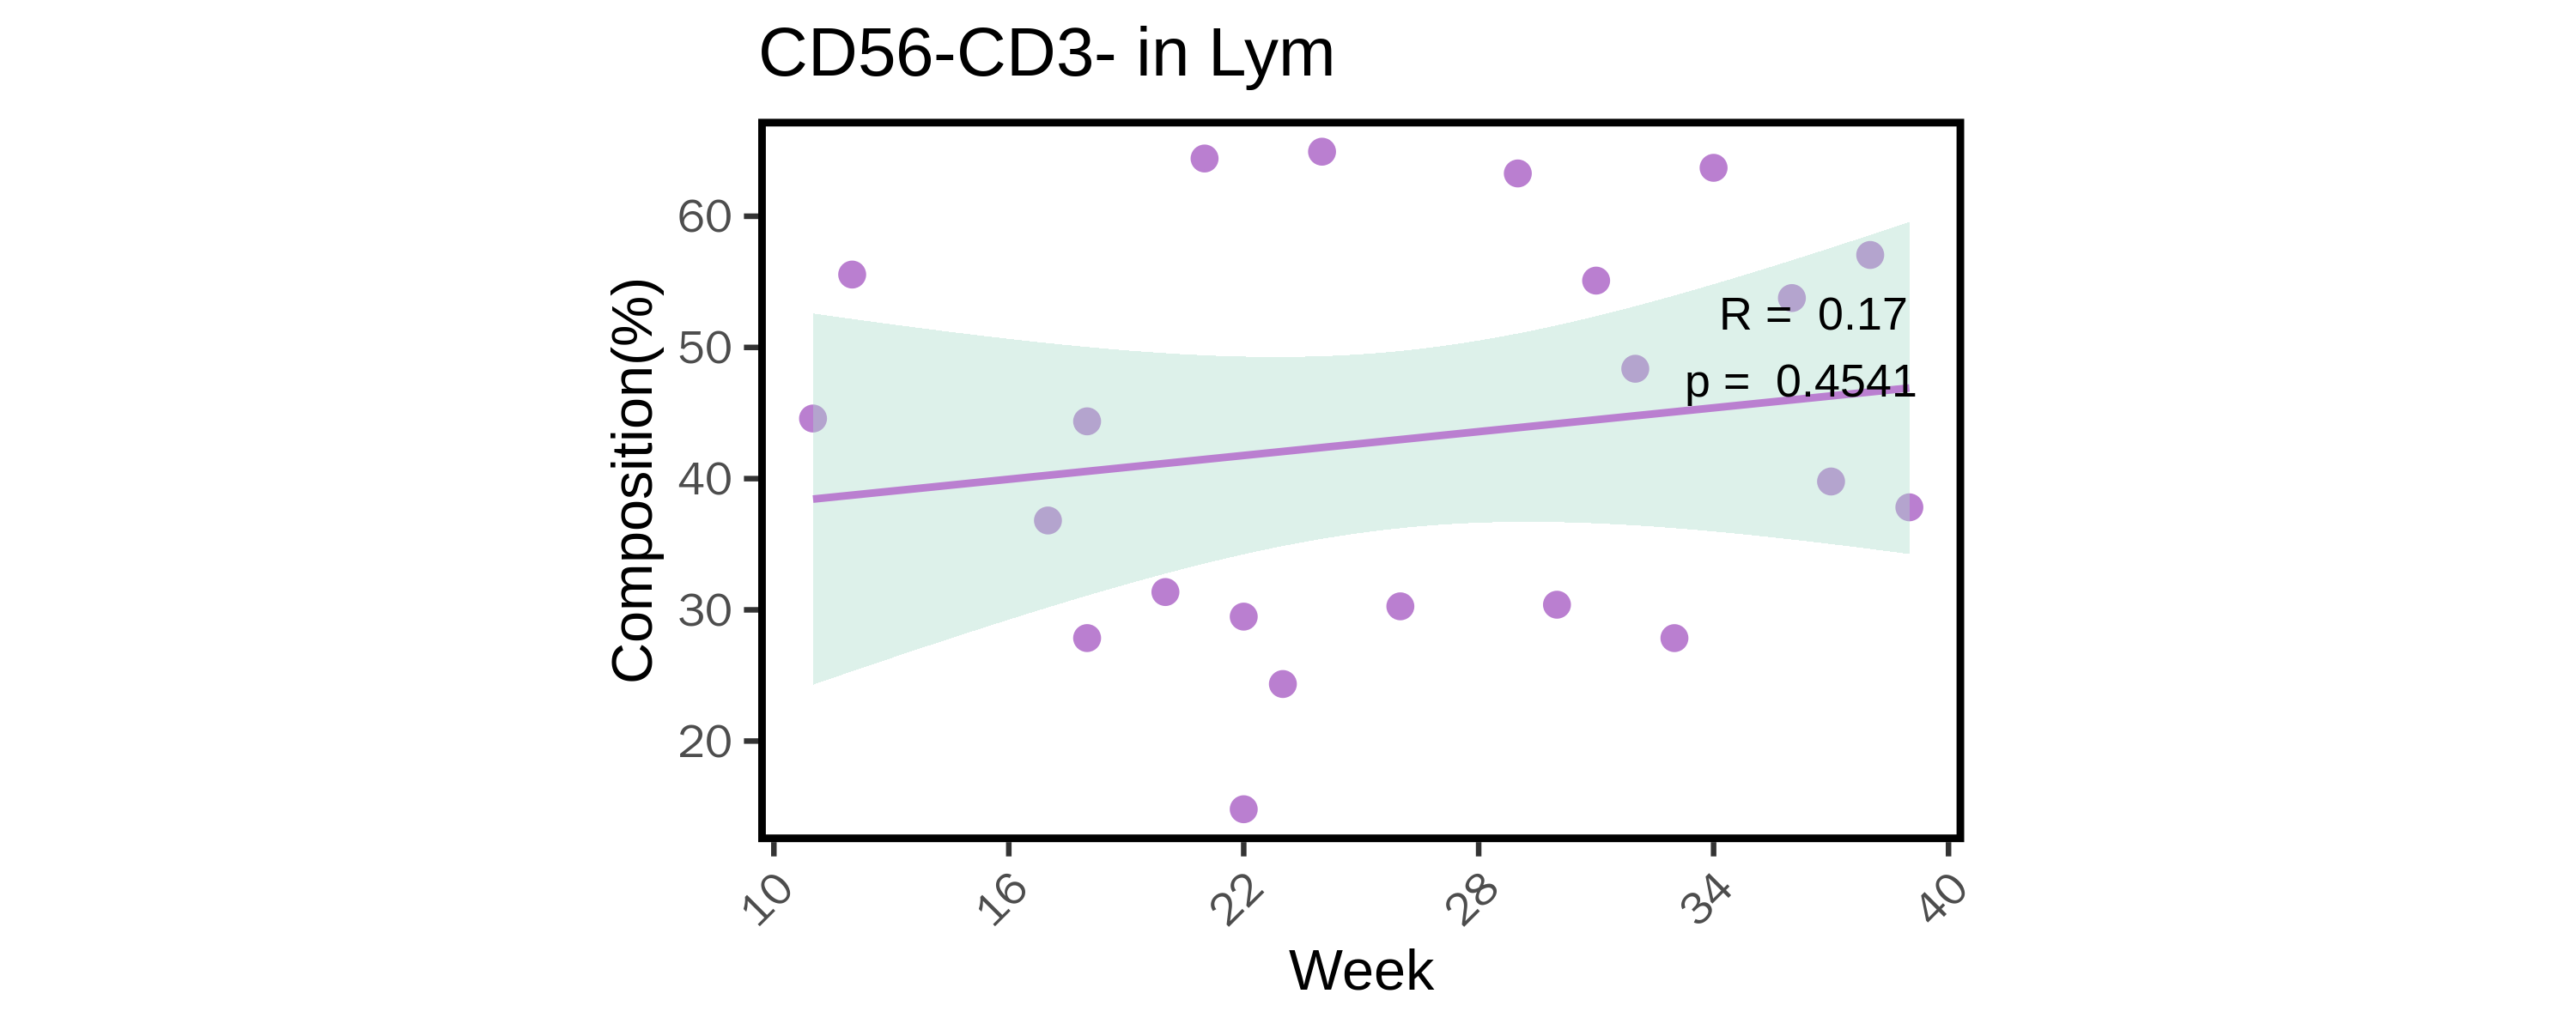

In [87]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_CD56CD3neg2
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, "in Lym"))
  return(plot)
}

gene1 <- "CD56CD3neg"
gene2 <- "CD56CD3negcluster"

# Call the function with the input data
CD56CD3neg_plot <- plot_gene_percentage_in_R(PBMCadata_lymcell_CD56CD3neg2, gene1, gene2,name1="CD56-CD3-")
print(CD56CD3neg_plot)

In [88]:
pos_genes2 = ['CD8A']
neg_genes2=['CD3D','CD3E','NCAM1','CD4','CD19']

cell_type_true = "CD8Apos"
column_name2 = "CD56negcluster"
cell_type_false = "Others"

PBMCadata_lymcell_CD56neg= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_CD56neg2=PBMCadata_lymcell_CD56neg.obs

`geom_smooth()` using formula = 'y ~ x'


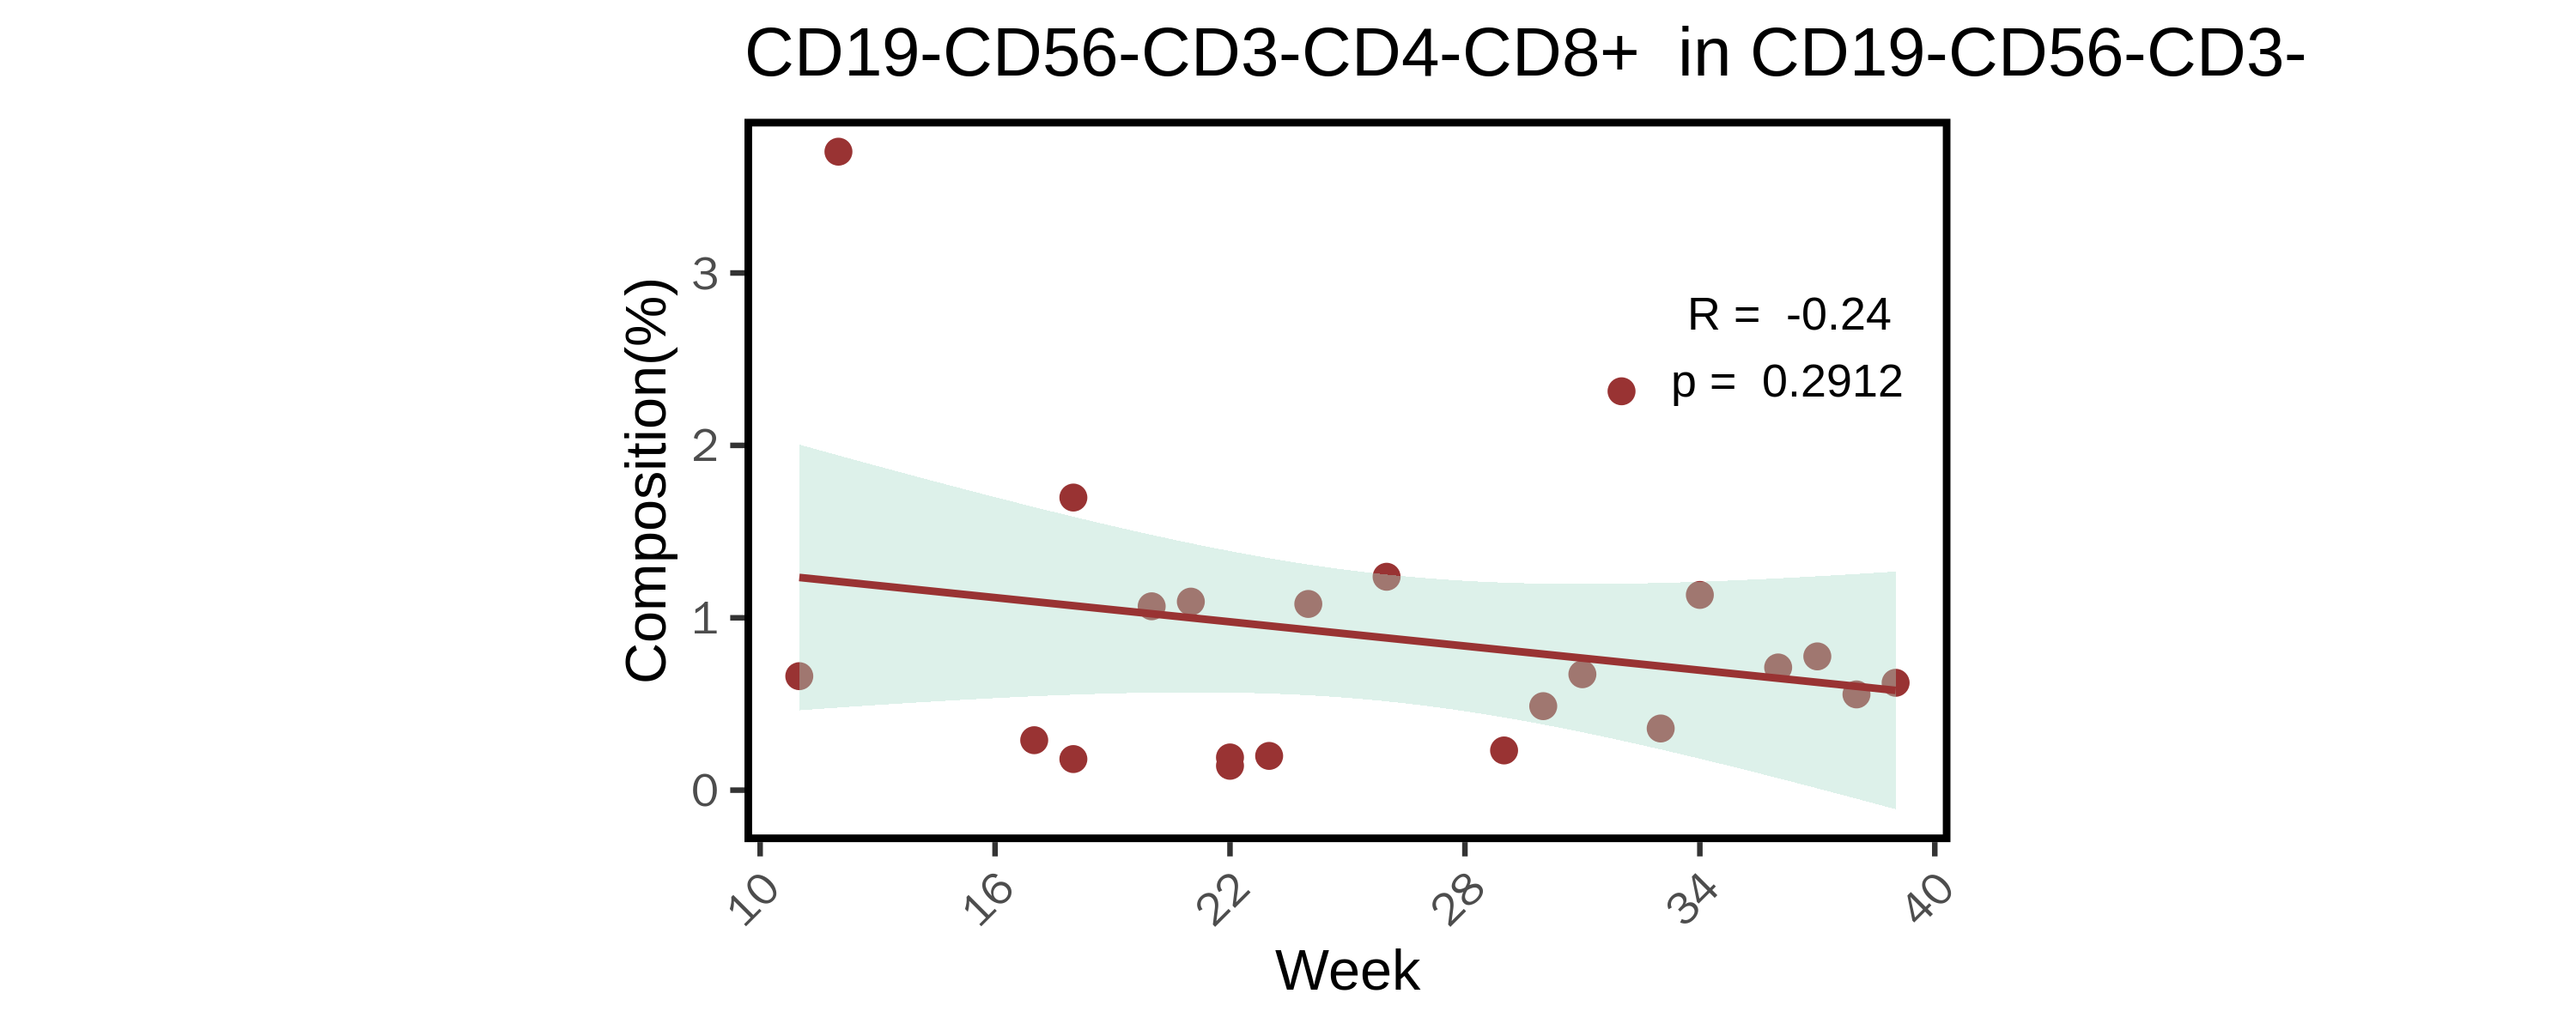

In [89]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_CD56neg2
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in CD19-CD56-CD3-"))
  return(plot)
}

gene1 <- "CD8Apos"
gene2 <- "CD56negcluster"

# Call the function with the input data
CD56CD8Apos_plot <- plot_gene_percentage_in_R(PBMCadata_lymcell_CD56neg2, gene1, gene2,name1="CD19-CD56-CD3-CD4-CD8+")
print(CD56CD8Apos_plot)

In [90]:
pos_genes2 = ['PTPRC']
neg_genes2=['CD3D','CD3E','NCAM1','CD19']

cell_type_true = "AllnegCD19"
column_name2 = "CD19negcluster2"
cell_type_false = "Others"

PBMCadata_lymcell_CD19neg3= assign_cell_type_based_on_genes(PBMCadata_lymcell, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
# PBMCadata_lymcell_CD19neg3=PBMCadata_lymcell_CD56neg3.obs

In [91]:
AllnegCD19=PBMCadata_lymcell_CD19neg3[PBMCadata_lymcell_CD19neg3.obs.CD19negcluster2=="AllnegCD19"]

In [92]:
pos_genes2 = ['PTPRC']
neg_genes2=['CD3D','CD3E','NCAM1','CD19','CD4','CD8A']

cell_type_true = "AllnegCD4CD8"
column_name2 = "CD4CD8negcluster2"
cell_type_false = "Others"

AllnegCD19_CD4CD8neg= assign_cell_type_based_on_genes(AllnegCD19, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
AllnegCD19_CD4CD8neg3=AllnegCD19_CD4CD8neg.obs

`geom_smooth()` using formula = 'y ~ x'


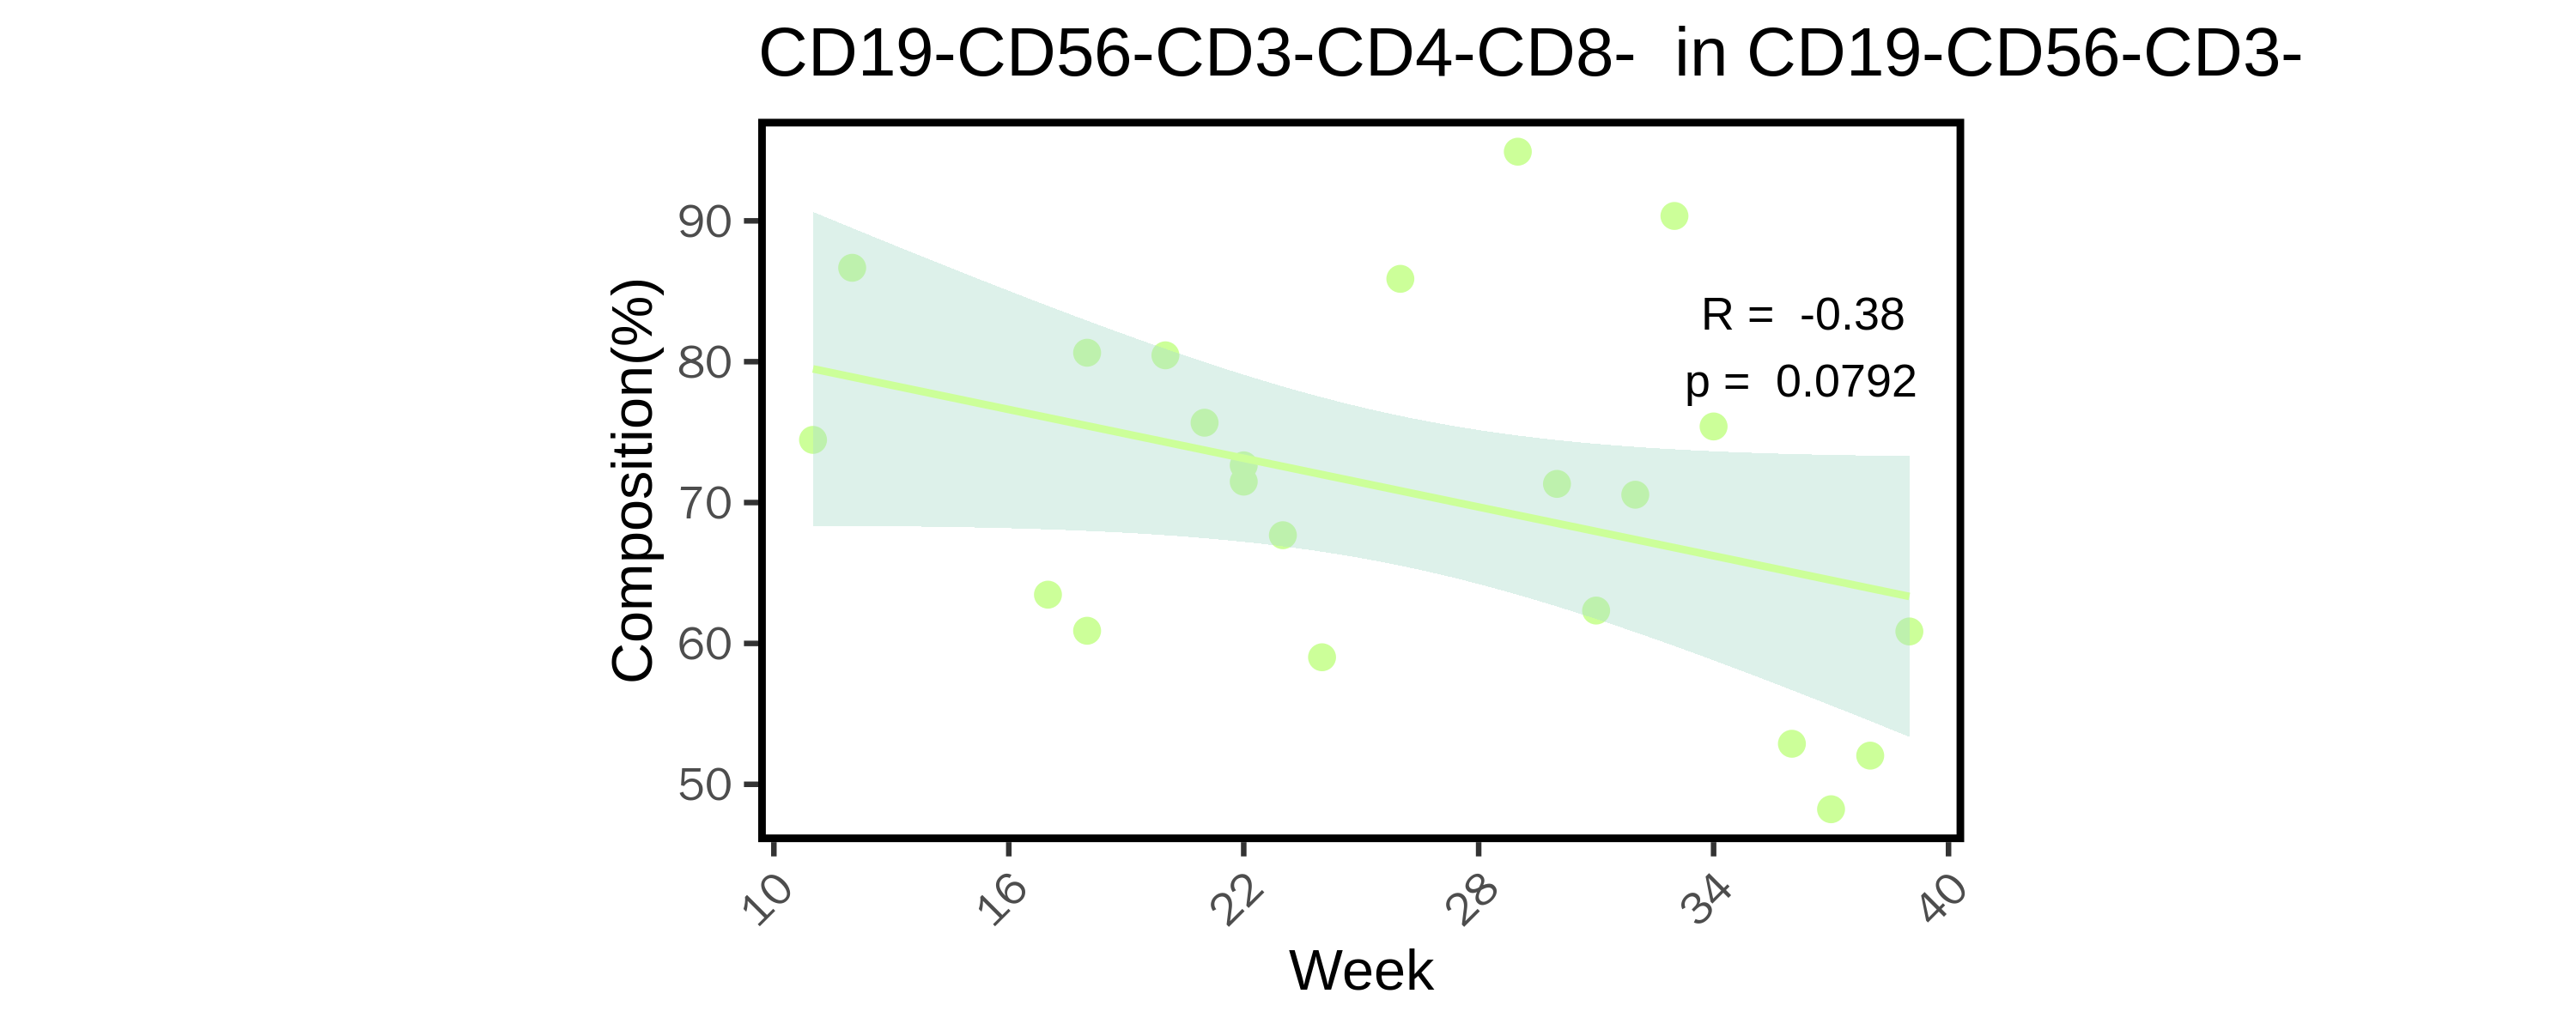

In [93]:
%%R -w 3000 -h 1200 -r 300 -i AllnegCD19_CD4CD8neg3
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in CD19-CD56-CD3-"))
  return(plot)
}

gene1 <- "AllnegCD4CD8"
gene2 <- "CD4CD8negcluster2"

# Call the function with the input data
AllnegCD19_CD4CD8neg3_plot <- plot_gene_percentage_in_R(AllnegCD19_CD4CD8neg3, gene1, gene2,name1="CD19-CD56-CD3-CD4-CD8-")
print(AllnegCD19_CD4CD8neg3_plot)

In [94]:
pos_genes2 = ['CD8A']
neg_genes2=['CD3D','CD3E','NCAM1','CD4','CD19']

cell_type_true = "CD8Apos"
column_name2 = "CD56negcluster"
cell_type_false = "Others"

PBMCadata_lymcell_CD56neg= assign_cell_type_based_on_genes(AllnegCD19, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
PBMCadata_lymcell_CD56neg2=PBMCadata_lymcell_CD56neg.obs

`geom_smooth()` using formula = 'y ~ x'


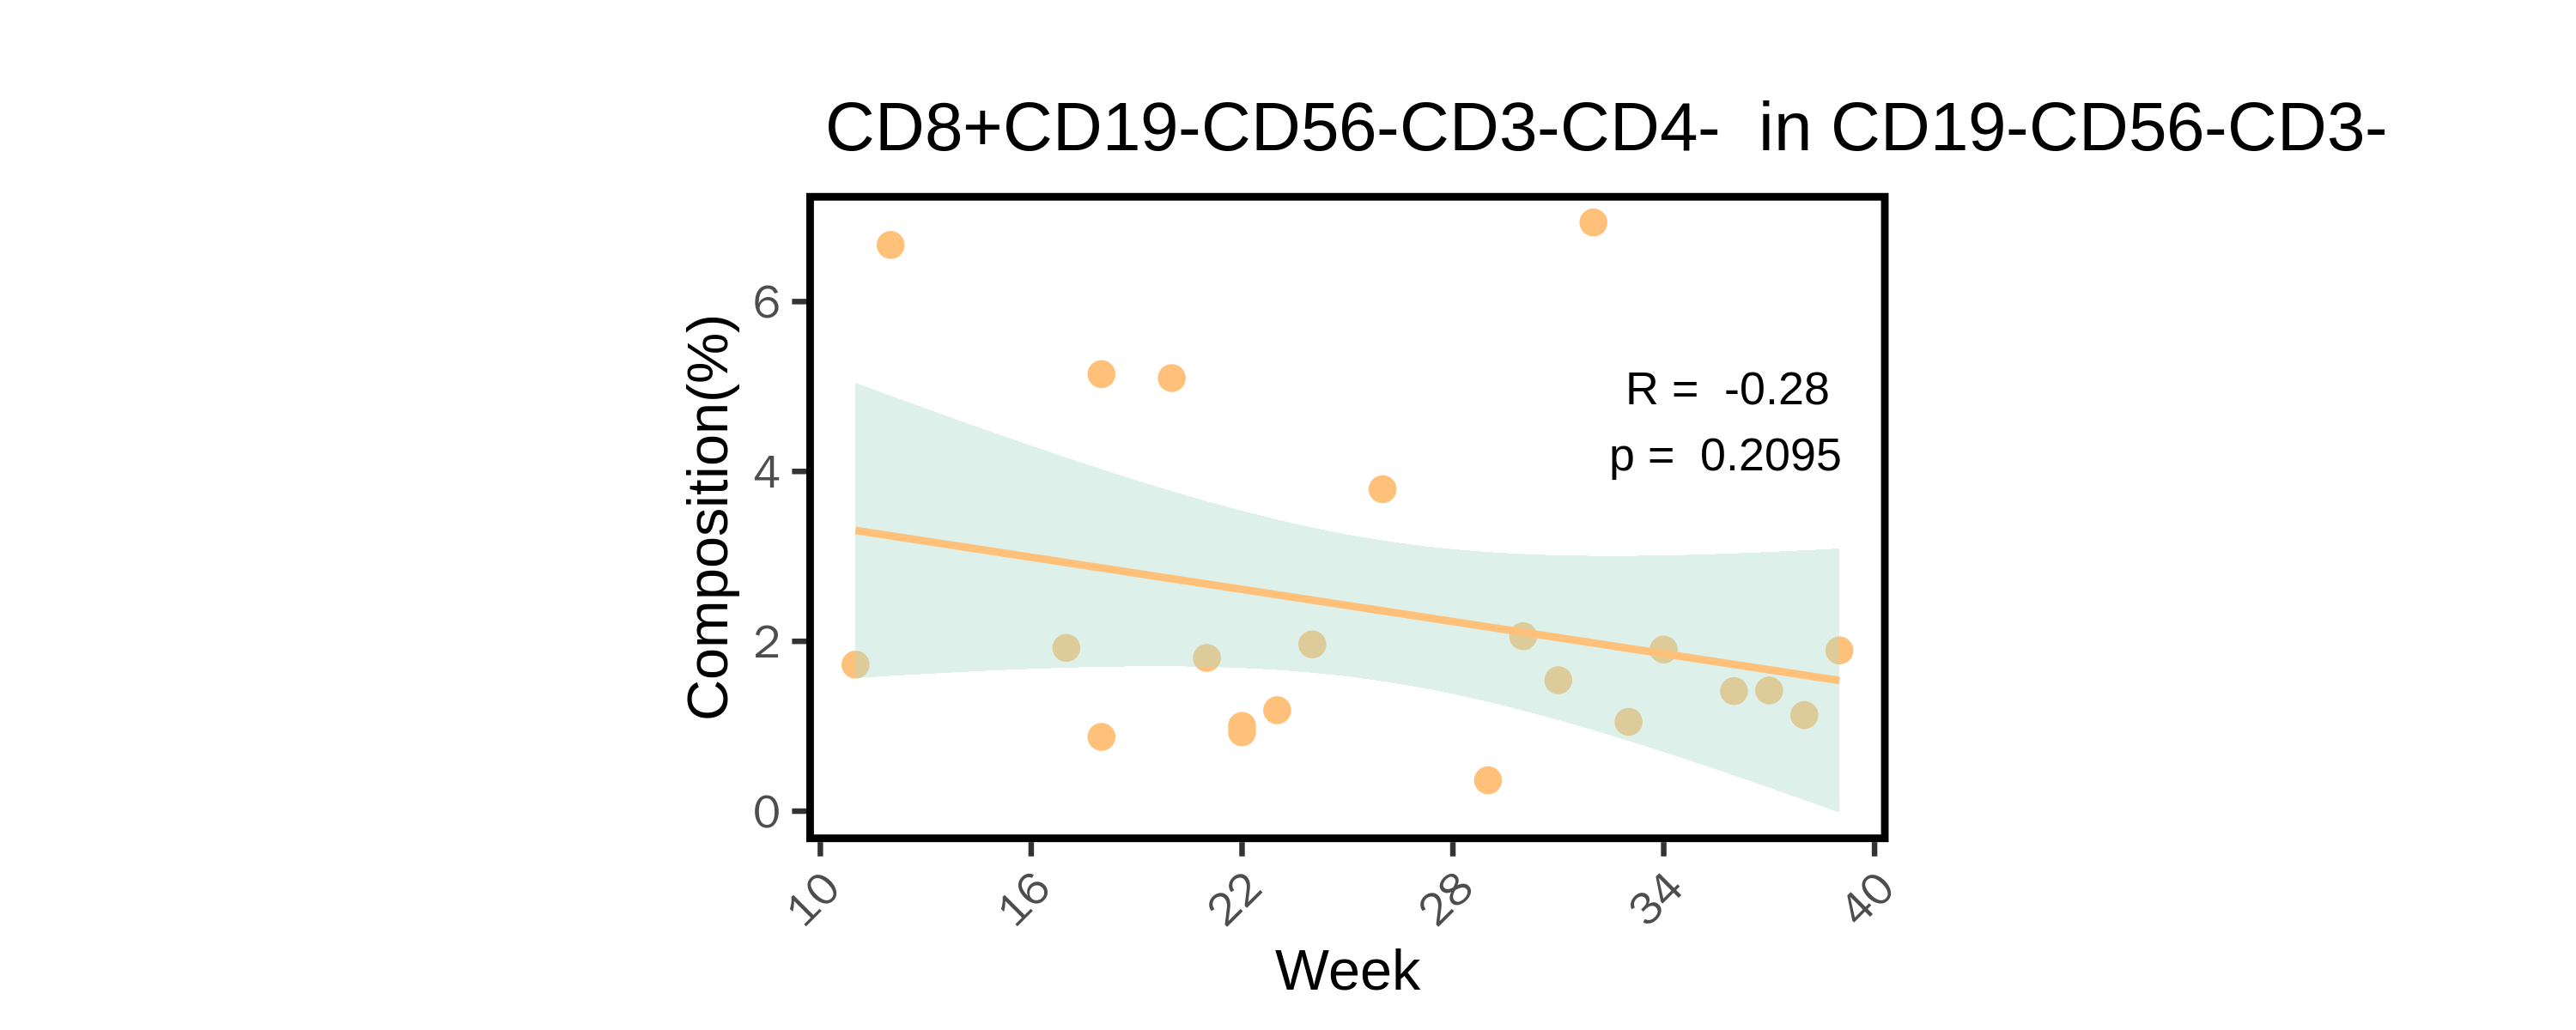

In [95]:
%%R -w 3000 -h 1200 -r 300 -i PBMCadata_lymcell_CD56neg2
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in CD19-CD56-CD3-"))
  return(plot)
}

gene1 <- "CD8Apos"
gene2 <- "CD56negcluster"

# Call the function with the input data
CD56CD8Apos_plot <- plot_gene_percentage_in_R(PBMCadata_lymcell_CD56neg2, gene1, gene2,name1="\n CD8+CD19-CD56-CD3-CD4-")
print(CD56CD8Apos_plot)

In [96]:
pos_genes = [ 'CD3D',  'CD8A']
neg_genes = ['CCR7','CD28']
column_name = "MCD28neg"
cell_type_true = "CD8T"
cell_type_false = "CD8Tnaive"

CD8adata_CD28neg = assign_cell_type_based_on_genes(CD8adata_lymcell, pos_genes, neg_genes, column_name, cell_type_true, cell_type_false)
CD8adata_CD28negobs=CD8adata_CD28neg.obs

`geom_smooth()` using formula = 'y ~ x'


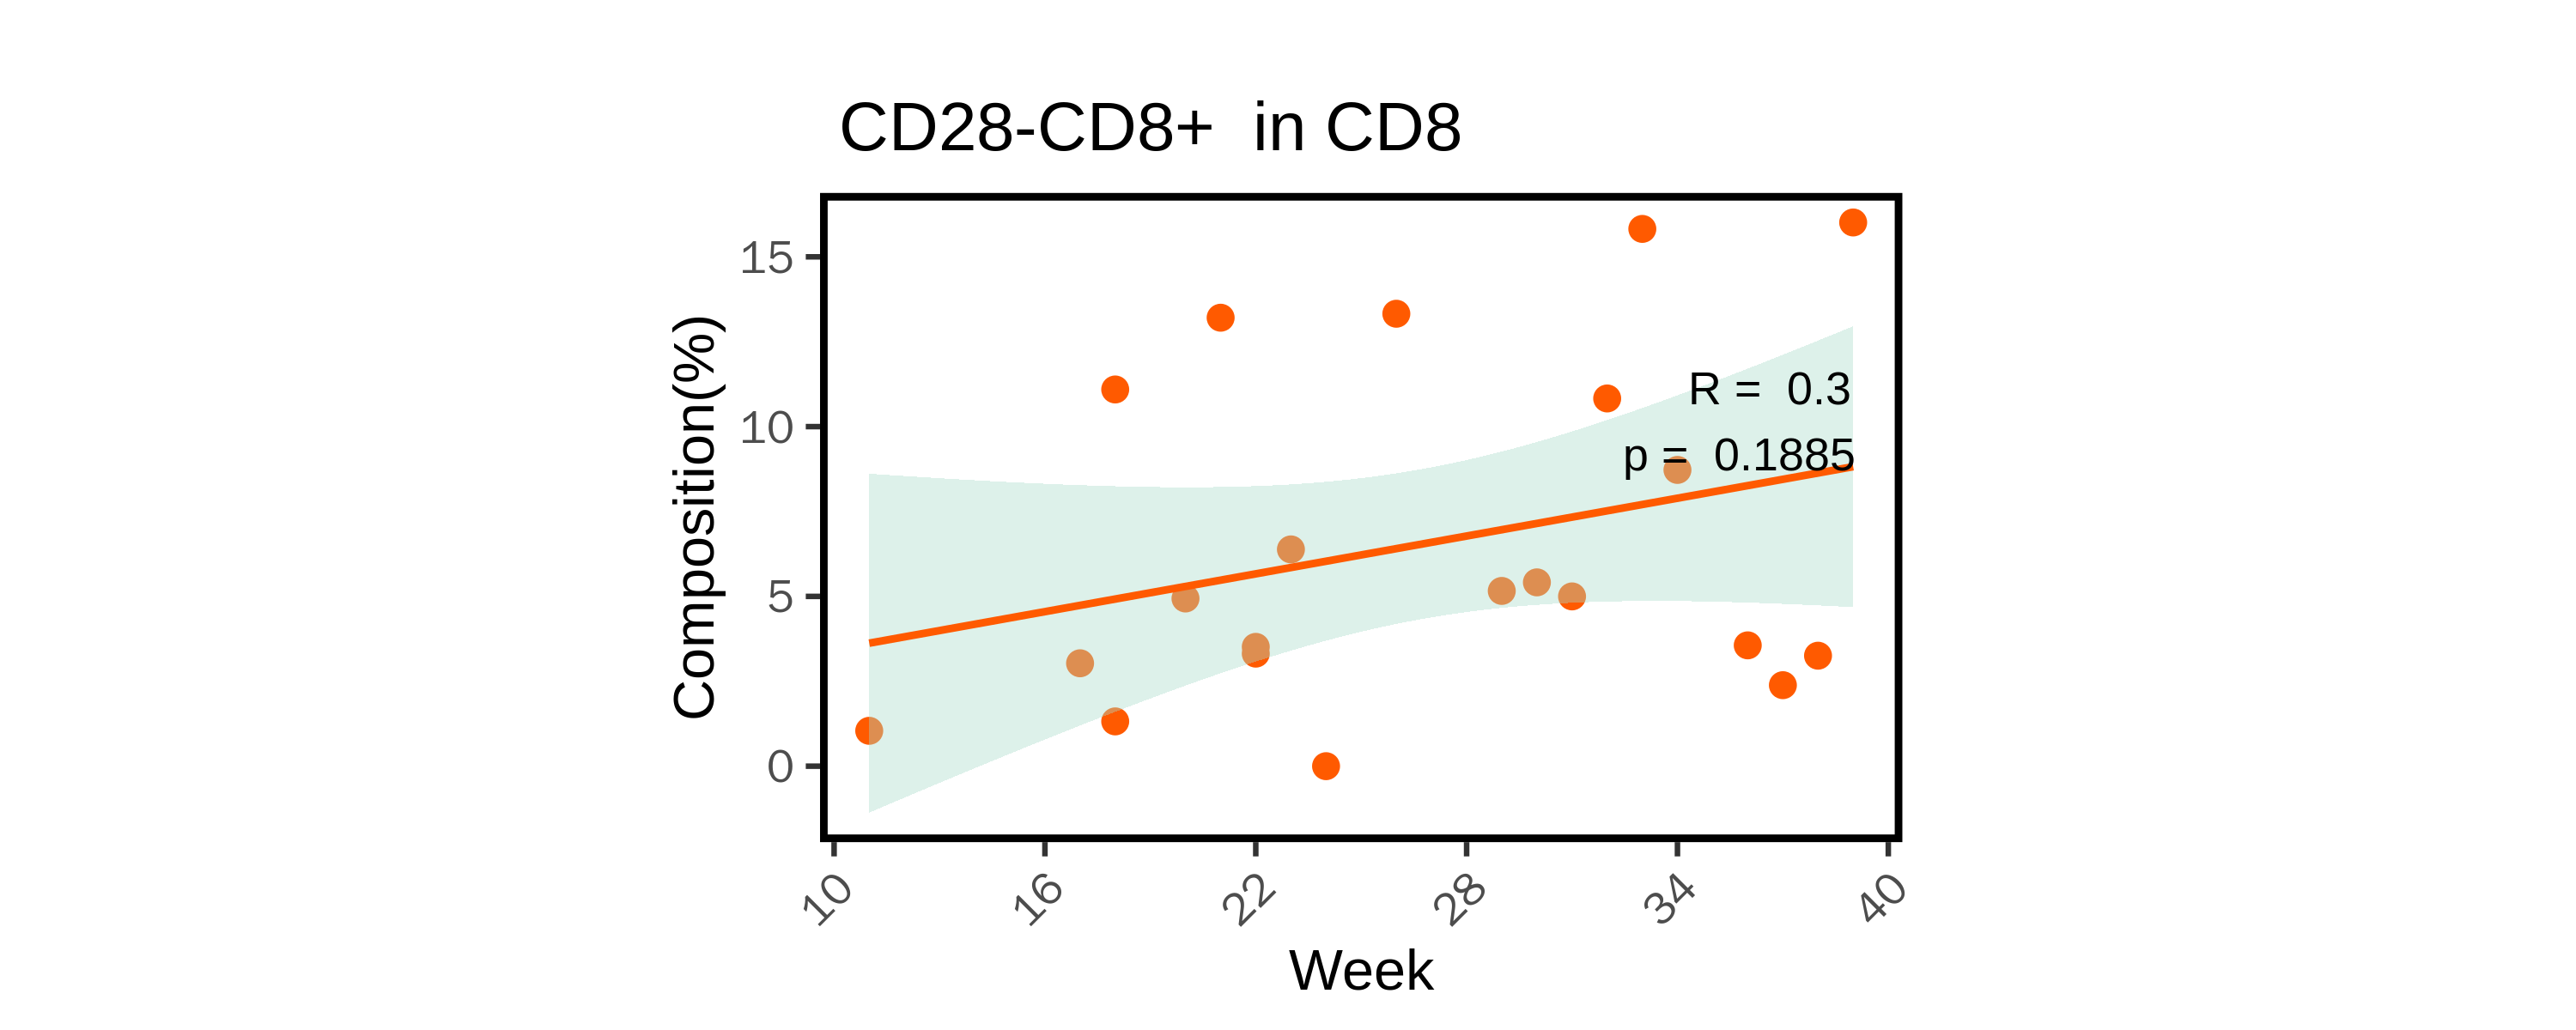

In [97]:
%%R -w 3000 -h 1200 -r 300 -i CD8adata_CD28negobs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in CD8"))
  return(plot)
}

gene1 <- "CD8T"
gene2 <- "MCD28neg"

# Call the function with the input data
CD8adata_CD28negobs_plot <- plot_gene_percentage_in_R(CD8adata_CD28negobs, gene1, gene2,name1="\n CD28-CD8+")
print(CD8adata_CD28negobs_plot)

In [98]:
pos_genes2 = ['CD3D', 'CD4']
neg_genes2 = ['CXCL5']
column_name2 = "CD4_CXCL5neg"
cell_type_true = "CXCL5neg"
cell_type_false = "Others"

NaCD4T2_CXCL5neg= assign_cell_type_based_on_genes(NaCD4T2, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)


In [99]:
NaCD4T2

AnnData object with n_obs × n_vars = 43594 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'CD4name', 'CXCR5_cell', 'TRDVone1', 'TRDVone2', 'CD4_CXCL5neg'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap', 'CD4name_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [100]:
NaCD4T2_CXCL5neg=NaCD4T2[NaCD4T2.obs.CD4_CXCL5neg=="CXCL5neg"]
NaCD4T2_CXCL5neg

View of AnnData object with n_obs × n_vars = 14016 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'CD4name', 'CXCR5_cell', 'TRDVone1', 'TRDVone2', 'CD4_CXCL5neg'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap', 'CD4name_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [101]:
pos_genes2 = ['CD3D', 'CD4','CXCR3']
neg_genes2 = ['CXCL5','CCR4']
column_name2 = "CD4_Th1"
cell_type_true = "Th1"
cell_type_false = "Others"

NaCD4T2_CXCL5neg_Th1= assign_cell_type_based_on_genes(NaCD4T2_CXCL5neg, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
NaCD4T2_CXCL5neg_Th1obs=NaCD4T2_CXCL5neg_Th1.obs

`geom_smooth()` using formula = 'y ~ x'


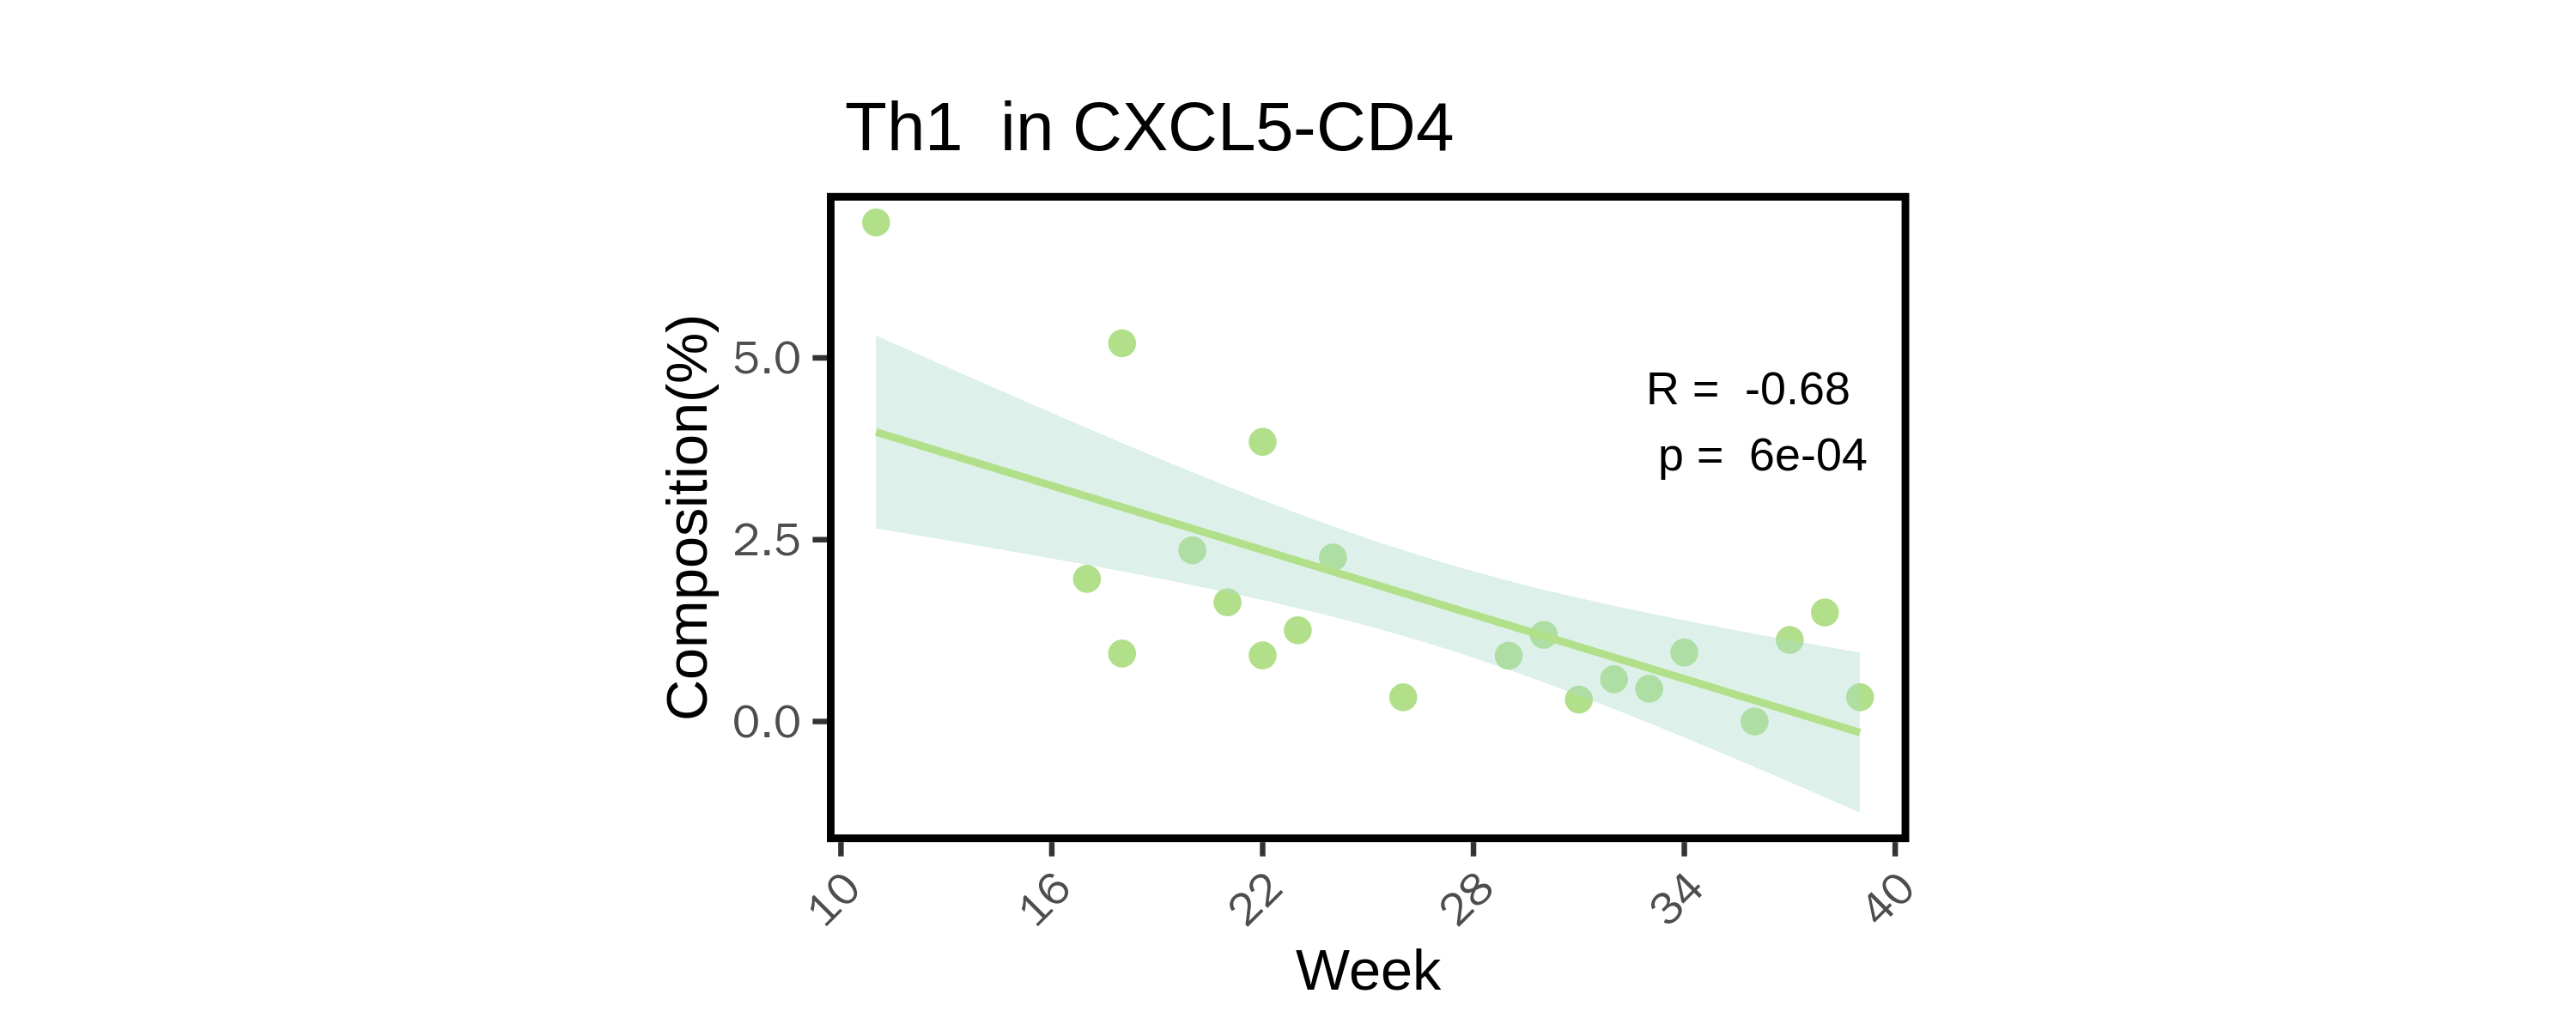

In [102]:
%%R -w 3000 -h 1200 -r 300 -i NaCD4T2_CXCL5neg_Th1obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in CXCL5-CD4"))
  return(plot)
}

gene1 <- "Th1"
gene2 <- "CD4_Th1"

# Call the function with the input data
plot_NaCD4T2_CXCL5neg_Th1 <- plot_gene_percentage_in_R(NaCD4T2_CXCL5neg_Th1obs, gene1, gene2,name1="\n Th1")
print(plot_NaCD4T2_CXCL5neg_Th1)
## 

In [103]:
import pandas as pd
PBMCadata_lymcell.obs['NKTname'] = PBMCadata_lymcell.obs['Last_cell_type'].apply(lambda x: 'NKT' if 'NK T' in x else 'Others')

PBMCadata_lymcell.obs['NKcluster']= PBMCadata_lymcell.obs['Last_cell_type'].apply(lambda x: 'NK' if ' NK' in x else 'Others')

In [104]:
PBMCadata_lymcell

AnnData object with n_obs × n_vars = 136643 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'TRDVone2', 'TRDVPDCD1', 'TRDV2PDCD1', 'TRDV1KLRK1', 'CD3E', 'Thdata', 'CellCD4', 'CellCD8', 'CD56CD3negcluster', 'CD56negcluster', 'CD19negcluster2', 'NKTname', 'NKcluster'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [105]:
PBMCadata_lymcell.obs['NKcluster'].value_counts()

Others    123288
NK         13355
Name: NKcluster, dtype: int64

In [106]:
PBMCadata_lymcell.obs['NKTname'].value_counts()

Others    135751
NKT          892
Name: NKTname, dtype: int64

In [107]:
NKTobs=PBMCadata_lymcell.obs

`geom_smooth()` using formula = 'y ~ x'


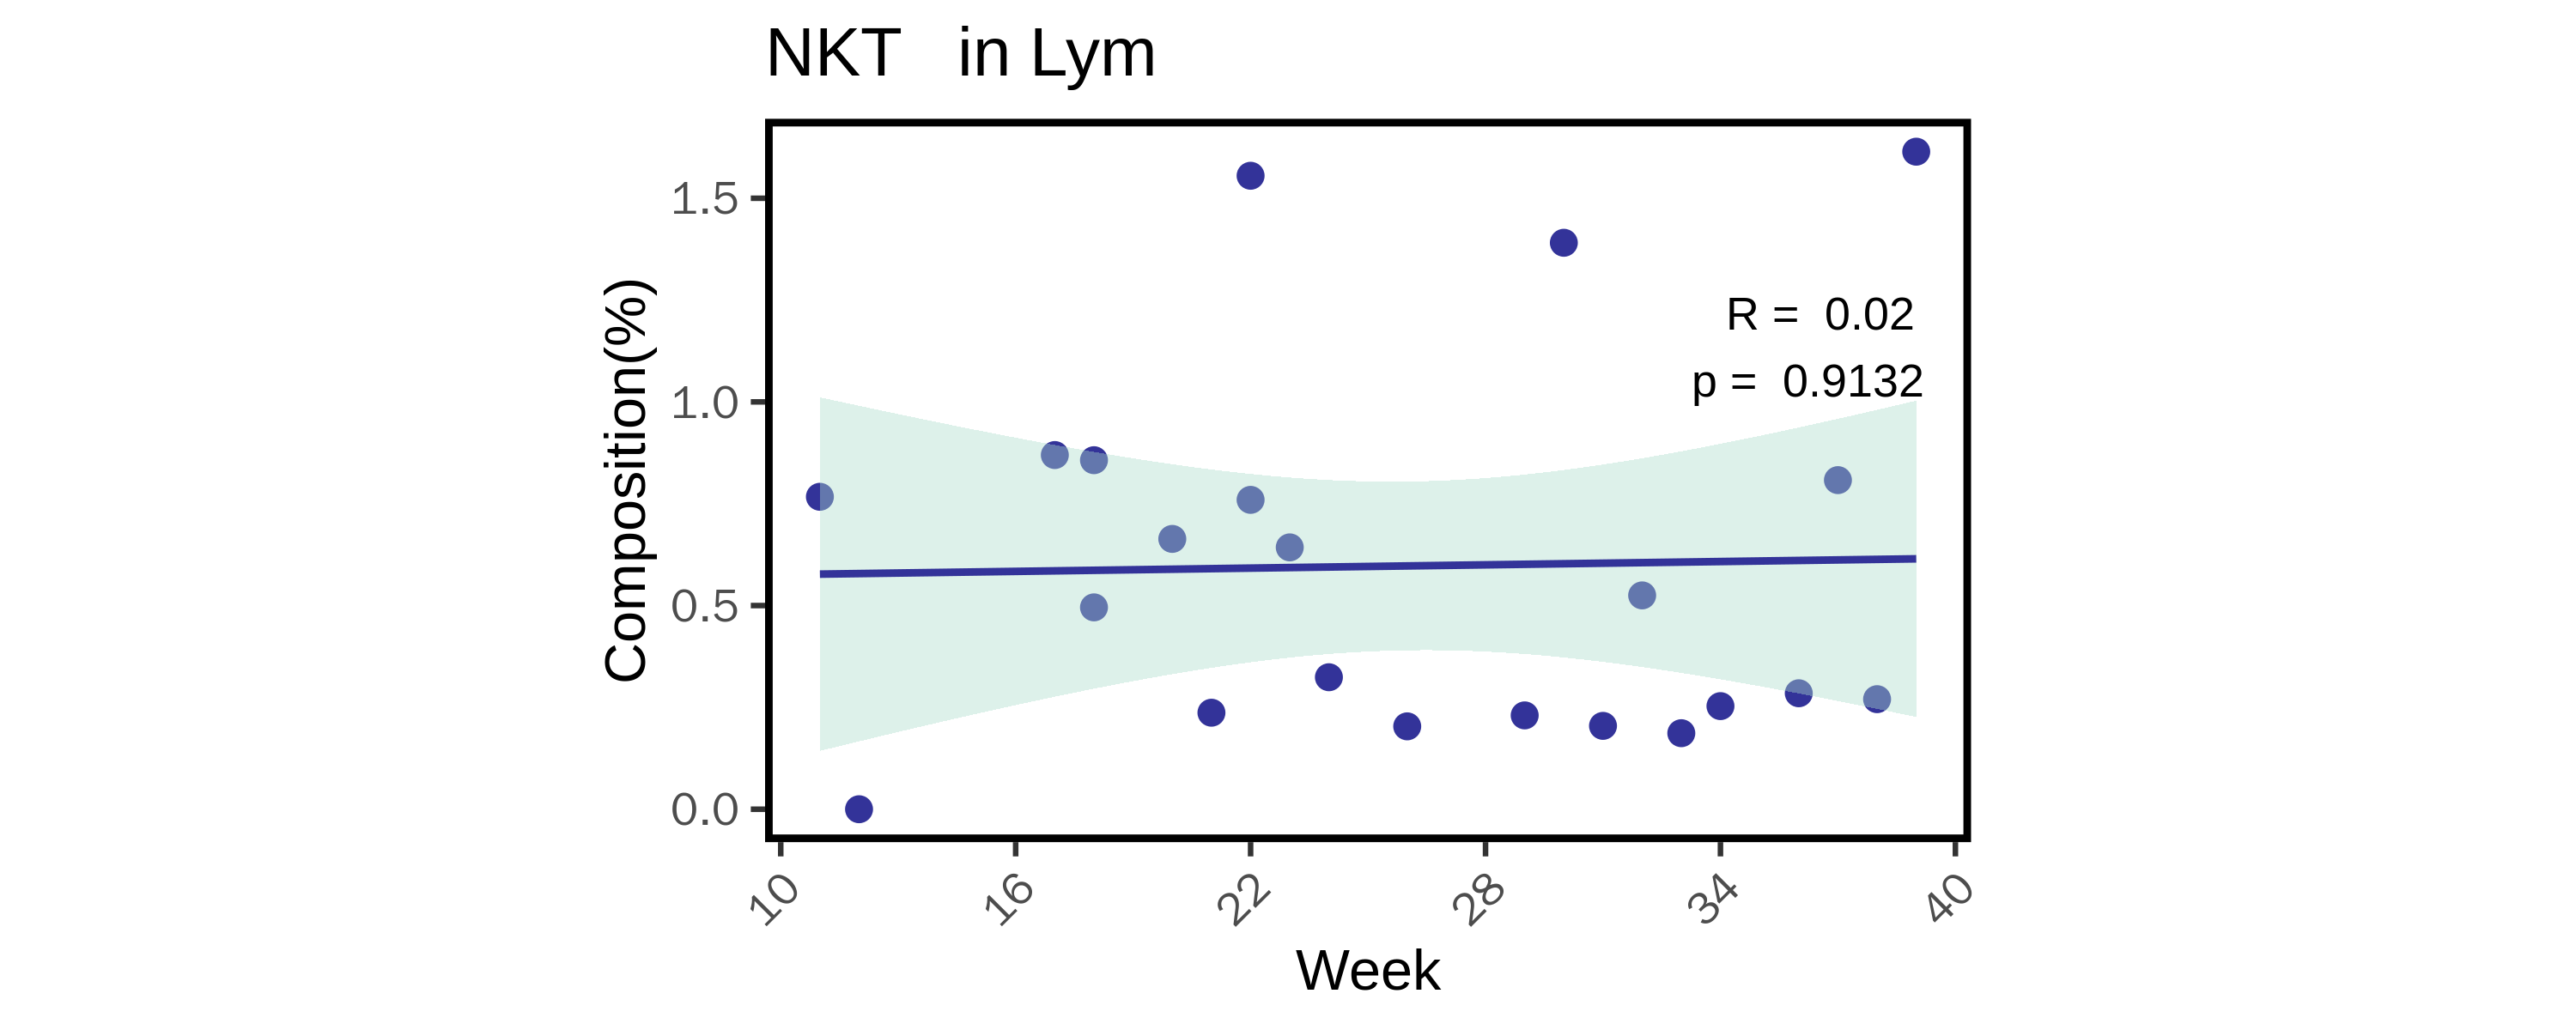

In [108]:
%%R -w 3000 -h 1200 -r 300 -i NKTobs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in Lym"))
  return(plot)
}

gene1 <- "NKT"
gene2 <- "NKTname"

# Call the function with the input data
Plot_NKTobs_Lym_plot <- plot_gene_percentage_in_R(NKTobs, gene1, gene2,name1="NKT ")
print(Plot_NKTobs_Lym_plot)
## 

`geom_smooth()` using formula = 'y ~ x'


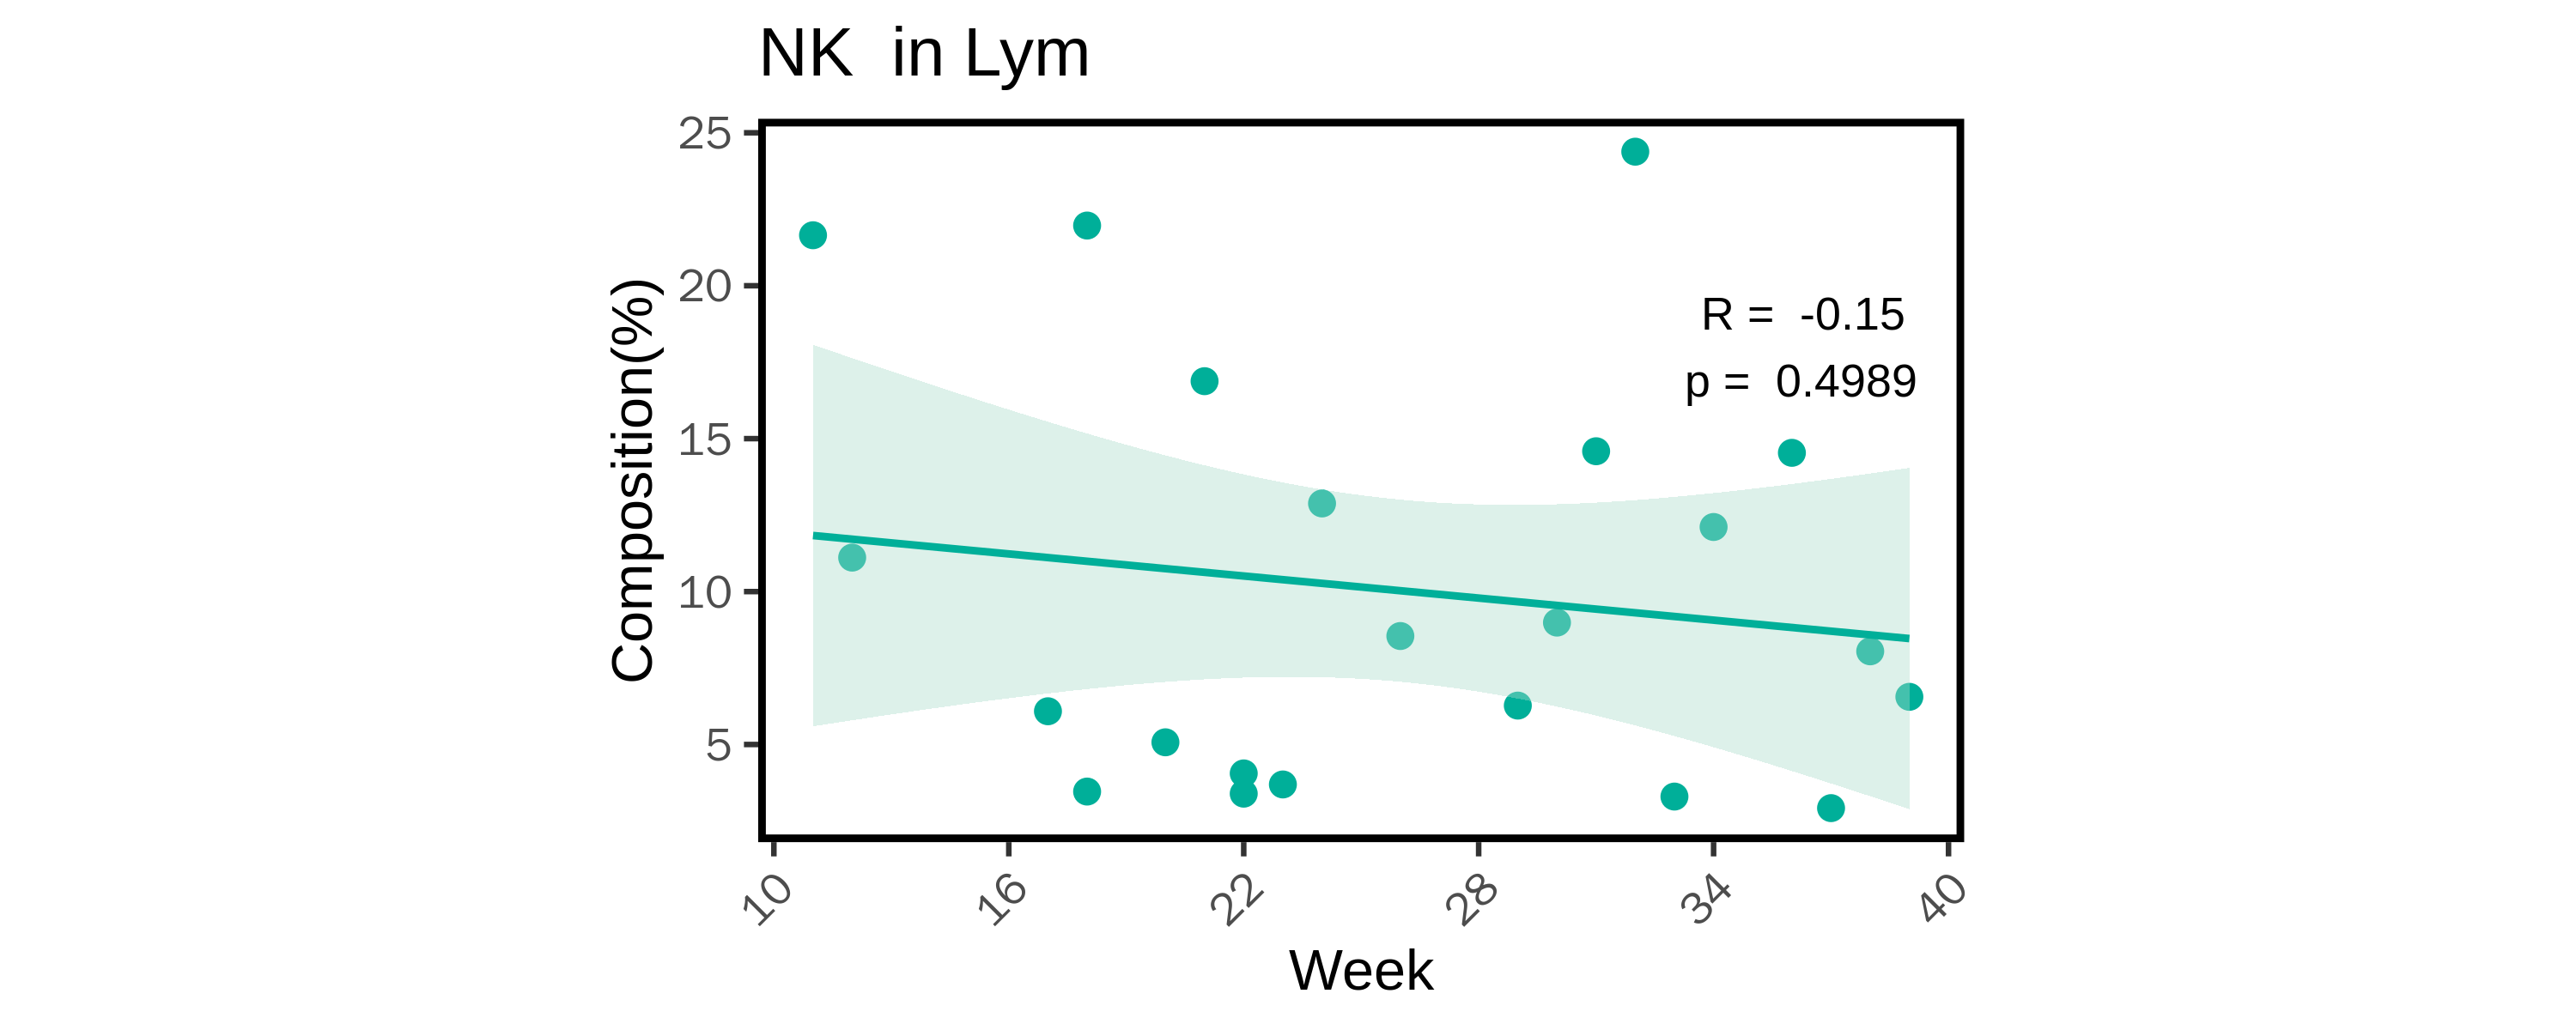

In [109]:
%%R -w 3000 -h 1200 -r 300 -i NKTobs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in Lym"))
  return(plot)
}

gene1 <- "NK"
gene2 <- "NKcluster"

# Call the function with the input data
Plot_NKobs_Lym <- plot_gene_percentage_in_R(NKTobs, gene1, gene2,name1="NK")
print(Plot_NKobs_Lym )
## 

In [110]:
pos_genes2 = ['CD3D', 'CD4','PTPRC']
neg_genes2 = ['CCR7','CD8A']
column_name2 = "CD4_TEMRA_TEFF"
cell_type_true = "CD4_TEMRA"
cell_type_false = "Others"

NaCD4T2_lymcell_TEMRA= assign_cell_type_based_on_genes(NaCD4T2, pos_genes2, neg_genes2, column_name2, cell_type_true, cell_type_false)
NaCD4T2_lymcell_TEMRAobs=NaCD4T2_lymcell_TEMRA.obs

In [111]:
NaCD4T2_lymcell_TEMRAobs["CD4_TEMRA_TEFF"].value_counts()


Others       41425
CD4_TEMRA     2169
Name: CD4_TEMRA_TEFF, dtype: int64

`geom_smooth()` using formula = 'y ~ x'


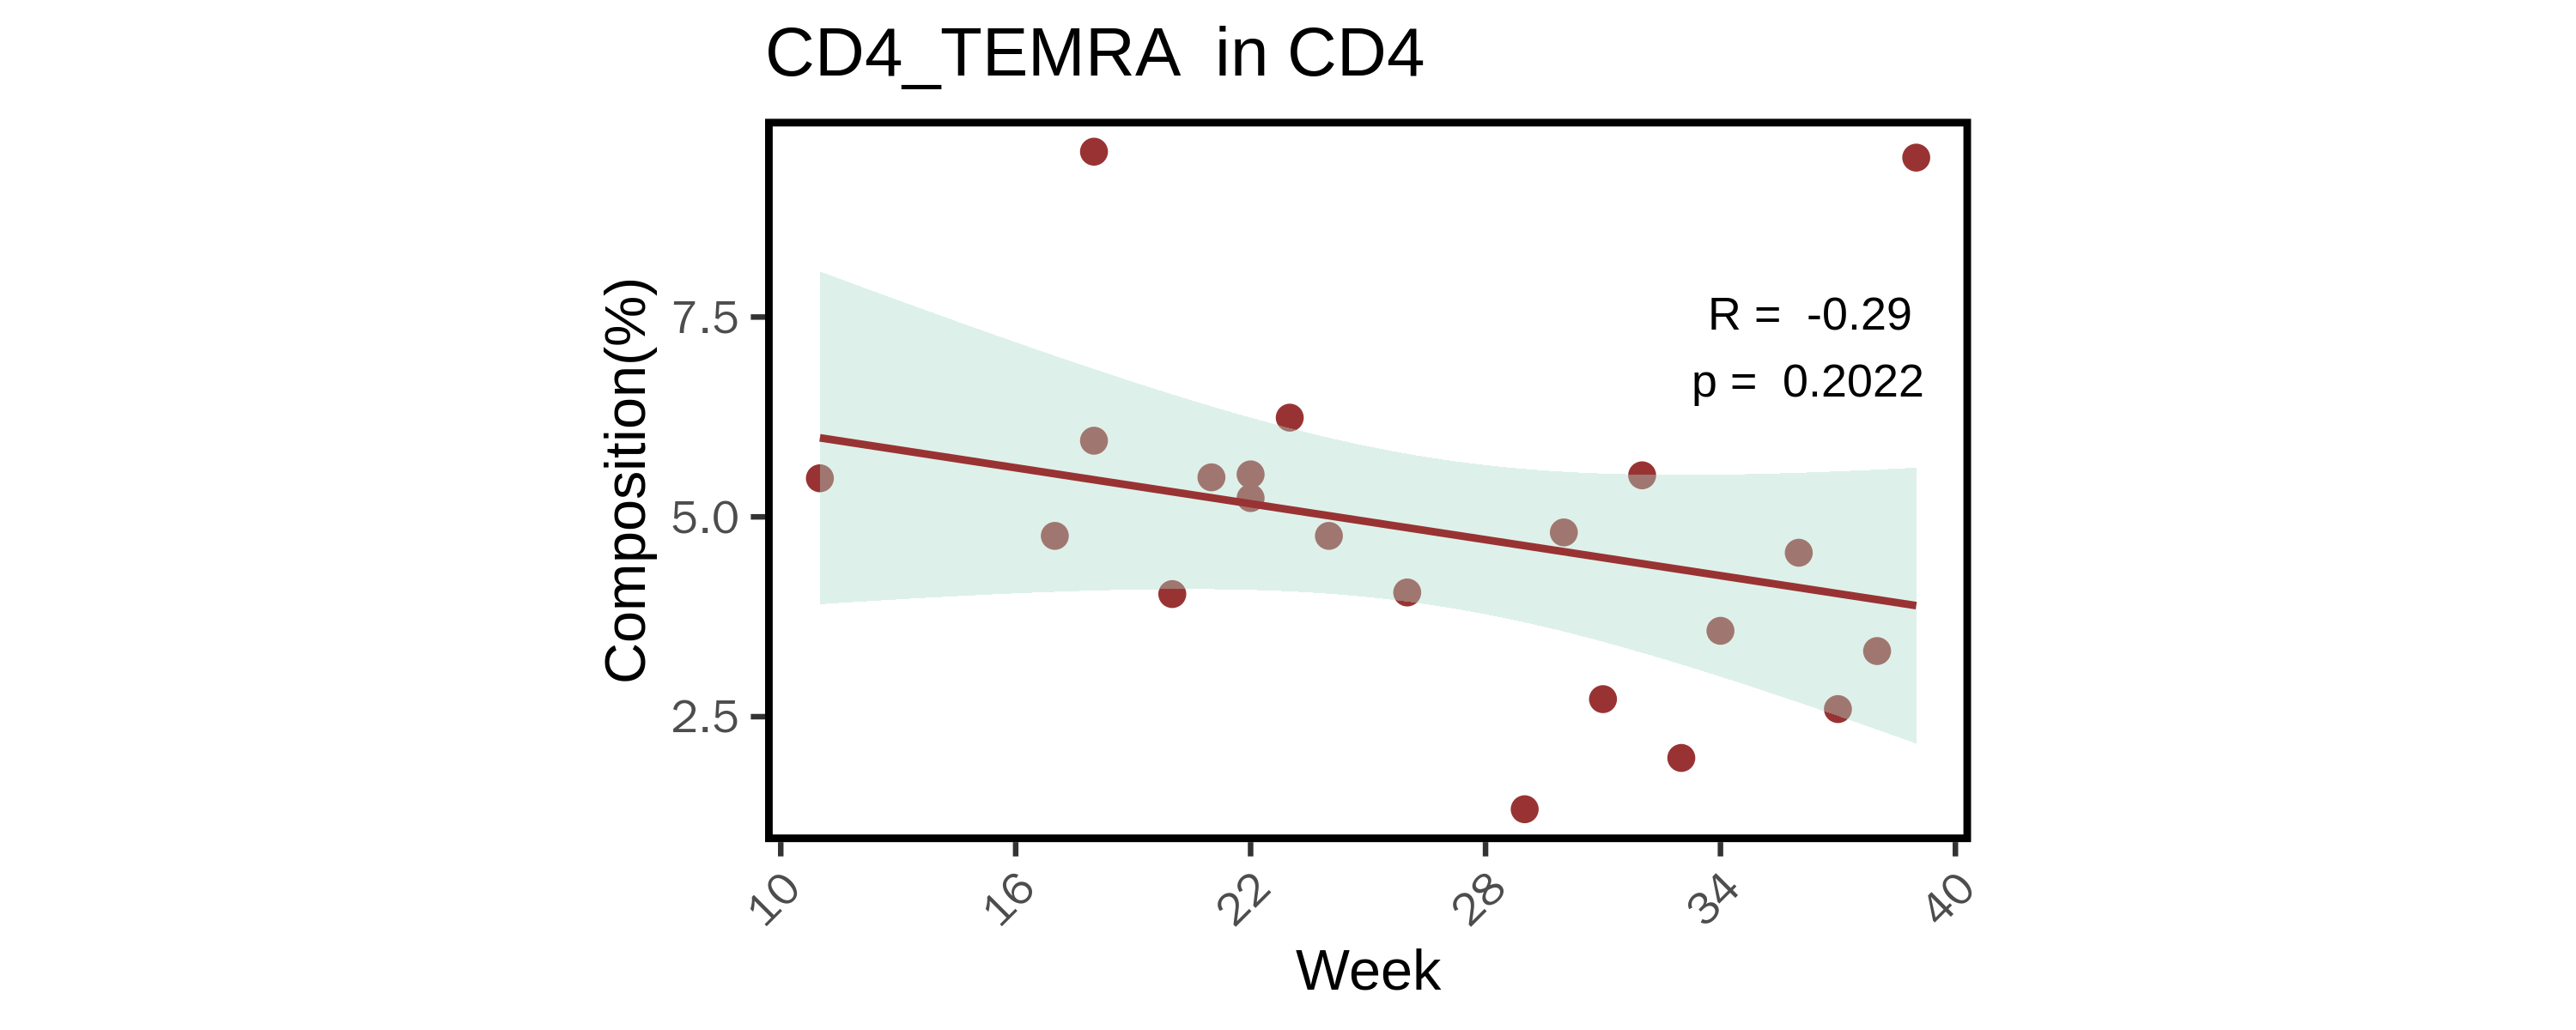

In [112]:
%%R -w 3000 -h 1200 -r 300 -i NaCD4T2_lymcell_TEMRAobs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in CD4"))
  return(plot)
}

gene1 <- "CD4_TEMRA"
gene2 <- "CD4_TEMRA_TEFF"

# Call the function with the input data
Plot_CD4_TEMRA <- plot_gene_percentage_in_R(NaCD4T2_lymcell_TEMRAobs, gene1, gene2,name1="CD4_TEMRA")
print(Plot_CD4_TEMRA )
## 

In [113]:
# %%R -w 3000 -h 1200 -r 300 -i NaCD4T2_lymcell_TEMRAobs
# library(dplyr)
# result_CD4TEMRAcell <- calculate_percentage(NaCD4T2_lymcell_TEMRAobs  , 'CD4_TEMRA', 'CD4_TEMRA_TEFF')
# plot_CD4_TEMRA <- plot_percentage(result_CD4TEMRAcell ,' CD4_TEMRA in CD4')
# print(plot_CD4_TEMRA )

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


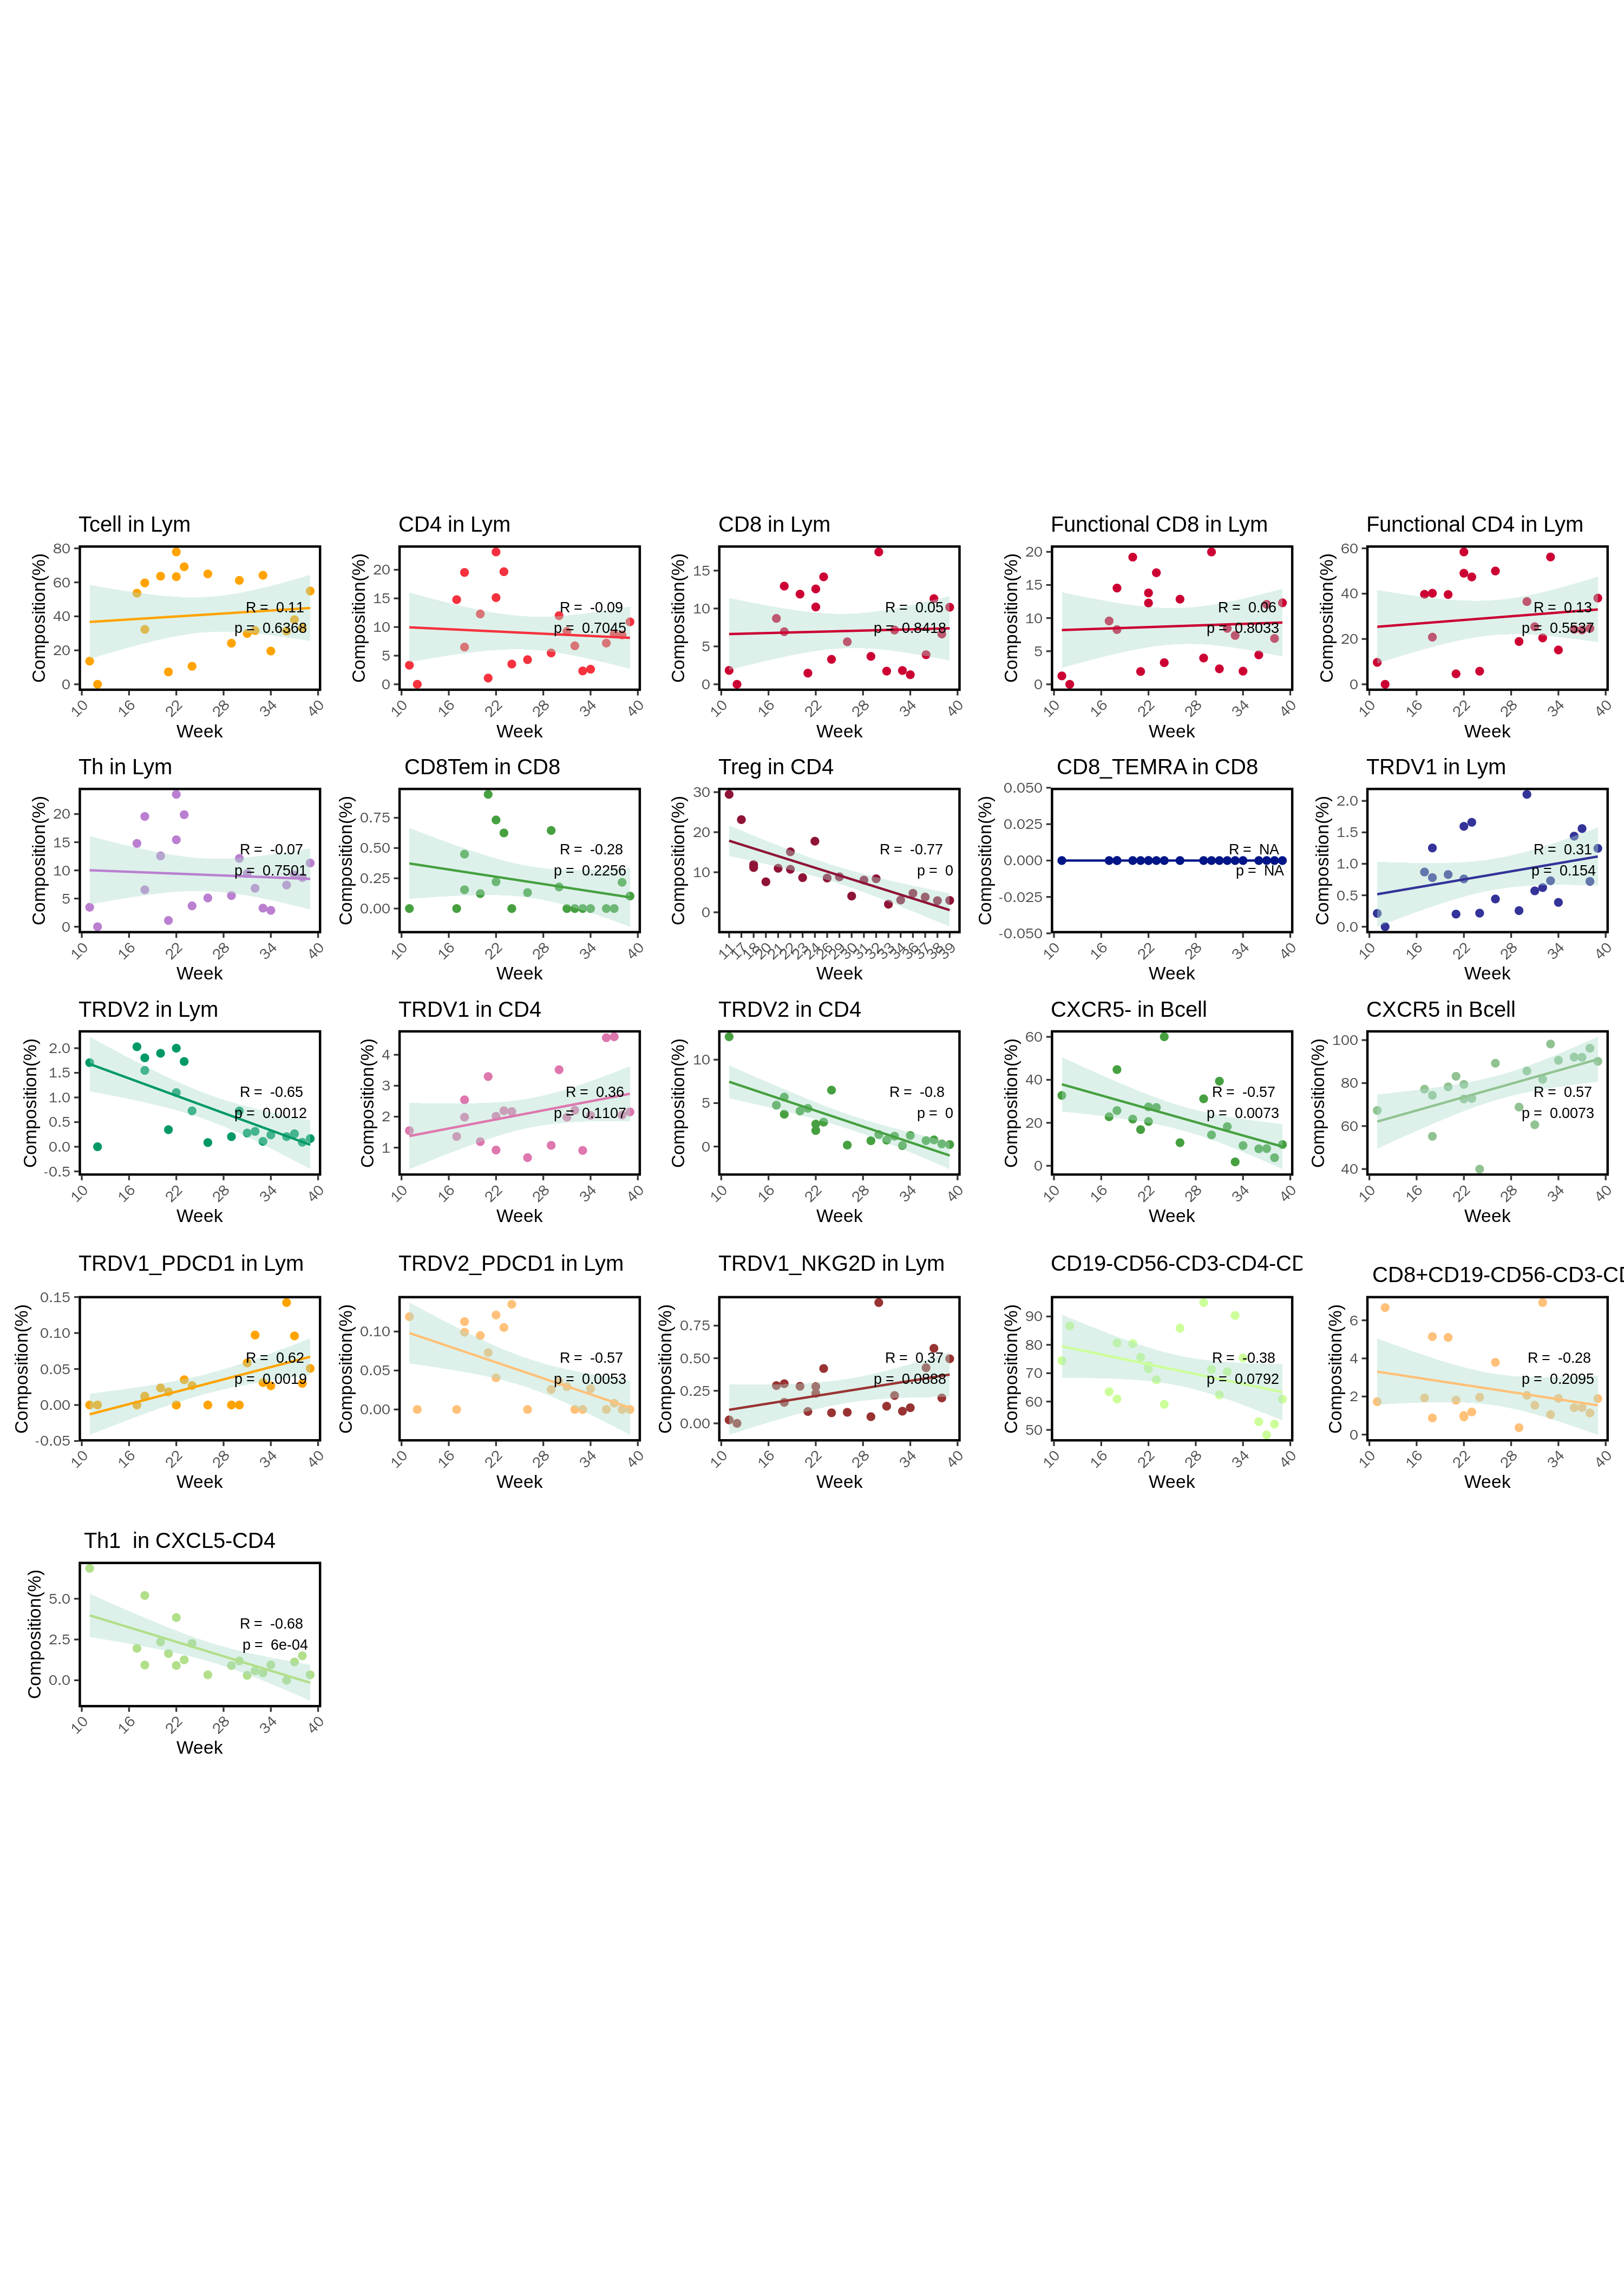

In [114]:
%%R -w 3000 -h 4200 -r 150
library(patchwork)
plot_list<-list(plot_Tcell,plotCD4T ,plotCD8Tlym,plot_TCD8,plot_FunctionalCD4T ,plotTh,
                plot_Memcell,plot_Treg,plot_CD8_TEMRA,TRDV1_Lym_plot,
                TRDV2_Lym_plot,TRDV1_CD4_plot,TRDV2_CD4_plot,CXCR5up_B_plot ,CXCR5_B_plotneg ,
               plotTRDV1_PDCD1_lym,plotTRDV2_PDCD1,plotTRDV1_KLRK1,AllnegCD19_CD4CD8neg3_plot,CD56CD8Apos_plot,plot_NaCD4T2_CXCL5neg_Th1 )
Combined_plot <- wrap_plots(plotlist = plot_list, ncol = 5)

ggsave(filename ="/home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Smallpercentage/SmallpercentageCombined4.pdf",
         plot = Combined_plot , width = 14, height = 20)
Combined_plot 

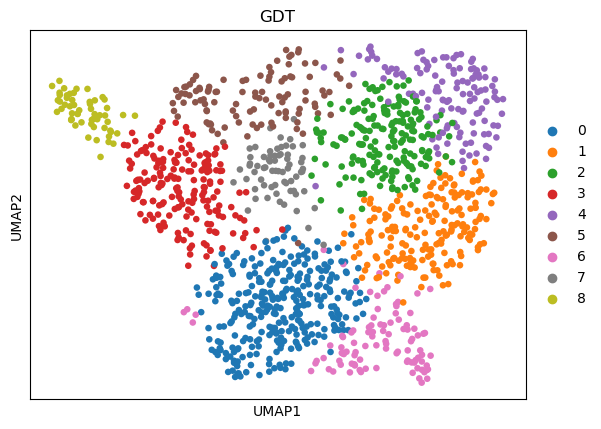

In [115]:
GDT2=Multi_create_sub2(TcellPBMC,['Gamma Delta V2 T','Gamma Delta V1 T'],name="GDT",res=1,col='Last_cell_type')

In [116]:
GDT2.obs['Last_cell_type'].value_counts()

Gamma Delta V2 T    1024
Gamma Delta V1 T     307
Name: Last_cell_type, dtype: int64

In [117]:
import pandas as pd
GDT2.obs['GD2Data'] = GDT2.obs['Last_cell_type'].apply(lambda x: 'GD2' if 'Gamma Delta V2 T' in x else 'Others')

GDT2.obs['GD1Data']= GDT2.obs['Last_cell_type'].apply(lambda x: 'GD1' if  'Gamma Delta V1 T' in x else 'Others')

In [118]:
GDT2obs=GDT2.obs

In [119]:
GDT2.obs['GD2Data'].value_counts()

GD2       1024
Others     307
Name: GD2Data, dtype: int64

`geom_smooth()` using formula = 'y ~ x'


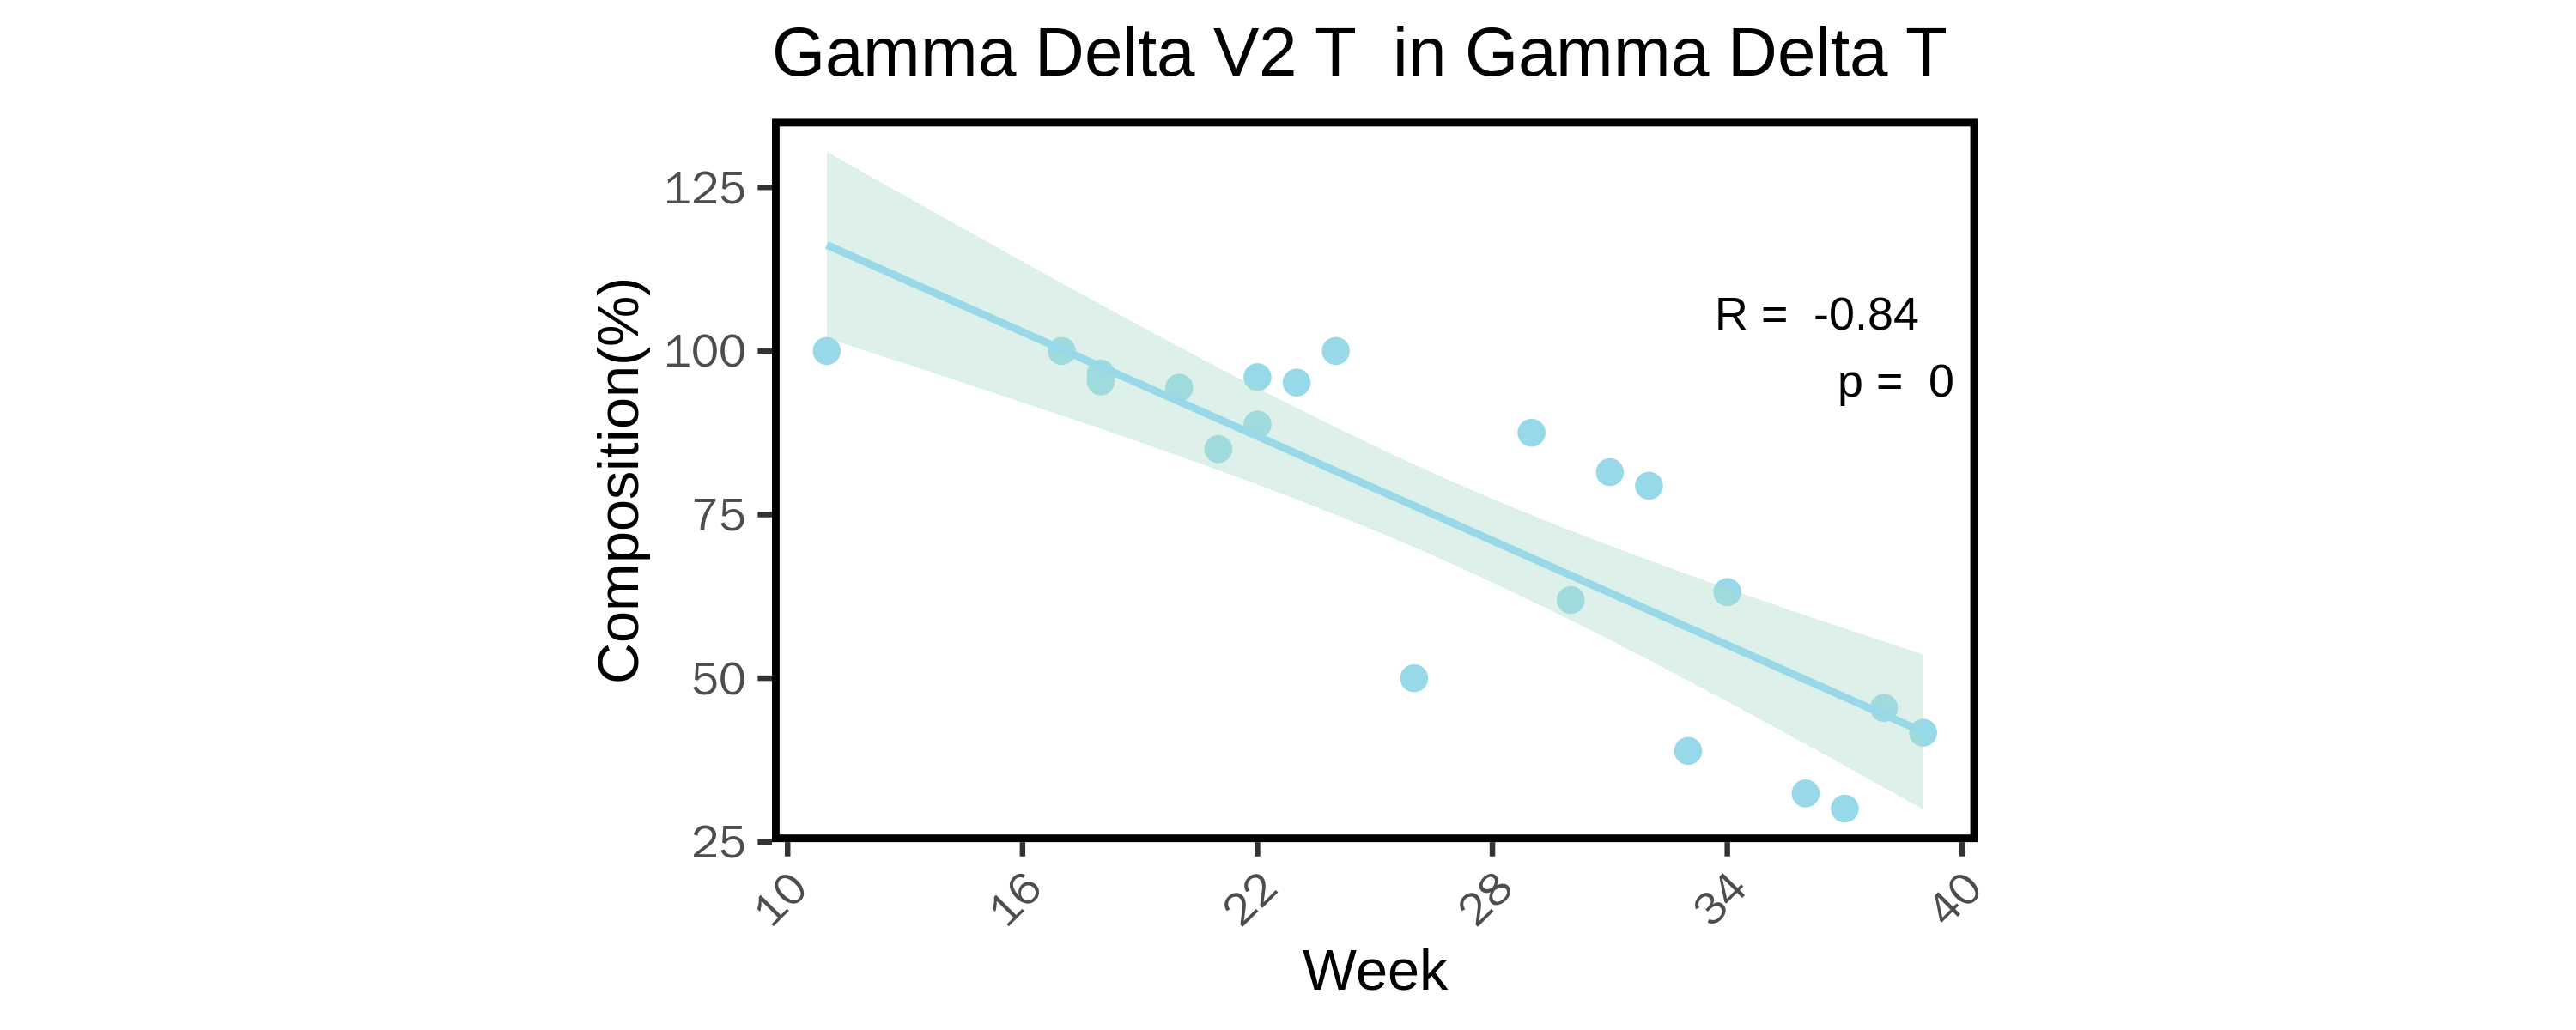

In [120]:
%%R -w 3000 -h 1200 -r 300 -i GDT2obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in Gamma Delta T"))
  return(plot)
}

gene1 <- "GD2"
gene2 <- "GD2Data"

# Call the function with the input data
Plot_GDT2obs_GD <- plot_gene_percentage_in_R(GDT2obs, gene1, gene2,name1="Gamma Delta V2 T")
print(Plot_GDT2obs_GD )
## 

`geom_smooth()` using formula = 'y ~ x'


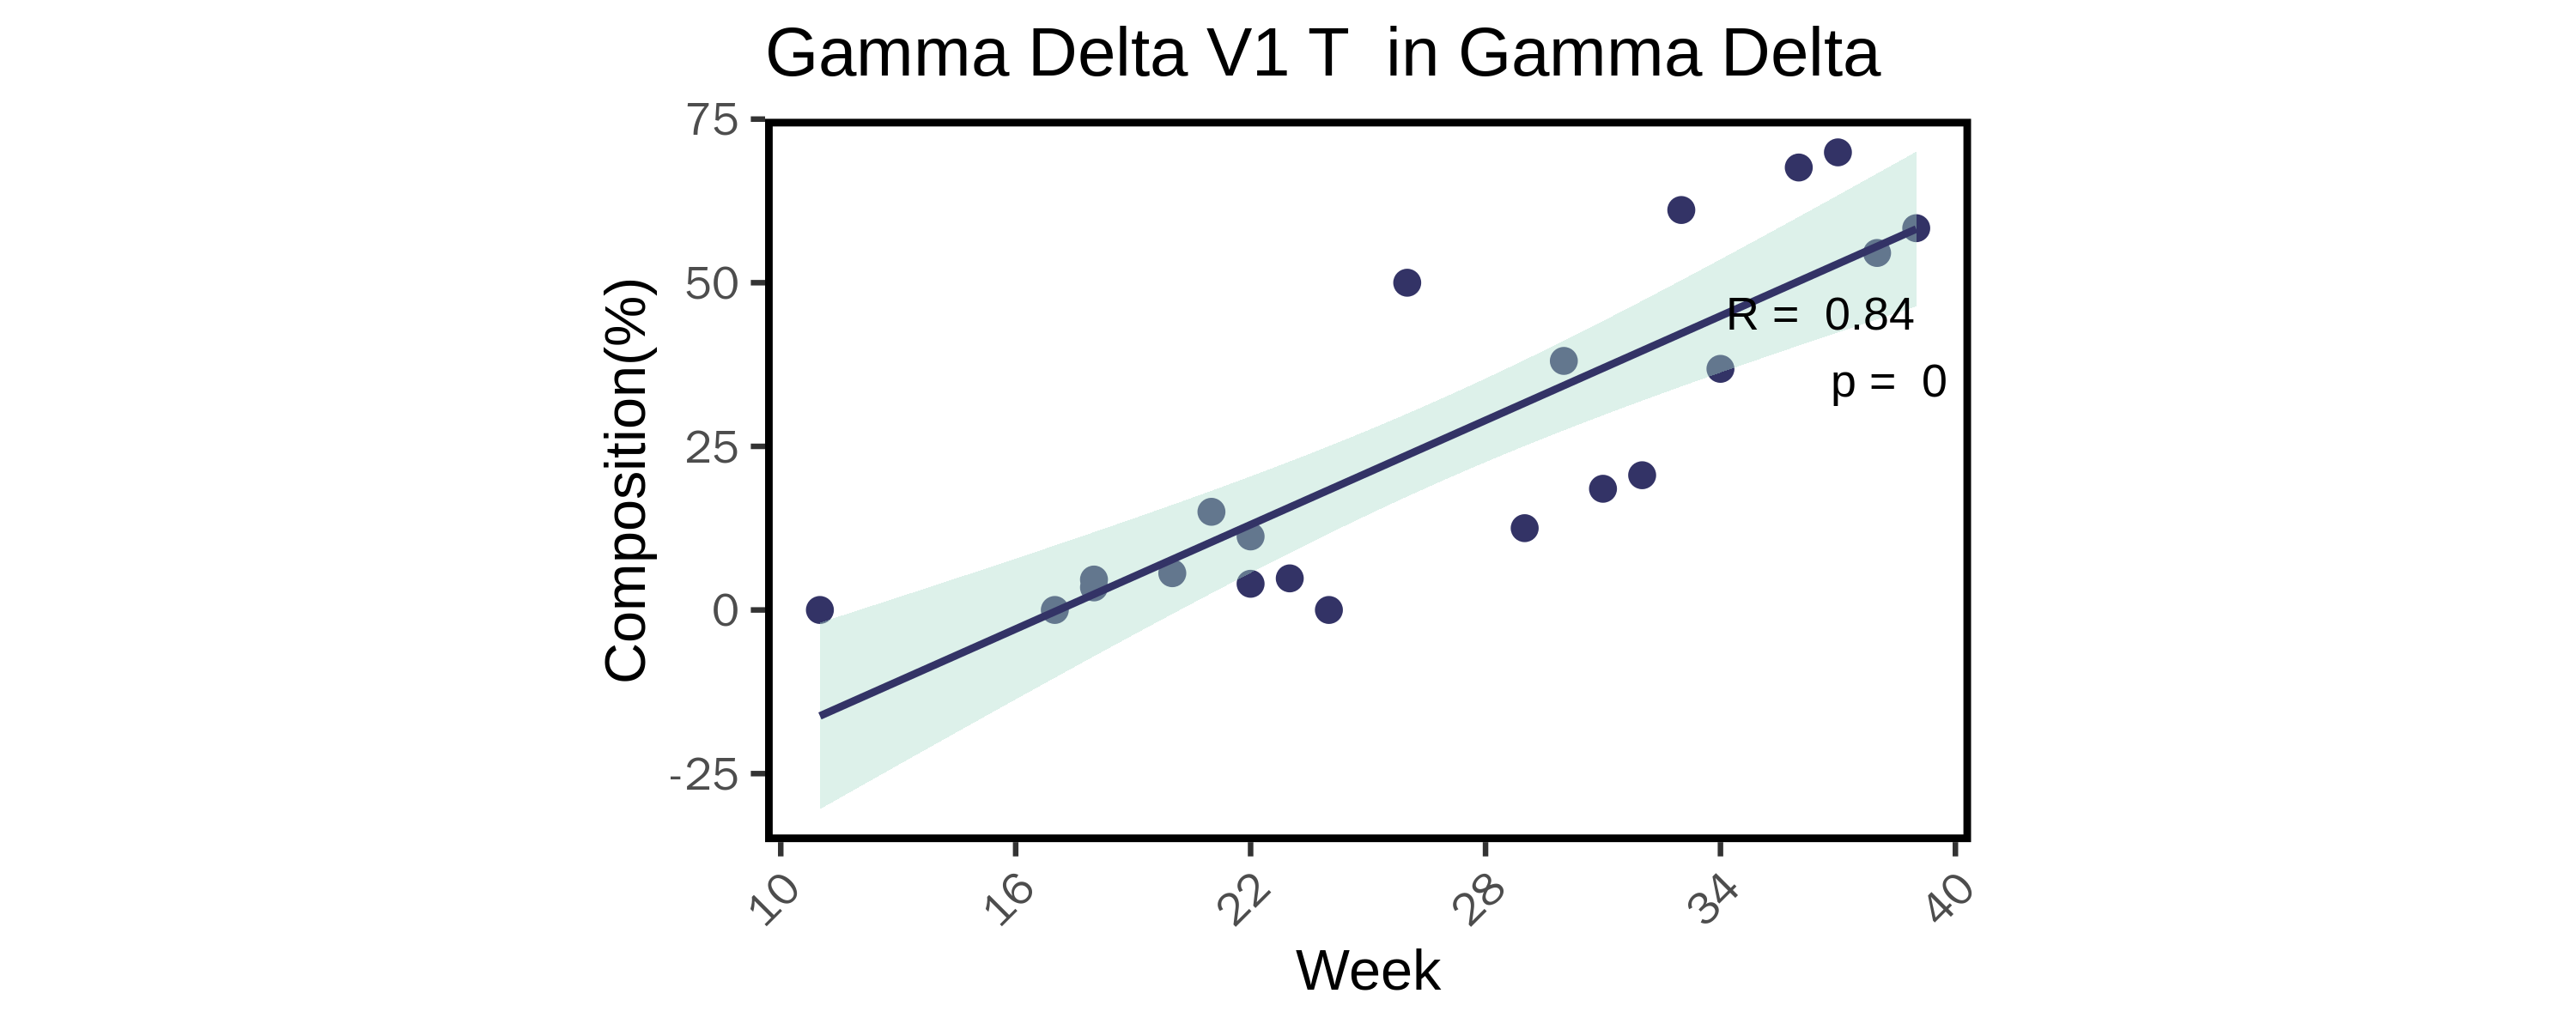

In [121]:
%%R -w 3000 -h 1200 -r 300 -i GDT2obs
library(dplyr)

plot_gene_percentage_in_R <- function(sce, gene1, gene2,name1) {
  result <- calculate_percentage(sce, gene1, gene2)
  plot <- plot_percentage(result, paste(name1, " in Gamma Delta"))
  return(plot)
}

gene1 <- "GD1"
gene2 <- "GD1Data"

# Call the function with the input data
Plot_GDT1obs_GD <- plot_gene_percentage_in_R(GDT2obs, gene1, gene2,name1="Gamma Delta V1 T")
print(Plot_GDT1obs_GD )
## 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


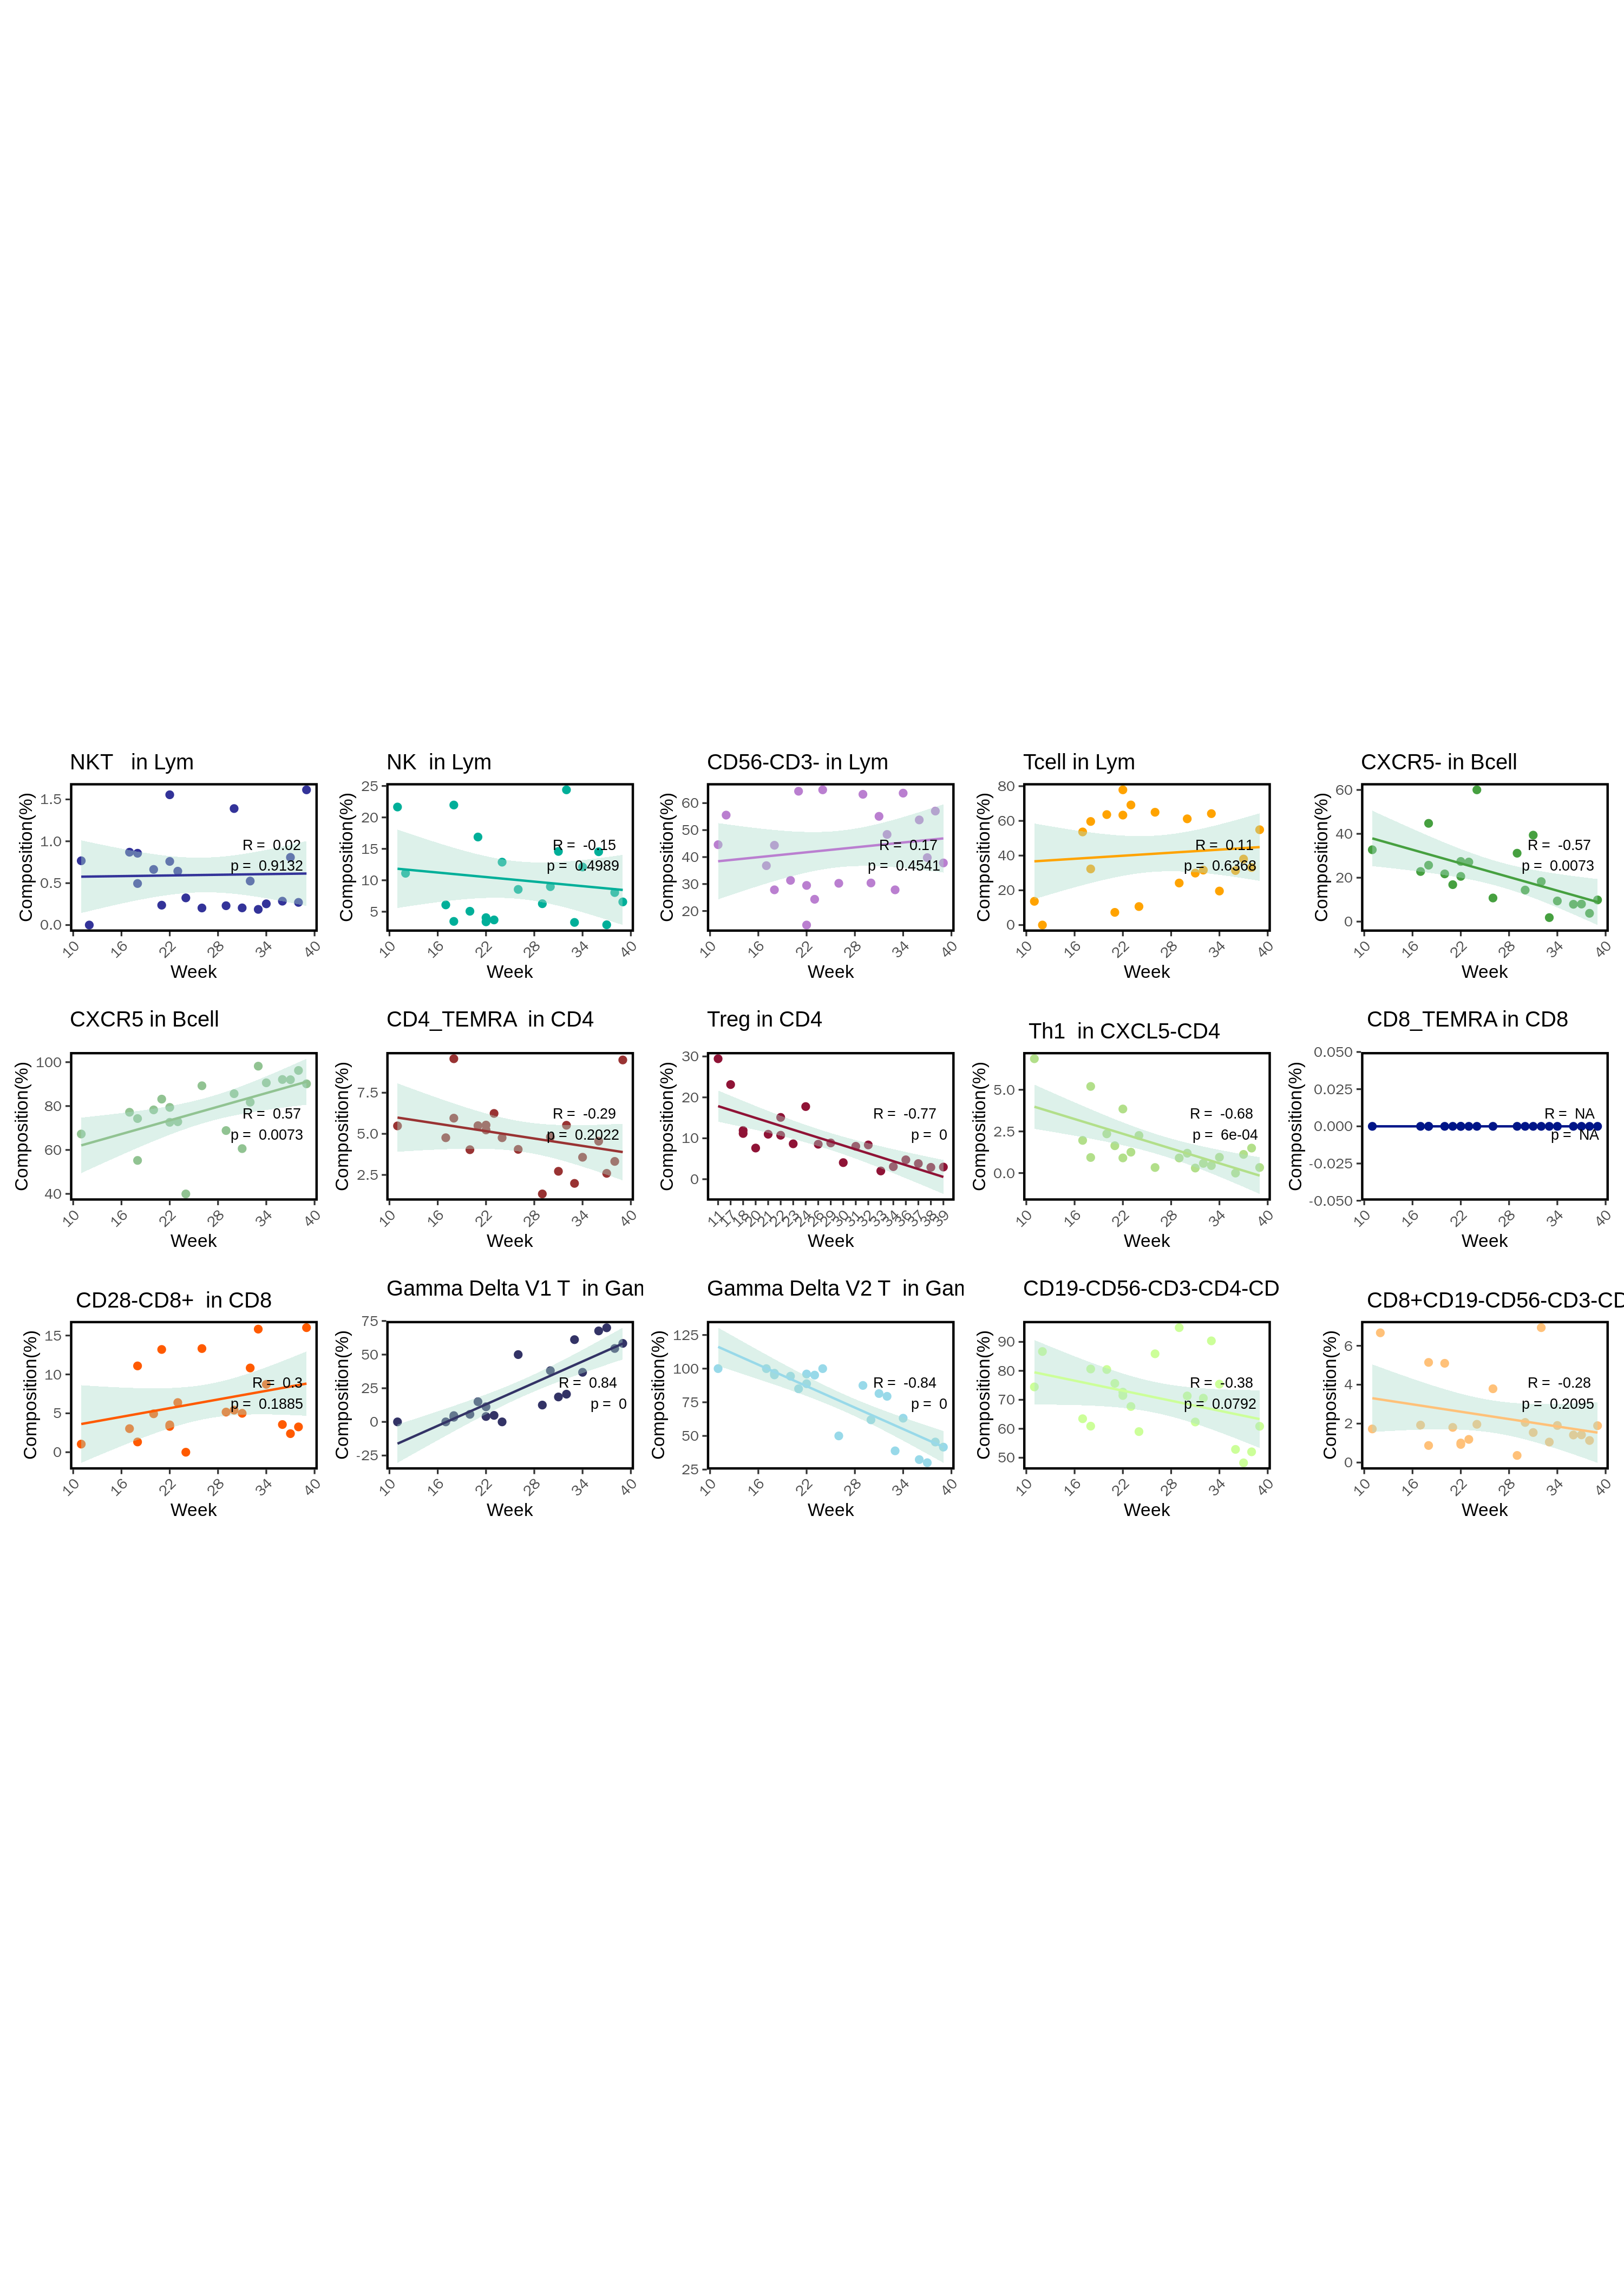

In [122]:
%%R -w 3000 -h 4200 -r 150
library(patchwork)
plot_list<-list(Plot_NKTobs_Lym_plot,Plot_NKobs_Lym,CD56CD3neg_plot,plot_Tcell,CXCR5up_B_plot ,
                CXCR5_B_plotneg ,Plot_CD4_TEMRA ,plot_Treg,plot_NaCD4T2_CXCL5neg_Th1,plot_CD8_TEMRA,
                CD8adata_CD28negobs_plot,Plot_GDT1obs_GD ,Plot_GDT2obs_GD ,AllnegCD19_CD4CD8neg3_plot,CD56CD8Apos_plot )
Combined_plot <- wrap_plots(plotlist = plot_list, ncol = 5)

ggsave(filename ="/home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Smallpercentage/SmallpercentageCombined5.pdf",
         plot = Combined_plot , width = 14, height = 20)
Combined_plot 

In [123]:
mkdir -p /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure6/S38

In [124]:
cp /home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Smallpercentage/SmallpercentageCombined5.pdf /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure6/S38

In [129]:
%%R
saveRDS(Combined_plot ,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure6/S38/S38Combined_plot.RDS")
saveRDS(plot_list ,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure6/S38/S38plot_list.RDS")

In [126]:
%%R
# 你的ggplot对象列表
plot_list <- list(Plot_NKTobs_Lym_plot, Plot_NKobs_Lym, CD56CD3neg_plot, plot_Tcell, CXCR5up_B_plot,
                  CXCR5_B_plotneg, Plot_CD4_TEMRA, plot_Treg, plot_NaCD4T2_CXCL5neg_Th1, plot_CD8_TEMRA,
                  CD8adata_CD28negobs_plot, Plot_GDT1obs_GD, Plot_GDT2obs_GD, AllnegCD19_CD4CD8neg3_plot, CD56CD8Apos_plot)


data_list <- list()


for (i in seq_along(plot_list)) {

    plot_name <- deparse(substitute(plot_list[[i]]))
    
    # 使用ggplot_build来提取数据
    plot_data <- plot_list[[i]]$data
    

#         plot_data <- plot_data[[1]]

    # 将提取的数据框添加到列表中，以ggplot对象的名称命名
    data_list[[plot_name]] <- plot_data
}

# 检查列表中的元素名称
names(data_list)

[1] "plot_list[[i]]"
